<font size="20">

# Time- and energy resolved effects in thermal neutrons detectors

<font size="3">

> __Author:__ A. Backis
<br/>__Institute:__ European Spallation Source (ESS), University of Glasgow
<br/>__Date:__ 7/1-2020

_Abstract:_
This notebook contains the data-analysis tools used for the corresponding paper. It describes how the analysis was performed on data obtained with the Multi-Grid detector at the HZB.

## Contents
* [1. Introduction](#INTRODUCTION)
    * [1.1 Overview](#OVERVIEW)
    * [1.2 Packages](#PACKAGES)
* [2. Data](#DATA)
    * [2.1 Extract](#EXTRACT)
    * [2.2 Load](#LOAD)
    * [2.3 Filter](#FILTER)
* [3. Visualization](#VISUALIZATION)
    * [3.1 PHS](#PHS)
        * [3.1.1 1D](#PHS_1D)
        * [3.1.2 2D](#PHS_2D)
        * [2.1.3 Wires vs grids](#PHS_WIRES_VS_GRIDS)
    * [3.2 Time-of-flight](#TIME_OF_FLIGHT)
    * [3.3 Coincidences](#COINCIDENCES)
        * [3.3.1 Wires vs grids](#COINCIDENCES_WIRES_VS_GRIDS)
        * [3.3.2 Projections](#PROJECTIONS)
        * [3.3.3 3D-Rotation](#3D_ROTATION)
    * [3.4 Multiplicity](#MULTIPLICITY)
    * [3.5 Rate](#RATE)
    * [3.6 Layers](#LAYERS)
    * [3.7 Energy](#ENERGY)
    * [3.8 Wavelength](#WAVELENGTH)
* [4. Analysis](#ANALYSIS)
    * [4.1 Electronic noise](#ELECTRONIC_NOISE)
    * [4.2 Efficiency](#EFFICIENCY)
    * [4.3 Line shape](#LINE_SHAPE)
    * [4.4 Time- and energy resolution](#TIME_AND_ENERGY_RESOLUTION)
* [Acknowledgements](#ACKNOWLEDGEMENTS)
* [References](#REFERENCES)

### 1. Introduction<a class="anchor" id="INTRODUCTION"></a>

#### 1.1 Overview<a class="anchor" id="OVERVIEW"></a>

#### 1.2 Packages<a class="anchor" id="PACKAGES"></a>

In [1]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# General packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Data handling
import mg.file_handling.read as mg_read
import he3.read as he3_read

# Plotting
import mg.plotting.basic_plot as mg_basic_plot
import mg.plotting.advanced_plot as mg_advanced_plot
import he3.plotting as he3_plot

# Energy calculation
import mg.helper_functions.energy_calculation as mg_energy
import he3.energy_calculation as he3_energy

# Helper functions
import mg.helper_functions.misc as mg_hf

# Make matplotlib interactive mode in notebook
%matplotlib inline
%matplotlib notebook

Declare global variables:

In [2]:
# Declare beam monitors norms
MONITOR_NORM_R = 1/11411036
MONITOR_NORM_NR = 1/9020907
MONITOR_NORM_HE3 = 1/10723199

# Declare distance offsets
DIST_OFFSET_R = 1.5e-3
DIST_OFFSET_NR = 0
DIST_OFFSET_HE3 = 3e-3

# Declare peak locations for He-3 tubes
PEAKS = np.array([0.886, 1.030, 1.177, 1.321, 1.466, 1.610, 1.755, 1.900, 2.044, 2.188, 
                  2.333, 2.477, 2.622, 2.766, 2.911, 3.056, 3.200, 3.344, 3.489, 3.633,
                  3.778, 3.923, 4.068, 4.211, 4.356, 4.500, 4.645, 4.790, 4.934, 5.079,
                  5.223, 5.368, 5.513, 5.657, 5.801, 5.946, 6.090, 6.235, 6.379, 6.524,
                  6.669, 6.813, 6.958, 7.102, 7.246, 7.391, 7.536, 7.680, 7.825, 7.969])

### 2. Data<a class="anchor" id="DATA"></a>

In [3]:
# Declare paths to raw data
mg_radial_path = '../data/v20/raw/mvmelst_165_191002_111641_Det2_overnight3.zip'
mg_no_radial_path = '../data/v20/raw/mvmelst_135_190930_141618_Det1_overnight2_30x80_14x60.zip'
he3_path = '../data/v20/raw/2019_09_HZB_He3InBeam54304s_overnight.lst'
mg_no_radial_blocked_by_he3_path = '../data/v20/raw/mvmelst_141_191001_120405_He3InBeam_overnight3.zip'
# Declare paths to clusters
mg_radial_clusters_path = '../data/v20/processed/clusters_mvmelst_165_191002_111641_Det2_overnight3.h5'
mg_no_radial_clusters_path = '../data/v20/processed/clusters_mvmelst_135_190930_141618_Det1_overnight2_30x80_14x60.h5'
mg_no_radial_blocked_by_he3_clusters_path = '../data/v20/processed/clusters_mvmelst_141_191001_120405_He3InBeam_overnight3.zip'
# Declare paths to events
mg_radial_events_path = '../data/v20/processed/events_mvmelst_165_191002_111641_Det2_overnight3.h5'
mg_no_radial_events_path = '../data/v20/processed/events_mvmelst_135_190930_141618_Det1_overnight2_30x80_14x60.h5'
mg_no_radial_blocked_by_he3_events_path = '../data/v20/processed/events_mvmelst_141_191001_120405_He3InBeam_overnight3.zip'
he3_events_path = '../data/v20/processed/events_2019_09_HZB_He3InBeam54304s_overnight.h5'

#### 2.1 Extract<a class="anchor" id="EXTRACT"></a>

In [ ]:
def extract_mg_data(zipped_path, clusters_save_path, events_save_path):
    unzipped_path = mg_read.unzip_data(zipped_path)
    data = mg_read.import_data(unzipped_path)
    # Extract clusters and save to disc
    #clusters = mg_read.extract_clusters(data)
    #mg_read.save_data(clusters, clusters_save_path)
    #clusters = None
    # Extract events and save to disc
    events = mg_read.extract_events(data)
    mg_read.save_data(events, events_save_path)
    events = None
    # Clear data
    data = None

In [ ]:
def extract_he3_data(raw_path, save_path):
    df = he3_read.extract_events(raw_path)
    he3_read.save_data(df, save_path)
    df = None

In [ ]:
#extract_mg_data(mg_no_radial_blocked_by_he3_path,
#                mg_no_radial_blocked_by_he3_clusters_path,
#                mg_no_radial_blocked_by_he3_events_path)
#extract_mg_data(mg_radial_path, mg_radial_clusters_path, mg_radial_events_path)
extract_mg_data(mg_no_radial_path, mg_no_radial_clusters_path, mg_no_radial_events_path)
#extract_he3_data(he3_path, he3_events_path)

#### 2.2 Load<a class="anchor" id="LOAD"></a>

In [4]:
# Load multi-grid clusters
mg_radial_ce_df = mg_read.load_data(mg_radial_clusters_path)
mg_no_radial_ce_df = mg_read.load_data(mg_no_radial_clusters_path)
mg_no_radial_beam_blocked_ce_df = mg_read.load_data(mg_no_radial_blocked_by_he3_clusters_path)
# Load multi-grid events
#mg_radial_e_df = mg_read.load_data(mg_radial_events_path)
#mg_no_radial_e_df = mg_read.load_data(mg_no_radial_events_path)
#mg_no_radial_beam_blocked_e_df = mg_read.load_data(mg_no_radial_blocked_by_he3_events_path)
# Load He-3 events
he3_df = he3_read.load_data(he3_events_path)

In [12]:
duration = (mg_no_radial_beam_blocked_ce_df.time.values[-1] - mg_no_radial_beam_blocked_ce_df.time.values[0]) * 62.5e-9
duration/(60*60)

15.086131856145833

#### 2.3 Filter<a class="anchor" id="FILTER"></a>

In [5]:
"""
Filters are declared in the following format:
{'PARAMETER': [MIN_VALUE, MAX_VALUE, IS_ACTIVATE]}
"""

us_to_tdc = 1 / (62.5e-9 * 1e6)

# Declare filter for multi-grid clusters
mg_filter_clusters = {'wm': [1, 1, True],                   # Wire multiplicity
                      'gm': [1, 5, True],                   # Grid multiplicity
                      'wadc': [600, np.inf, True],             # Wire charge
                      'gadc': [600, np.inf, True],             # Grid charge
                      'tof': [0, np.inf, True],           # Time-of-flight (TDC channels)
                      'time': [0, np.inf, True],            # Time (TDC channels)
                      'bus': [0, 2, True],                  # Bus
                      'flag': [0, 1, False],                # =1 if different buses within same coincidence
                      'layer': [0, 19, False],              # Layer, front=0 to back=19
                      'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                      'gch': [80, 119, True]}              # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid events
mg_filter_events = {'bus': [0, 2, False],                   # Bus
                    'ch': [0, 119, False],                  # Channel
                    'adc': [0, np.inf, False]}              # Collected charge (ADC channels)

# Declare filters for He-3 data
he3_filter = {'adc': [7500, np.inf, True],                  # Collected charge (ADC channels)
              'tof': [0, 71429e-6, True]}                   # Time-of-flight (s)

# Perform filters
mg_r = mg_read.filter_data(mg_radial_ce_df, mg_filter_clusters)
mg_nr = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters)
mg_nr_blocked = mg_read.filter_data(mg_no_radial_beam_blocked_ce_df, mg_filter_clusters)
he3 = he3_read.filter_data(he3_df, he3_filter)

In [ ]:
print(mg_no_radial_ce_df)
print(mg_no_radial_e_df)

### 3. Visualization<a class="anchor" id="VISUALIZATION"></a>

#### 3.1 PHS<a class="anchor" id="PHS"></a>

##### 3.1.1 PHS - 1D<a class="anchor" id="PHS_1D"></a>

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 500
interval = [0, 1e4]
# Plot
fig = plt.figure()
mg_basic_plot.phs_1d_plot(mg_r, number_bins, interval, 'Radial coating')
fig.show()
fig = plt.figure()
mg_basic_plot.phs_1d_plot(mg_nr, number_bins, interval, 'No radial coating')
fig.show()
fig = he3_plot.phs_1d_plot(he3, number_bins, 'He-3')
fig.show()

##### 3.1.2 PHS - 2D<a class="anchor" id="PHS_2D"></a>

In [ ]:
# Define parameters
bus_start = 0
bus_stop = 2
# Plot
fig = mg_basic_plot.phs_2d_plot(mg_radial_e_df, bus_start, bus_stop, 'Radial coating')
fig.show()
fig = mg_basic_plot.phs_2d_plot(mg_no_radial_e_df, bus_start, bus_stop, 'No radial coating')
fig.show()

##### 3.1.3 PHS - Wires vs grids<a class="anchor" id="PHS_WIRES_VS_GRIDS"></a>

In [ ]:
# Define parameters
bus_start = 0
bus_stop = 2
# Plot
fig = mg_basic_plot.phs_wires_vs_grids_plot(mg_r, bus_start, bus_stop, 'Radial coating')
fig.show()
fig = mg_basic_plot.phs_wires_vs_grids_plot(mg_nr, bus_start, bus_stop, 'No radial coating')
fig.show()

#### 3.2 Time-of-flight<a class="anchor" id="TIME_OF_FLIGHT"></a>

In [ ]:
%matplotlib notebook
# Declare parameters
number_bins = 60000
interval = [0, 71429]
# Plot
fig = plt.figure()
mg_basic_plot.tof_histogram(mg_r, number_bins, 'Radial coating', color='green')
fig.show()
fig = plt.figure()
mg_basic_plot.tof_histogram(mg_nr, number_bins, 'No radial coating',
                            label='No radial coating', color='blue')
mg_basic_plot.tof_histogram(mg_nr_blocked, number_bins, 'No radial coating - blocked',
                            label='No radial coating - blocked', color='orange')
plt.legend()
fig.show()
fig = plt.figure()
he3_plot.tof_histogram(he3, number_bins, 'He-3', color='red')
fig.show()
fig = plt.figure()
#mg_basic_plot.tof_histogram(mg_r, number_bins, '', label='Radial', interval=interval, color='green')
mg_basic_plot.tof_histogram(mg_nr, number_bins, 'Overlay', label='No radial', interval=interval, color='blue')
he3_plot.tof_histogram(he3, number_bins, label='He-3', interval=interval, color='red')
plt.legend()
fig.show()

#### 3.3 Coincidences<a class="anchor" id="COINCIDENCES"></a>

##### 3.3.1 Wires vs grids<a class="anchor" id="COINCIDENCES_WIRES_VS_GRIDS"></a>

In [ ]:
# Declare parameters
duration_r = mg_r.time.values[-1] - mg_r.time.values[0]
duration_nr = mg_nr.time.values[-1] - mg_nr.time.values[0]
bus_start = 0
bus_stop = 2
# Plot
fig, __ = mg_basic_plot.ce_2d_plot(mg_r, duration_r, bus_start, bus_stop, 'Radial coating')
fig.show()
fig, __ = mg_basic_plot.ce_2d_plot(mg_nr, duration_nr, bus_start, bus_stop, 'No radial coating')
fig.show()

##### 3.3.2 Projections<a class="anchor" id="PROJECTIONS"></a>

In [ ]:
# Declare parameters
bus_start = 0
bus_stop = 2
# Plot
fig, __ = mg_basic_plot.ce_projections_plot(mg_r, bus_start, bus_stop, 'Radial coating')
fig.show()
fig, __ = mg_basic_plot.ce_projections_plot(mg_nr, bus_start, bus_stop, 'No radial coating')
fig.show()

##### 3.3.3 3D-rotation<a class="anchor" id="3D_ROTATION"></a>

In [ ]:
#mg_basic_plot.ce_3d_plot(mg_r, 'Radial coating')
mg_basic_plot.ce_3d_plot(mg_nr, 'No radial coating')

#### 3.4 Multiplicity<a class="anchor" id="MULTIPLICITY"></a>

In [ ]:
# Declare parameters
bus_start = 0
bus_stop = 2
# Plot
fig = mg_basic_plot.multiplicity_plot(mg_r, bus_start, bus_stop, 'Radial coating')
fig.show()
fig = mg_basic_plot.multiplicity_plot(mg_nr, bus_start, bus_stop, 'No radial coating')
fig.show()

#### 3.5 Rate<a class="anchor" id="RATE"></a>

In [ ]:
# Declare parameters
number_bins = 50
# Plot
fig = plt.figure()
mg_basic_plot.rate_plot(mg_r, number_bins, 'Radial coating')
mg_basic_plot.rate_plot(mg_nr, number_bins, 'No radial coating')
plt.legend()
fig.show()

##### 3.6 Layers<a class="anchor" id="LAYERS"></a>

###### 3.6.1 Time-of-flight, voxel by voxel

In [ ]:
#fig = mg_advanced_plot.layers_tof(mg_r, 'Multi-Grid:R')
#fig.show()
set_thick_labels(10)
fig = mg_advanced_plot.layers_tof(mg_nr, 'Multi-Grid:NR')
fig.show()

###### 3.6.2 Counts, layer by layer

In [ ]:
# Declare parameters
duration_r = mg_r.time.values[-1] - mg_r.time.values[0]
duration_nr = mg_nr.time.values[-1] - mg_nr.time.values[0]
# Plot
fig = mg_advanced_plot.layers_counts(mg_r, duration_r, 'Coated radial')
fig.show()
fig = mg_advanced_plot.layers_counts(mg_nr, duration_nr, 'Not coated radial')
fig.show()

##### 3.7 Energy<a class="anchor" id="ENERGY"></a>

In [ ]:
%matplotlib notebook

# Calculate energy distribution
energies_r = mg_energy.get_energies(mg_r, DIST_OFFSET_R)
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Declare parameters
number_bins = 10000
start = 0.8 # Å
stop = 10 # Å

# Plot
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
#__, __ = mg_advanced_plot.energy_plot(energies_r, number_bins, 'Radial coating',
#                                      useMaxNorm=True, start=start, stop=stop)
__, __ = mg_advanced_plot.energy_plot(energies_nr, number_bins, 'No radial coating',
                                      useMaxNorm=True, start=start, stop=stop)
__, __ = he3_plot.energy_plot(energies_he3, number_bins, 'Helium-3 tube', 
                              useMaxNorm=True, start=start, stop=stop)
plt.legend()
fig.show()

In [ ]:
mg_hf.A_to_meV(1.5)

##### 3.8 Wavelength<a class="anchor" id="WAVELENGTH"></a>

In [ ]:
# Calculate energy distribution
energies_r = mg_energy.get_energies(mg_r, DIST_OFFSET_R)
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Declare parameters
number_bins = 50000
start = 0.5
stop = 10

# Plot
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
__, __ = mg_advanced_plot.wavelength_plot(energies_r, number_bins, 'Radial coating',
                                          useMaxNorm=True, start=start, stop=stop)
__, __ = mg_advanced_plot.wavelength_plot(energies_nr, number_bins, 'No radial coating',
                                          useMaxNorm=True, start=start, stop=stop)
__, __ = he3_plot.wavelength_plot(energies_he3, number_bins, 'Helium-3 tube',
                                  useMaxNorm=True, start=start, stop=stop)
plt.legend()
fig.show()
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
__, __ = mg_advanced_plot.wavelength_plot(energies_r, number_bins, 'Radial coating',
                                          useMaxNorm=True, start=start, stop=stop)
__, __ = mg_advanced_plot.wavelength_plot(energies_nr, number_bins, 'No radial coating', 
                                          useMaxNorm=True, start=start, stop=stop)
__, __ = he3_plot.wavelength_plot(energies_he3, number_bins, 'Helium-3 tube',
                                  useMaxNorm=True, start=start, stop=stop)
plt.legend()
plt.yscale('log')
fig.show()

# Plot for paper: Multi-Grid (non-coated) vs Helium-3
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
__, __ = mg_advanced_plot.wavelength_plot(energies_nr, number_bins, 'Multi-Grid detector',
                                          useMaxNorm=False, start=start, stop=stop, color='blue')
__, __ = he3_plot.wavelength_plot(energies_he3, number_bins, 'Helium-3 tube',
                                  useMaxNorm=False, start=start, stop=stop, color='red')
plt.legend()
fig.show()

In [ ]:
# Calculate energy distribution
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Declare parameters
number_bins = 50000
start = 0.5
stop = 10

# Plot for paper: Multi-Grid (non-coated) vs Helium-3
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
__, __ = he3_plot.wavelength_plot(energies_he3, number_bins, 'Helium-3 tube',
                                  useMaxNorm=False, start=start, stop=stop, color='red',
                                  scaling=MONITOR_NORM_HE3
                                 )
__, __ = mg_advanced_plot.wavelength_plot(energies_nr, number_bins, 'Multi-Grid detector',
                                          useMaxNorm=False, start=start, stop=stop, color='blue',
                                          scaling=MONITOR_NORM_NR
                                         )
plt.legend()
plt.xlim(0, 7)
fig.show()
output_path = '../output/mg_vs_he3_all_peaks.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
# =============================================================================
#                                 GET ALL PEAKS - WAVELENGTH
# =============================================================================

# Calculate energy distribution
energies_r = mg_energy.get_energies(mg_r, DIST_OFFSET_R)
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Define peak locations (here we use the He-3 peak locations)
peaks = np.array([0.886, 1.030, 1.177, 1.321, 1.466, 1.610, 1.755, 1.900, 2.044, 2.188, 
                  2.333, 2.477, 2.622, 2.766, 2.911, 3.056, 3.200, 3.344, 3.489, 3.633,
                  3.778, 3.923, 4.068, 4.211, 4.356, 4.500, 4.645, 4.790, 4.934, 5.079,
                  5.223, 5.368, 5.513, 5.657, 5.801, 5.946, 6.090, 6.235, 6.379, 6.524,
                  6.669, 6.813, 6.958, 7.102, 7.246, 7.391, 7.536, 7.680, 7.825, 7.969])
peak_window = 0.04

# Declare plotting specifications
number_bins = 250
lower_y = 0
upper_y = 40e3

# Iterate through all peaks
for peak in peaks:
    # Plot all data together
    fig = plt.figure()
    hist_r, bins_r = mg_advanced_plot.wavelength_plot(energies_r, number_bins, 'Multi-Grid:R',
                                                      start=peak-peak_window/2, stop=peak+peak_window/2,
                                                      color='green', scaling=MONITOR_NORM_R)
    hist_nr, bins_nr = mg_advanced_plot.wavelength_plot(energies_nr, number_bins, 'Multi-Grid:NR',
                                                        start=peak-peak_window/2, stop=peak+peak_window/2,
                                                        color='blue', scaling=MONITOR_NORM_NR)
    hist_he3, bins_he3 = he3_plot.wavelength_plot(energies_he3, number_bins, 'Helium-3',
                                                  start=peak-peak_window/2, stop=peak+peak_window/2,
                                                  color='red', scaling=MONITOR_NORM_HE3)
    plt.legend(title='Detector')
    plt.title('Wavelength distribution, peak at %.3f Å (%.3f meV)' % (peak, mg_hf.A_to_meV(peak)))
    plt.ylabel('Normalized counts')
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=5)
    #plt.yscale('log')
    # Save data
    output_path = '../output/peak_at_%.2f_Å_%.2f_meV.pdf' % (peak, mg_hf.A_to_meV(peak))
    fig.savefig(output_path, bbox_inches='tight')
    plt.close()

In [ ]:
# =============================================================================
#                                 GET ALL PEAKS - ENERGY
# =============================================================================

# Calculate energy distribution
energies_r = mg_energy.get_energies(mg_r, DIST_OFFSET_R)
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Define peak locations (here we use the He-3 peak locations)
peaks = np.array([0.886, 1.030, 1.177, 1.321, 1.466, 1.610, 1.755, 1.900, 2.044, 2.188, 
                  2.333, 2.477, 2.622, 2.766, 2.911, 3.056, 3.200, 3.344, 3.489, 3.633,
                  3.778, 3.923, 4.068, 4.211, 4.356, 4.500, 4.645, 4.790, 4.934, 5.079,
                  5.223, 5.368, 5.513, 5.657, 5.801, 5.946, 6.090, 6.235, 6.379, 6.524,
                  6.669, 6.813, 6.958, 7.102, 7.246, 7.391, 7.536, 7.680, 7.825, 7.969])
peak_window = 0.04

# Declare plotting specifications
number_bins = 250
lower_y = 0
upper_y = 40e3

# Iterate through all peaks
for peak in peaks:
    # Plot all data together
    fig = plt.figure()
    hist_r, bins_r = mg_advanced_plot.energy_plot(energies_r, number_bins, 'Multi-Grid:R',
                                                  start=peak-peak_window/2, stop=peak+peak_window/2,
                                                  color='green', scaling=MONITOR_NORM_R)
    hist_nr, bins_nr = mg_advanced_plot.energy_plot(energies_nr, number_bins, 'Multi-Grid:NR',
                                                    start=peak-peak_window/2, stop=peak+peak_window/2,
                                                    color='blue', scaling=MONITOR_NORM_NR)
    hist_he3, bins_he3 = he3_plot.energy_plot(energies_he3, number_bins, 'Helium-3',
                                              start=peak-peak_window/2, stop=peak+peak_window/2,
                                              color='red', scaling=MONITOR_NORM_HE3)
    plt.legend(title='Detector')
    plt.title('Energy distribution, peak at %.3f meV (%.3f Å)' % (mg_hf.A_to_meV(peak), peak))
    plt.ylabel('Normalized counts')
    #plt.locator_params(axis='y', nbins=5)
    #plt.locator_params(axis='x', nbins=5)
    #plt.yscale('log')
    plt.xscale('linear')
    plt.yscale('linear')
    # Save data
    output_path = '../output/peak_at_%.2f_Å_%.2f_meV.pdf' % (peak, mg_hf.A_to_meV(peak))
    fig.savefig(output_path, bbox_inches='tight')
    plt.close()

##### 3.9 Event distribution

In [ ]:
# Declare parameters
number_bins = 20000
interval = [-0.05, 0.05]

# Plot Helium-3 vs Multi-Grid distribution between events
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.hist(np.diff(he3.tof.values), bins=number_bins, range=interval,
         zorder=5, label='Helium-3', histtype='step')
plt.hist(np.diff(mg_r.tof.values * 62.5e-9), bins=number_bins, range=interval,
         zorder=5, label='Multi-Grid:R', histtype='step')
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.xlabel('Delta_t (s)')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Helium-3 vs Multi-Grid:R')
plt.legend()
fig.show()

# Plot zoomed
interval = [0, 0.0002]
number_bins = 1000
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.hist(np.diff(he3.tof.values), bins=number_bins, range=interval,
         zorder=5, label='Helium-3', histtype='step')
plt.hist(np.diff(mg_r.tof.values * 62.5e-9), bins=number_bins, range=interval,
         zorder=5, label='Multi-Grid:R', histtype='step')
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.xlabel('Delta_t (s)')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Helium-3 vs Multi-Grid:R')
plt.legend()
fig.show()

##### 3.10 Helium-3 pile up distribution

In [ ]:
# Calculate Helium-3 pile up
all_he3 = mg_hf.meV_to_A(he3_energy.get_energies(he3, DIST_OFFSET_HE3))
pileup_he3 = mg_hf.meV_to_A(he3_energy.get_energies(he3[he3.pile_up == 1], DIST_OFFSET_HE3))
hist_all, bin_edges = np.histogram(all_he3, bins=1000, range=[0, 7])
hist_pileup, __ = np.histogram(pileup_he3, bins=1000, range=[0, 7])
he3_bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
pileup_fraction = hist_pileup/hist_all

##### 3.11 Beam monitor distribution

In [ ]:
# Import data
bm_path_crb = '../data/v20/bm/Coated_radial_Blades_overnight_measurement_Fermi_Chopper.bn4ch1_bin400.asc'
bm_data = np.transpose(np.loadtxt(bm_path_crb, delimiter="\t"))
x = bm_data[0] * 1000
y = bm_data[1]
norm = 1/max(y)

# Plot bm data
mg_hf.set_thick_labels(15)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(6)
plt.step(x, y, zorder=5, color='black')
#plt.title('ToF - Beam Monitor')
plt.xlabel('tof (µs)')
plt.ylabel('Counts')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.ticklabel_format(style='sci')
fig.show()
# Save data
output_path = '../output/bmtof.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Plot He-3 data
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(6)
plt.ticklabel_format(style='sci')
number_bins = 30000
he3_plot.tof_histogram(he3, number_bins, label='', color='black')
plt.ticklabel_format(style='sci', axis='x')
#plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
plt.title('')
plt.xlabel('tof ($\mu$s)')
fig.show()
# Save data
output_path = '../output/he3tof.pdf'
fig.savefig(output_path, bbox_inches='tight')


# Plot He-3 data - zoom
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
number_bins = 30000
he3_plot.tof_histogram(he3, number_bins, label='', color='black')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlim(33.5e3, 37.5e3)
plt.yscale('log')
plt.ylim(6, 5e4)
plt.title('')
plt.xlabel('tof ($\mu$s)')
fig.show()
# Save data
output_path = '../output/he3tofzoom.pdf'
fig.savefig(output_path, bbox_inches='tight')

### 4. Analysis<a class="anchor" id="ANALYSIS"></a>

##### 4.1 Electronic noise<a class="anchor" id="ELECTRONIC_NOISE"></a>

In [ ]:
# Perform filter, with no adc cuts
us_to_tdc = 1 / (62.5e-9 * 1e6)

bus_start = 0
bus_stop = 2

# Declare filter for multi-grid clusters
mg_filter_clusters = {'wm': [1, 1, True],                   # Wire multiplicity
                      'gm': [1, 5, True],                   # Grid multiplicity
                      'wadc': [0, np.inf, True],               # Wire charge
                      'gadc': [0, np.inf, True],               # Grid charge
                      'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                      'time': [0, np.inf, True],            # Time (TDC channels)
                      'bus': [bus_start, bus_stop, True],                  # Bus
                      'flag': [0, 1, False],                # =1 if different buses within same coincidence
                      'layer': [0, 19, False],              # Layer, front=0 to back=19
                      'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                      'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_filter_clusters_low_adc = {'wm': [1, 1, True],                   # Wire multiplicity
                              'gm': [1, 5, True],                   # Grid multiplicity
                              'wadc': [0, 1500, True],               # Wire charge
                              'gadc': [0, 1500, True],               # Grid charge
                              'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                              'time': [0, np.inf, True],            # Time (TDC channels)
                              'bus': [bus_start, bus_stop, True],                  # Bus
                              'flag': [0, 1, False],                # =1 if different buses within same coincidence
                              'layer': [0, 19, False],              # Layer, front=0 to back=19
                              'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                              'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_filter_clusters_high_adc = {'wm': [1, 1, True],                   # Wire multiplicity
                               'gm': [1, 5, True],                   # Grid multiplicity
                               'wadc': [1500, np.inf, True],               # Wire charge
                               'gadc': [1500, np.inf, True],               # Grid charge
                               'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                               'time': [0, np.inf, True],            # Time (TDC channels)
                               'bus': [bus_start, bus_stop, True],                  # Bus
                               'flag': [0, 1, False],                # =1 if different buses within same coincidence
                               'layer': [0, 19, False],              # Layer, front=0 to back=19
                               'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                               'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter front for multi-grid clusters
mg_filter_clusters_front = {'wm': [1, 1, True],                   # Wire multiplicity
                               'gm': [1, 5, True],                   # Grid multiplicity
                               'wadc': [0, np.inf, True],               # Wire charge
                               'gadc': [0, np.inf, True],               # Grid charge
                               'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                               'time': [0, np.inf, True],            # Time (TDC channels)
                               'bus': [bus_start, bus_stop, True],                  # Bus
                               'flag': [0, 1, False],                # =1 if different buses within same coincidence
                               'layer': [0, 9, True],              # Layer, front=0 to back=19
                               'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                               'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter back for multi-grid clusters
mg_filter_clusters_back = {'wm': [1, 1, True],                   # Wire multiplicity
                               'gm': [1, 5, True],                   # Grid multiplicity
                               'wadc': [0, np.inf, True],               # Wire charge
                               'gadc': [0, np.inf, True],               # Grid charge
                               'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                               'time': [0, np.inf, True],            # Time (TDC channels)
                               'bus': [bus_start, bus_stop, True],                  # Bus
                               'flag': [0, 1, False],                # =1 if different buses within same coincidence
                               'layer': [10, 19, True],              # Layer, front=0 to back=19
                               'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                               'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter back for multi-grid clusters
mg_filter_clusters_high_wm = {'wm': [1, np.inf, True],                   # Wire multiplicity
                               'gm': [1, 1, True],                   # Grid multiplicity
                               'wadc': [0, np.inf, True],               # Wire charge
                               'gadc': [0, np.inf, True],               # Grid charge
                               'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                               'time': [0, np.inf, True],            # Time (TDC channels)
                               'bus': [bus_start, bus_stop, True],                  # Bus
                               'flag': [0, 1, False],                # =1 if different buses within same coincidence
                               'layer': [10, 19, True],              # Layer, front=0 to back=19
                               'row': [0, 11, True],                # Row, right to left (seen from neutrons)
                               'gch': [80, 119, True]}   

# Perform filters
mg_nr_noise = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters)

mg_nr_low_adc = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters_low_adc)
mg_nr_high_adc = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters_high_adc)
mg_r_high_adc = mg_read.filter_data(mg_radial_ce_df, mg_filter_clusters_high_adc)

#mg_nr_front = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters_front)
#mg_nr_back = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters_back)

#mg_nr_high_wm = mg_read.filter_data(mg_no_radial_ce_df, mg_filter_clusters_high_wm)

# Cut a piece in middle and another at the beam
mg_middle = mg_nr_noise[(mg_nr_noise.gch >= 98) & (mg_nr_noise.gch <= 101)]
mg_beam = mg_nr_noise[(mg_nr_noise.gch >= 80) & (mg_nr_noise.gch <= 90)]
mg_top = mg_nr_noise[(mg_nr_noise.gch >= 102)]

# Cut a piece in middle and another at the beam
#mg_middle_high_adc = mg_nr_high_adc[(mg_nr_high_adc.gch >= 98) & (mg_nr_high_adc.gch <= 101)]
#mg_beam_high_adc = mg_nr_high_adc[(mg_nr_high_adc.gch >= 80) & (mg_nr_high_adc.gch <= 90)]
#mg_top_high_adc = mg_nr_high_adc[(mg_nr_high_adc.gch >= 102)]

# Cut a piece in middle and another at the beam
#mg_middle_low_adc = mg_nr_low_adc[(mg_nr_low_adc.gch >= 98) & (mg_nr_low_adc.gch <= 101)]
#mg_beam_low_adc = mg_nr_low_adc[(mg_nr_low_adc.gch >= 80) & (mg_nr_low_adc.gch <= 90)]
#mg_top_low_adc = mg_nr_low_adc[(mg_nr_low_adc.gch >= 102)]

In [ ]:
# Declare parameters
mg_hf.set_thick_labels(15)
bus_start = 0
bus_stop = 2
# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(10)
mg_basic_plot.ce_projections_plot(mg_nr_noise, bus_start, bus_stop, '')
fig.show()
# Save data
output_path = '../output/projections_noise.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
fig = plt.figure()
plt.hist2d(mg_nr_high_wm.gch, mg_nr_high_wm.wm, norm=LogNorm(), bins=[40, 10])
plt.colorbar()
fig.show()

fig = plt.figure()
for channel in np.arange(90, 110, 1):
    plt.hist(mg_nr_high_wm[mg_nr_high_wm.gch == channel].wm, bins=10, range=[0, 10],
             label=channel, histtype='step')
plt.yscale('log')
plt.legend()
fig.show()

In [ ]:
# Declare parameters
duration = mg_beam.time.values[-1] - mg_beam.time.values[0]
bus_start = 0
bus_stop = 2
# Plot
fig, __ = mg_basic_plot.ce_2d_plot(mg_middle, duration, bus_start, bus_stop, 'Middle')
fig.show()
fig, __ = mg_basic_plot.ce_2d_plot(mg_beam, duration, bus_start, bus_stop, 'Beam')
fig.show()

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 5000
interval = [0, 1e4]
# Plot
fig = plt.figure()
mg_basic_plot.phs_1d_plot(mg_beam, number_bins, interval, 'Beam')
mg_basic_plot.phs_1d_plot(mg_middle, number_bins, interval, 'Middle')
plt.yscale('log')
fig.show()

In [ ]:
mg_hf.set_thick_labels(15)
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(14)
plt.hist2d(mg_nr_noise.gadc, mg_nr_noise.gch, norm=LogNorm(), cmap='jet', bins=[100, 40],
           range=[[0, 4095], [79.5, 119.5]],
           vmin=3e1, vmax=1e5,
          )
cbar = plt.colorbar()
cbar.set_label('Counts')
plt.xlabel('Collected charge (adc channels)')
plt.ylabel('Grid')
fig.show()
# Save data
output_path = '../output/gch_vs_adc.pdf'
fig.savefig(output_path, bbox_inches='tight')

#fig = plt.figure()
#peak_centers = []
#peak_maxs = []
#channels = np.arange(80, 120, 1)
#for channel in channels:
#    hist, bin_edges, *_ = plt.hist(mg_nr_noise[mg_nr_noise.gch == channel].gadc,
#                                   bins=1000, range=[0, 7000], histtype='step', label=channel)
#    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
#    hist_temp = hist[bin_centers <= 800]
#    max_idx = mg_hf.find_nearest(hist_temp, max(hist_temp))
#    peak_centers.append(bin_centers[max_idx])
#    peak_maxs.append(hist_temp[max_idx])
#plt.legend()
#fig.show()

#fig = plt.figure()
#plt.plot(channels, peak_centers, '.-', color='black')
#fig.show()

#fig = plt.figure()
#plt.plot(channels, peak_maxs, '.-', color='black')
#fig.show()

In [ ]:
mg_hf.set_thick_labels(15)
# Declare parameters
time_offset = (0.6e-3) * 1e6
period_time = (1/14) * 1e6

# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(14)
plt.hist2d((mg_nr_noise.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           mg_nr_noise.gch,
           bins=[500, 40],
           #range=[[0, 7e4], [0.5, 39.5]],
           #vmin=5e2, vmax=5e3,
           norm=LogNorm(),
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Grid')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/grid_vs_tof.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
mg_hf.set_thick_labels(15)

# Declare parameters
time_offset = (0.6e-3) * 1e6
period_time = (1/14) * 1e6

# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_nr_high_adc.bus * 4) + mg_nr_high_adc.wch//20,
           (mg_nr_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           bins=[12, 300],
           #range=[[0, 7e4], [0.5, 39.5]],
           #vmin=100, vmax=6e5,
           norm=LogNorm(),
           #weights=np.ones(mg_r_high_adc.shape[0])*MONITOR_NORM_R,
           cmap='jet')
plt.xlabel('Row')
#plt.xticks(np.arange(0, 10, 1)+0.5, np.arange(0, 10, 1))
plt.ylabel('tof (µs)')
cbar = plt.colorbar()
cbar.set_label('Counts')
plt.ticklabel_format(style='sci', axis='y')
fig.show()
# Save data
output_path = '../output/row_vs_tof_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
mg_hf.set_thick_labels(15)

# Declare parameters
time_offset = (0.6e-3) * 1e6
period_time = (1/14) * 1e6

# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_nr_high_adc.bus * 4) + mg_nr_high_adc.wch//20,
           (mg_nr_high_adc.wch % 20),
           bins=[12, 20],
           #range=[[0, 7e4], [0.5, 39.5]],
           #vmin=100, vmax=6e5,
           norm=LogNorm(),
           #weights=np.ones(mg_r_high_adc.shape[0])*MONITOR_NORM_R,
           cmap='jet')
plt.xlabel('Row')
plt.ylabel('Layer')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/row_vs_layer_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
# Compare coated and non-coated radial blades

MONITOR_NORM_R = 1/11411036
MONITOR_NORM_NR = 1/9020907
MONITOR_NORM_HE3 = 1/10723199

mg_hf.set_thick_labels(15)
# Declare parameters
time_offset = (0.6e-3) * 1e6
period_time = (1/14) * 1e6

# Plot non-coated radial
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_nr_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           mg_nr_high_adc.gch,
           bins=[500, 40],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=1e-5, vmax=1e-3,
           norm=LogNorm(),
           weights=np.ones(mg_nr_high_adc.shape[0])*MONITOR_NORM_NR,
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Grid')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/grid_vs_tof_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_nr_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           (mg_nr_high_adc.bus * 4) + mg_nr_high_adc.wch//20,
           bins=[500, 12],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=1e-5, vmax=1e-3,
           norm=LogNorm(),
           weights=np.ones(mg_nr_high_adc.shape[0])*MONITOR_NORM_NR,
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Row')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/row_vs_tof_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Plot coated radial
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_r_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           mg_r_high_adc.gch,
           bins=[500, 40],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=1e-5, vmax=1e-3,
           norm=LogNorm(),
           weights=np.ones(mg_r_high_adc.shape[0])*MONITOR_NORM_R,
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Grid')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/grid_vs_tof_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
plt.hist2d((mg_r_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           (mg_r_high_adc.bus * 4) + mg_r_high_adc.wch//20,
           bins=[500, 12],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=1e-5, vmax=1e-3,
           norm=LogNorm(),
           weights=np.ones(mg_r_high_adc.shape[0])*MONITOR_NORM_R,
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Row')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/row_vs_tof_non_coated.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
mg_hf.set_thick_labels(15)
# Declare parameters
time_offset = (0.6e-3) * 1e6
period_time = (1/14) * 1e6

# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(14) # 5
plt.hist2d((mg_nr_noise.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           mg_nr_noise.gch,
           bins=[500, 40],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=3e1, vmax=1e5,
           norm=LogNorm(),
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Grid')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/grid_vs_tof_low_adc.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Plot
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(14)
plt.hist2d((mg_nr_high_adc.tof * 62.5e-9 * 1e6 + time_offset) % period_time,
           mg_nr_high_adc.gch,
           bins=[500, 40],
           #range=[[0, 7e4], [0.5, 39.5]],
           vmin=3e1, vmax=1e5,
           norm=LogNorm(),
           cmap='jet')
plt.xlabel('tof (µs)')
plt.ylabel('Grid')
cbar = plt.colorbar()
cbar.set_label('Counts')
fig.show()
# Save data
output_path = '../output/grid_vs_tof_high_adc.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
fig = plt.figure()
plt.hist2d(mg_nr_front.gadc, mg_nr_front.gch, norm=LogNorm(), cmap='jet', bins=[100, 40],
           range=[[0, 10000], [79.5, 119.5]])
fig.show()

fig = plt.figure()
plt.hist2d(mg_nr_back.gadc, mg_nr_back.gch, norm=LogNorm(), cmap='jet', bins=[100, 40],
           range=[[0, 10000], [79.5, 119.5]])
fig.show()

In [ ]:
# Define parameters
bus_start = 0
bus_stop = 2
# Plot
fig = mg_basic_plot.phs_wires_vs_grids_plot(mg_middle, bus_start, bus_stop, 'Middle')
fig.show()
fig = mg_basic_plot.phs_wires_vs_grids_plot(mg_beam, bus_start, bus_stop, 'Beam')
fig.show()

In [ ]:
%matplotlib notebook
# Declare parameters
number_bins = 300
interval = [0, 71429]
# Plot
fig = plt.figure()
mg_basic_plot.tof_histogram(mg_beam, number_bins, '', label='Beam', color=None)
mg_basic_plot.tof_histogram(mg_middle, number_bins, '',
                            label='Middle', color=None)
mg_basic_plot.tof_histogram(mg_top, number_bins, '',
                            label='Top', color=None)
plt.yscale('log')
plt.legend()
fig.show()

# Plot
fig = plt.figure()
mg_basic_plot.tof_histogram(mg_beam_low_adc, number_bins, '', label='Beam (low adc)', color=None)
mg_basic_plot.tof_histogram(mg_middle_low_adc, number_bins, '',
                            label='Middle (low adc)', color=None)
mg_basic_plot.tof_histogram(mg_top_low_adc, number_bins, '',
                            label='Top (low adc)', color=None)
plt.yscale('log')
plt.legend()
fig.show()

# Plot
fig = plt.figure()
mg_basic_plot.tof_histogram(mg_beam_high_adc, number_bins, '', label='Beam (high adc)', color=None)
mg_basic_plot.tof_histogram(mg_middle_high_adc, number_bins, '',
                            label='Middle (high adc)', color=None)
mg_basic_plot.tof_histogram(mg_top_high_adc, number_bins, '',
                            label='Top (high adc)', color=None)
plt.yscale('log')
plt.legend()
fig.show()

In [ ]:
# Define parameters
bus_number = 2
event_number = 50000

# Extract events
events = mg_no_radial_e_df[(mg_no_radial_e_df.bus == bus_number) &
                           (mg_no_radial_e_df.ch >= 80) &
                           (mg_no_radial_e_df.ch <= 119)]
times = events.time.values
channels = events.ch.values
channel_prev = 0
time_prev = 0
print(events)

# Declare vectors to save data
tdiff_top_to_mid = (-1) * np.ones([len(channels)], dtype=int)
tdiff_bottom_to_mid = (-1) * np.ones([len(channels)], dtype=int)
tdiff_mid_to_mid = (-1) * np.ones([len(channels)], dtype=int)

# Declare counters
count_top_to_mid = 0
count_bottom_to_mid = 0
count_mid_to_mid = 0

top_range = np.arange(105, 120, 1)
middle_range = np.arange(95, 105, 1)
bottom_range = np.arange(80, 95, 1)

# Iterate through data
for i, (time, channel) in enumerate(zip(times, channels)):
    if channel in middle_range:
        if channel_prev in top_range:
            tdiff_top_to_mid[count_top_to_mid] = time - time_prev
            count_top_to_mid += 1
        elif channel_prev in bottom_range:
            tdiff_bottom_to_mid[count_bottom_to_mid] = time - time_prev
            count_bottom_to_mid += 1
        elif channel_prev in middle_range:
            tdiff_mid_to_mid[count_mid_to_mid] = time - time_prev
            count_mid_to_mid += 1
    channel_prev = channel
    time_prev = time
    if i % 100000 == 1:
        print('%d/%d' % (i, len(channels)))

# Iterate through data
#matrix = np.zeros([120, 120], dtype=int)
#for i, (time, channel) in enumerate(zip(times, channels)):
#    matrix[channel, channel_prev] += 1
#    channel_prev = channel
#    time_prev = time
#fig = plt.figure()    
#plt.imshow(matrix, cmap='jet', norm=LogNorm(), origin='lower',
#           interpolation='nearest', aspect='auto')
#plt.colorbar()
#plt.xlim(80, 119)
#plt.ylim(80, 119)
#fig.show()

scale_factor = 62.5e-9 * 1e6
tdiff_top_to_mid = tdiff_top_to_mid[0:count_top_to_mid] * scale_factor
tdiff_bottom_to_mid = tdiff_bottom_to_mid[0:count_bottom_to_mid] * scale_factor
tdiff_mid_to_mid = tdiff_mid_to_mid[0:count_mid_to_mid] * scale_factor

#fig = plt.figure()
#plt.hist(channels, bins=40)
#fig.show()

fig = plt.figure()
number_bins = 1000
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.hist(tdiff_top_to_mid, color='blue', label='Top to mid',
         histtype='step', range=[0, 160000], bins=number_bins,
         zorder=5)
plt.hist(tdiff_bottom_to_mid, color='red', label='Bottom to mid',
         histtype='step', range=[0, 160000], bins=number_bins,
         zorder=5)
plt.hist(tdiff_mid_to_mid, color='green', label='Mid to mid',
         histtype='step', range=[0, 160000], bins=number_bins,
         zorder=5)

plt.legend()
#plt.yscale('log')
fig.show()

# Cut different regions
#cb_middle = mg_no_radial_e_df[(mg_no_radial_e_df.bus == bus_number) &
#                              (mg_no_radial_e_df.ch == 99)
#                              ]#.head(event_number)
#cb_top = mg_no_radial_e_df[(mg_no_radial_e_df.bus == bus_number) &
#                           (mg_no_radial_e_df.ch >= 100) &
#                           (mg_no_radial_e_df.ch <= 119)
#                           ]#.head(event_number)
#cb_bottom = mg_no_radial_e_df[(mg_no_radial_e_df.bus == bus_number) &
#                              (mg_no_radial_e_df.ch >= 80) &
#                              (mg_no_radial_e_df.ch <= 98)
#                              ]#.head(event_number)

#fig = plt.figure()
#number_bins = 50000
#plt.grid(True, which='major', linestyle='--', zorder=0)
#plt.grid(True, which='minor', linestyle='--', zorder=0)
#plt.hist(cb_middle.time, zorder=5, color='red', histtype='step',
#         bins=number_bins, label='middle')
#plt.hist(cb_top.time, zorder=5, color='blue', histtype='step',
#         bins=number_bins, label='top')
#plt.hist(cb_bottom.time, zorder=5, color='green', histtype='step',
#         bins=number_bins, label='bottom')
#plt.legend()
#fig.show()

In [ ]:
# Declare parameters
duration = mg_beam.time.values[-1] - mg_beam.time.values[0]
# Plot
fig = mg_advanced_plot.layers_counts(mg_beam, duration, 'Beam')
fig.show()
fig = mg_advanced_plot.layers_counts(mg_middle, duration, 'Middle')
fig.show()

##### 4.2 Efficiency<a class="anchor" id="EFFICIENCY"></a>

###### 4.2.1 Helium-3, calculated and measured efficiency

<IPython.core.display.Javascript object>


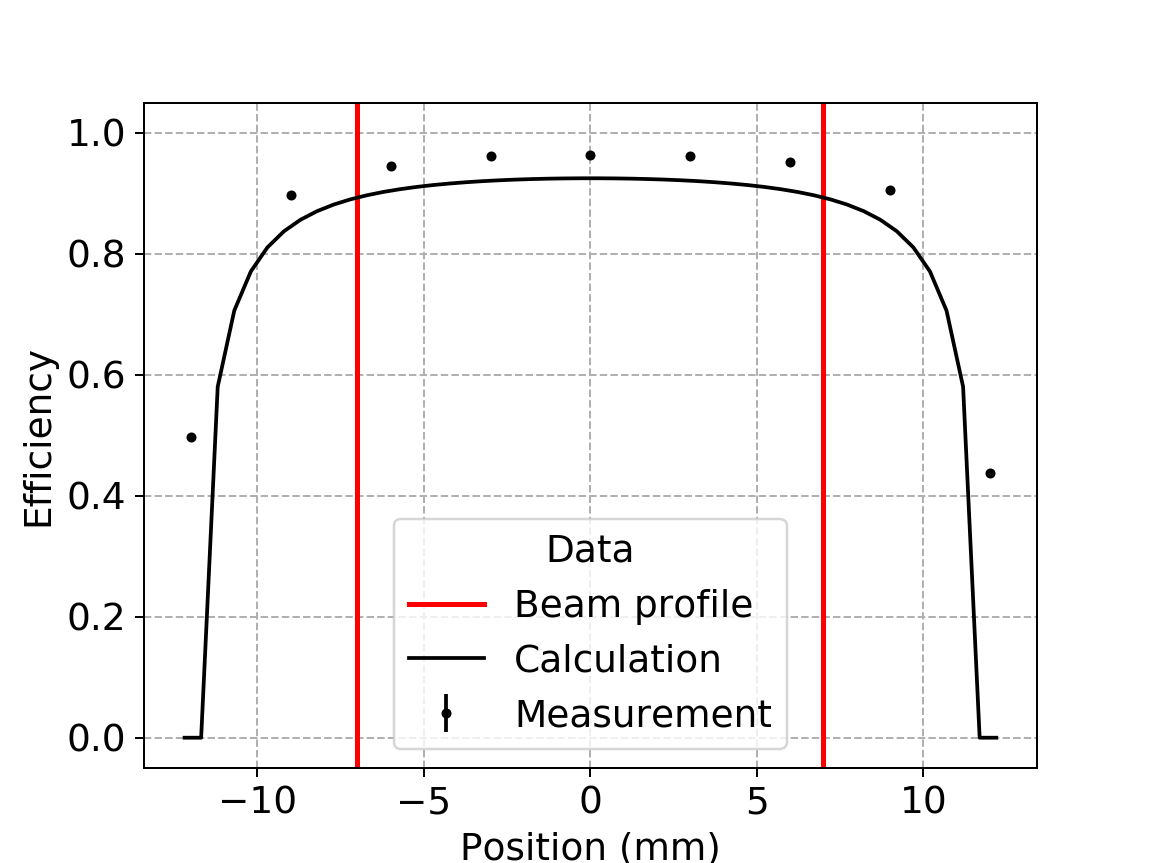

<IPython.core.display.Javascript object>


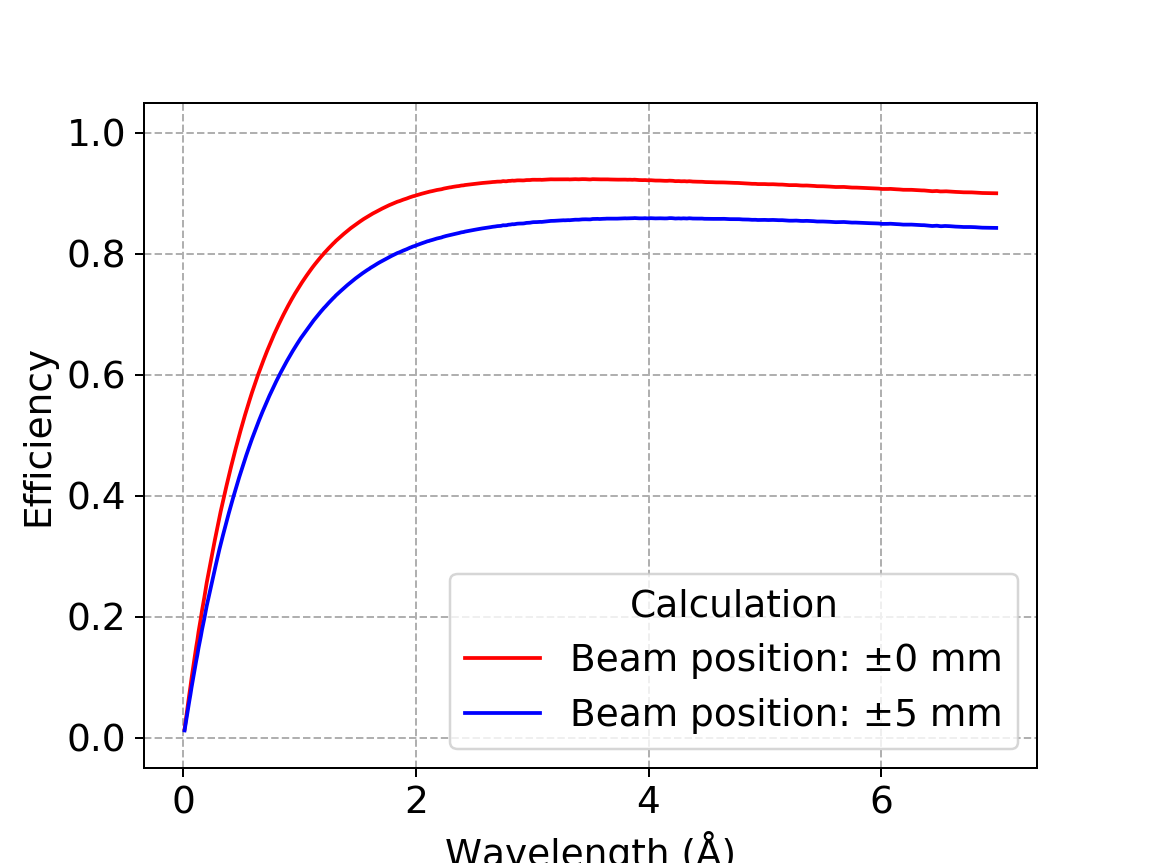

In [6]:
%matplotlib notebook
mg_hf.set_thick_labels(15)
# Declare paths
he3_centered_path = '../tables/he3_efficiency_centered.txt'
he3_3mm_offset_path = '../tables/he3_efficiency_3mm_offset.txt'
he3_5mm_offset_path = '../tables/he3_efficiency_5mm_offset.txt'
he3_incorrect_radius_path = '../tables/He3_efficiency_Full_wrong_radius.txt'
he3_incorrect_radius_path2 = '../tables/He3_efficiency_wrong_radius.txt'
he3_efficiency_vs_radius = '../tables/he3_efficiency_vs_offset.txt'

# Load data
he3_e_center = np.loadtxt(he3_centered_path, delimiter=",", unpack=True)
he3_e_5mm_offset = np.loadtxt(he3_5mm_offset_path, delimiter=",", unpack=True)
he3_e_3mm_offset = np.loadtxt(he3_3mm_offset_path, delimiter=",", unpack=True)
he3_e_wrong_full = np.loadtxt(he3_incorrect_radius_path, delimiter=",", unpack=True)
he3_e_wrong = np.loadtxt(he3_incorrect_radius_path2, delimiter=",", unpack=True)
he3_e_vs_radius = np.loadtxt(he3_efficiency_vs_radius, delimiter=",", unpack=True)

# Plot efficiency tube diameter @ 2.5 Å, measured and calculated
positions = np.array([-12, -9, -6, -3, 0, 3, 6, 9, 12])
efficiencies = np.array([49.7, 89.7, 94.5, 96.2, 96.3, 96.2, 95.2, 90.6, 43.7])
uncertainties = np.array([0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2])
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
ax1.axvline(x=-7, color='red', linewidth=2, label='Beam profile', zorder=2)
ax1.axvline(x=7, color='red', linewidth=2, label=None, zorder=2)
#ax2.axvline(x=-13, color='blue', linewidth=2, label='Beam profile', zorder=2)
#ax2.axvline(x=2, color='blue', linewidth=2, label=None, zorder=2)
#plt.axvline(x=-10, color='red', linewidth=2, label='Beam position: ±3 mm offset', zorder=2)
#plt.axvline(x=4, color='red', linewidth=2, label=None, zorder=2)
ax1.grid(True, which='major', linestyle='--', zorder=0)
ax1.grid(True, which='minor', linestyle='--', zorder=0)
ax1.plot(he3_e_vs_radius[0]*10, he3_e_vs_radius[1], label='Calculation', zorder=5, color='black')
ax1.errorbar(positions, efficiencies/100, uncertainties/100, fmt='.', label='Measurement', zorder=5, color='black')
ax1.set_xlabel('Position (mm)')
ax1.set_ylabel('Efficiency')
ax1.set_ylim(-0.05, 1.05)
ax1.legend(title='Data')
fig.show()
# Save data
output_path = '../output/efficiency_vs_radius.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Plot 
fig = plt.figure()
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.plot(he3_e_center[0], he3_e_center[1], label='Beam position: ±0 mm', zorder=5, color='red')
#plt.plot(he3_e_3mm_offset[0], he3_e_3mm_offset[1], label='Beam position: ±3 mm', zorder=5, color='blue')
plt.plot(he3_e_5mm_offset[0], he3_e_5mm_offset[1], label='Beam position: ±5 mm', zorder=5, color='blue')
#plt.plot(he3_e_wrong_full[0], he3_e_wrong_full[1], label='Wrong radius', zorder=5)
#plt.plot(he3_e_wrong[0], he3_e_wrong[1], label='Wrong radius', zorder=5)
plt.legend(title='Calculation')
plt.ylim(-0.05, 1.05)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Efficiency')
fig.show()
# Save data
output_path = '../output/he3_efficency_calc.pdf'
fig.savefig(output_path, bbox_inches='tight')

###### 4.2.2 Peak areas

<IPython.core.display.Javascript object>


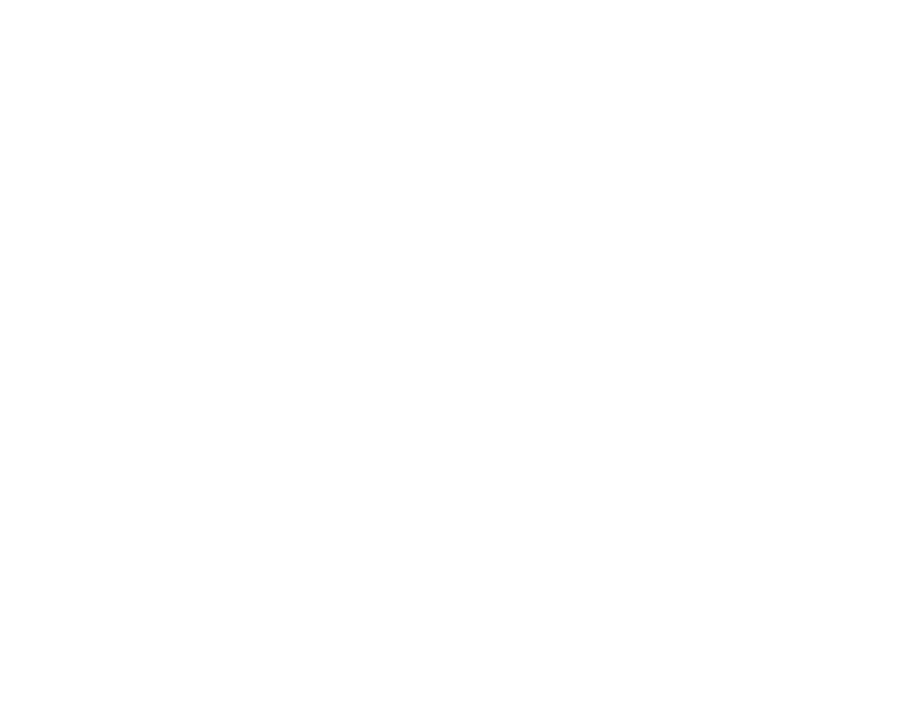

<IPython.core.display.Javascript object>


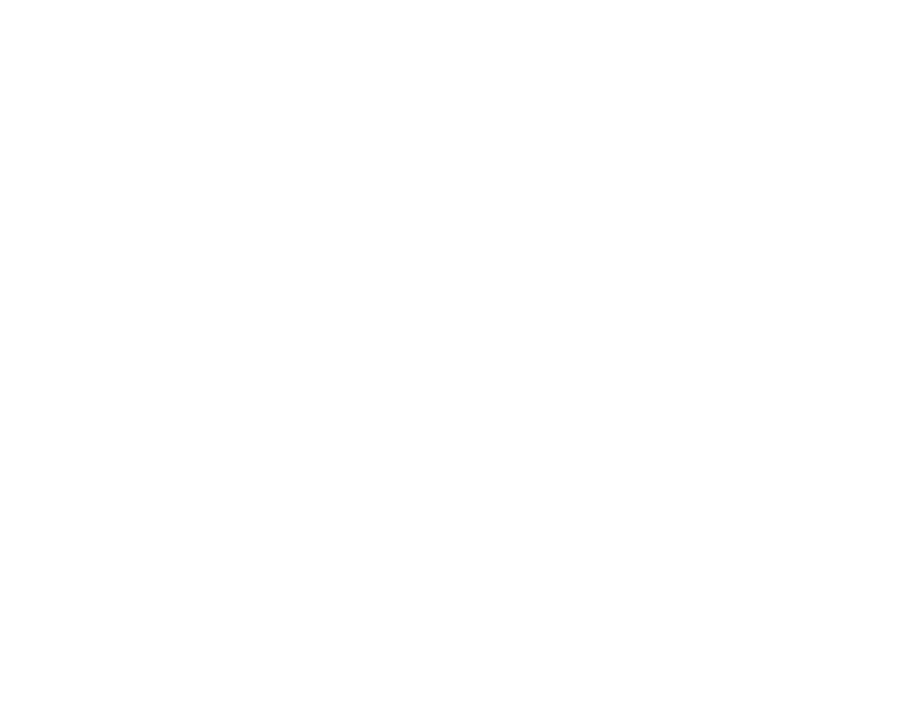

<IPython.core.display.Javascript object>


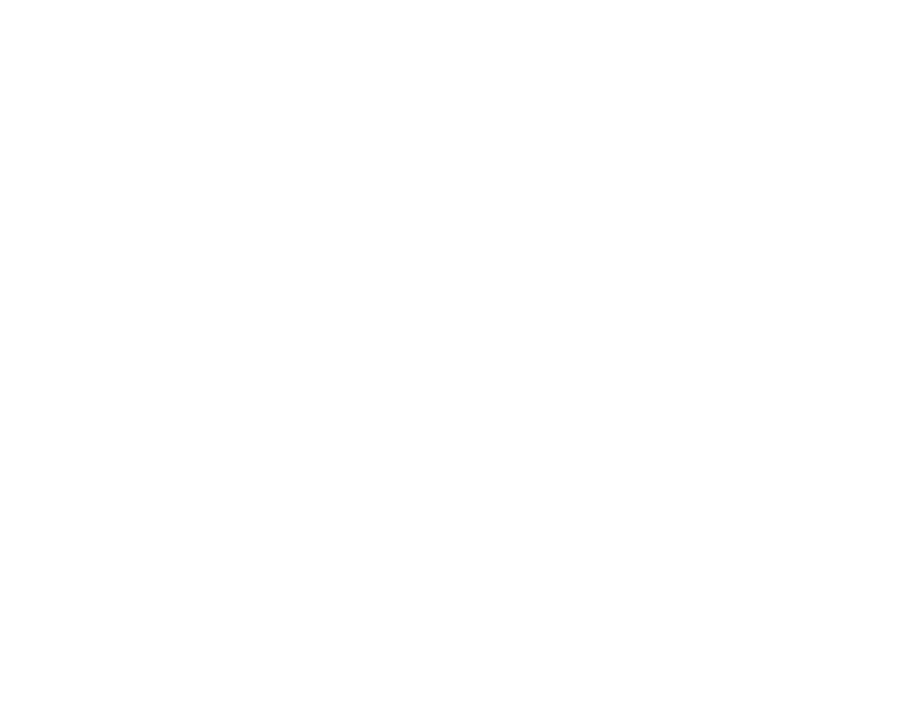

<IPython.core.display.Javascript object>


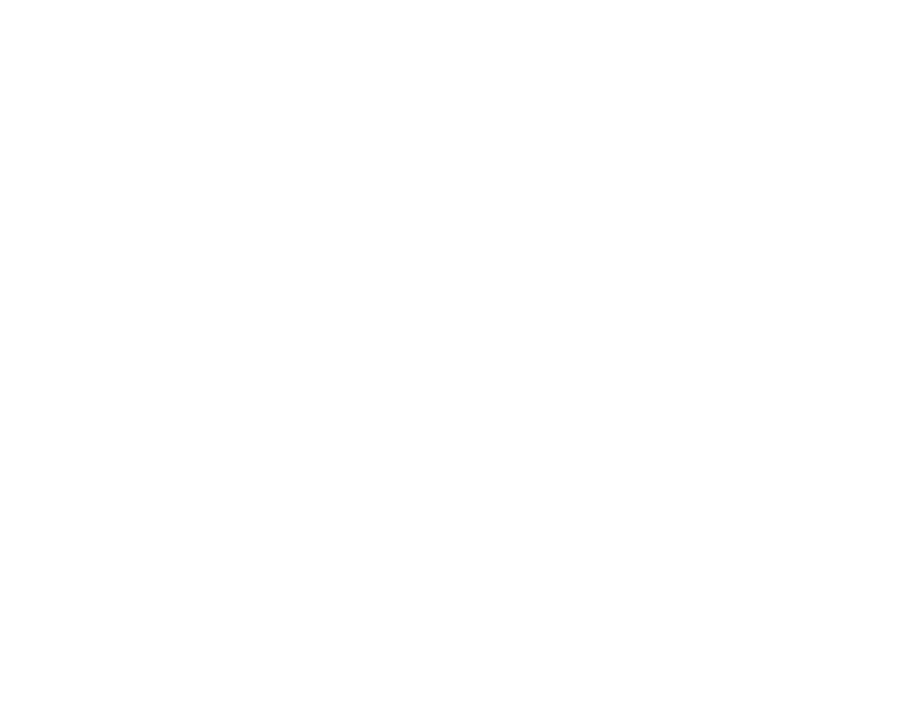

<IPython.core.display.Javascript object>


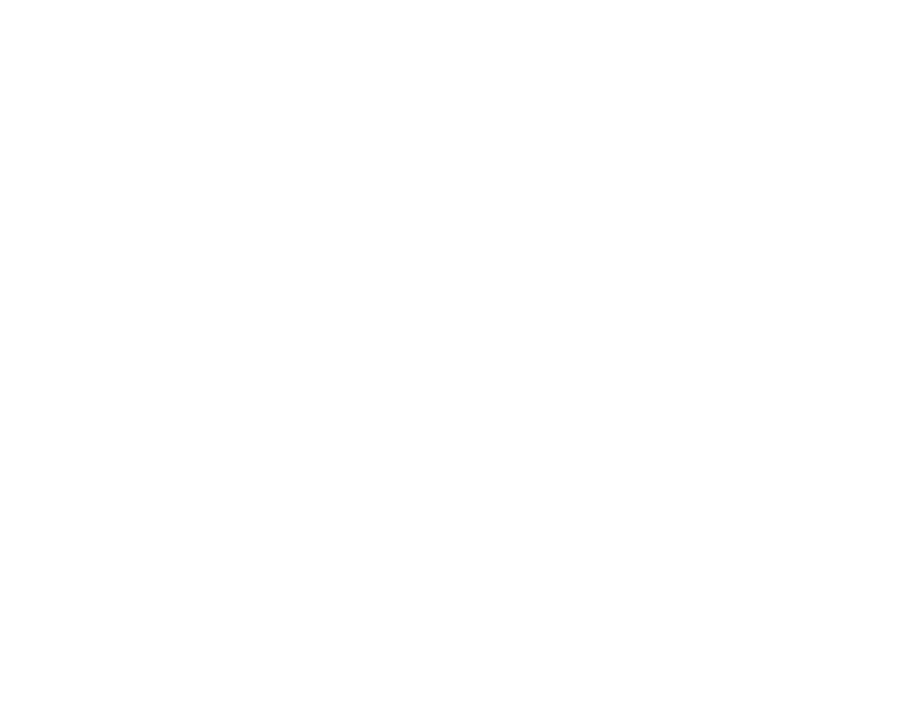

<IPython.core.display.Javascript object>


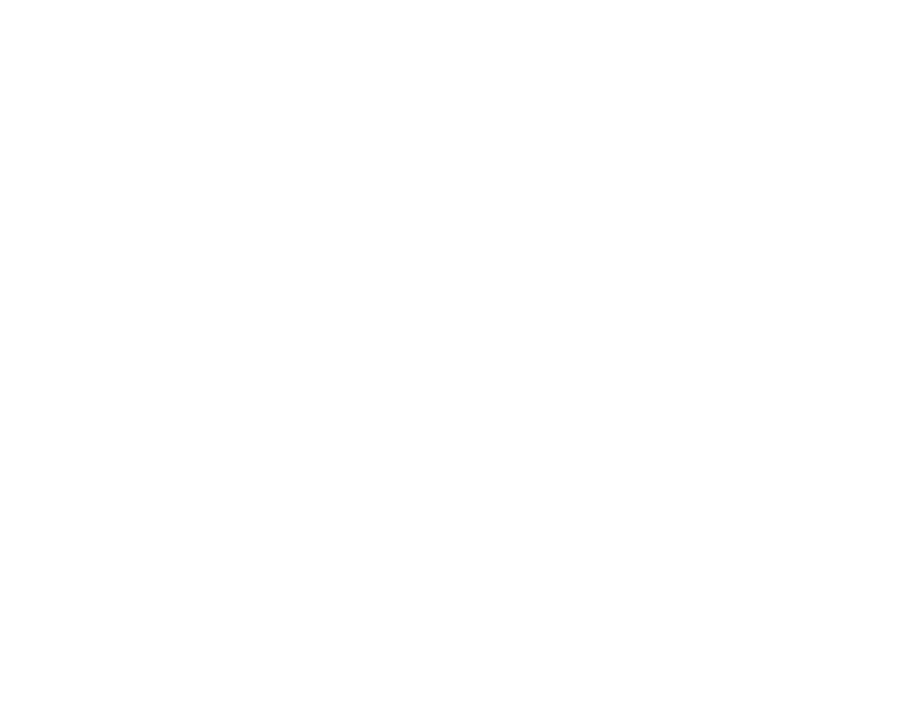

<IPython.core.display.Javascript object>


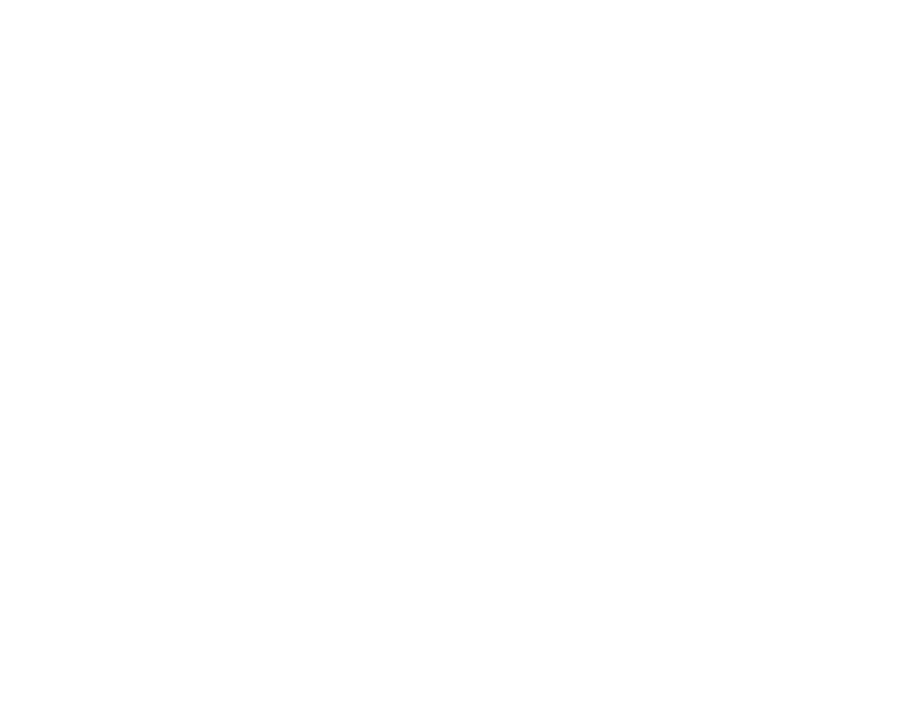

<IPython.core.display.Javascript object>


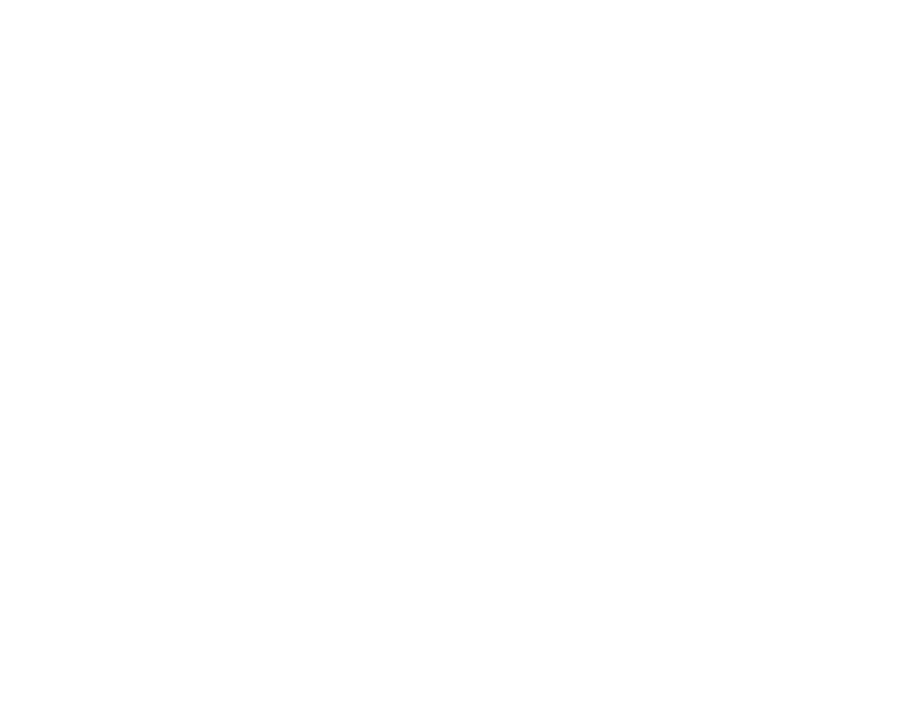

<IPython.core.display.Javascript object>


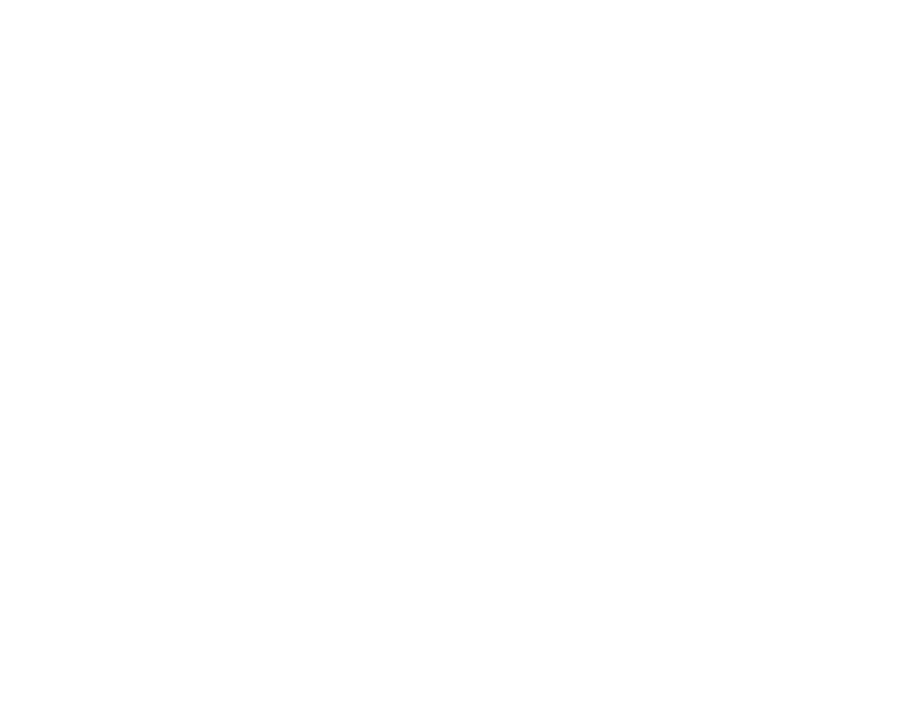

<IPython.core.display.Javascript object>


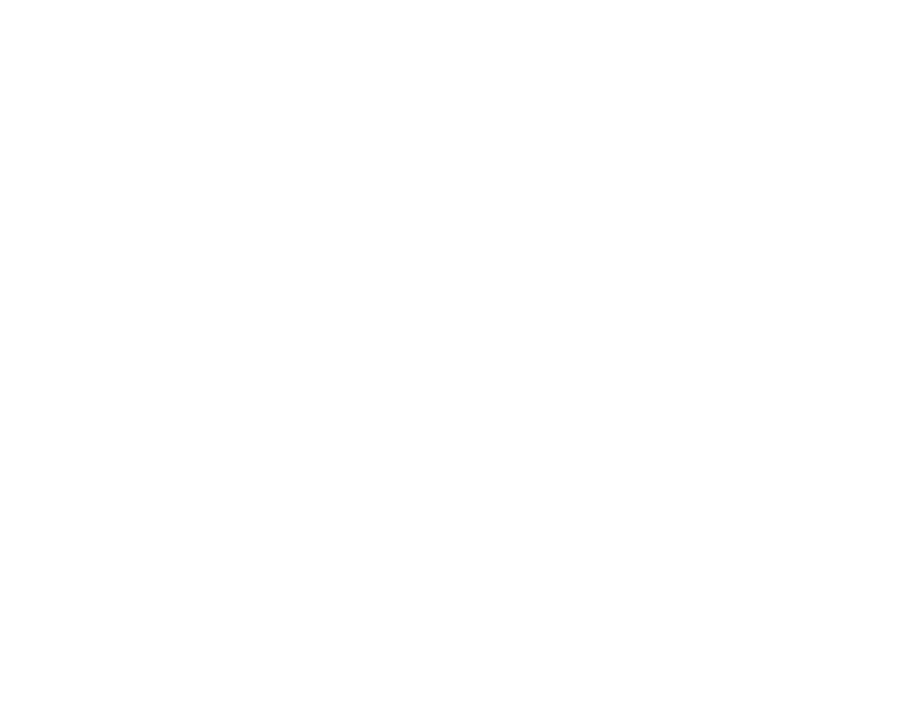

<IPython.core.display.Javascript object>


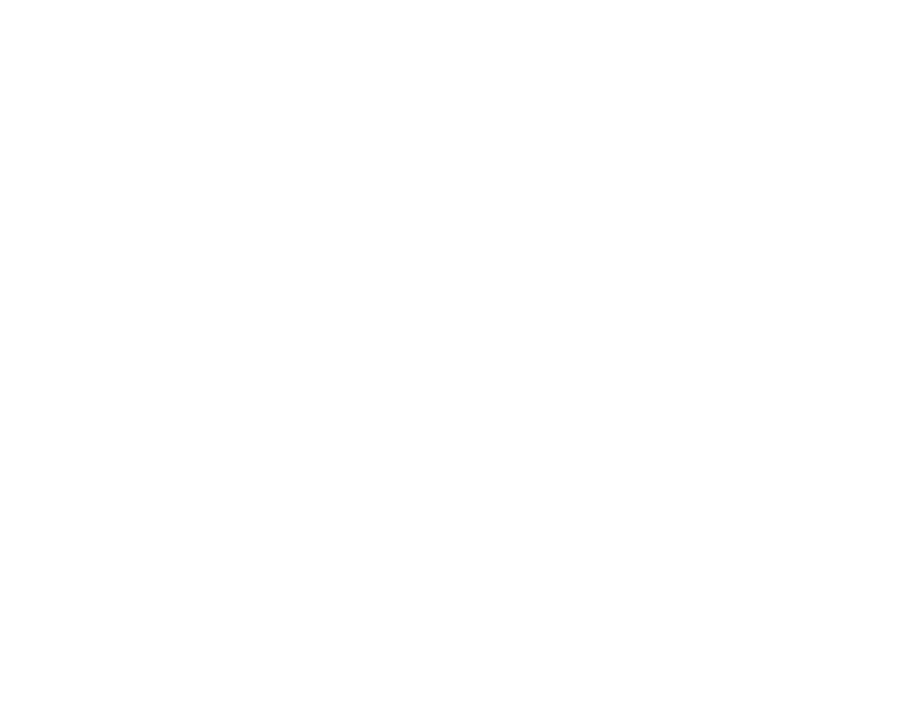

<IPython.core.display.Javascript object>


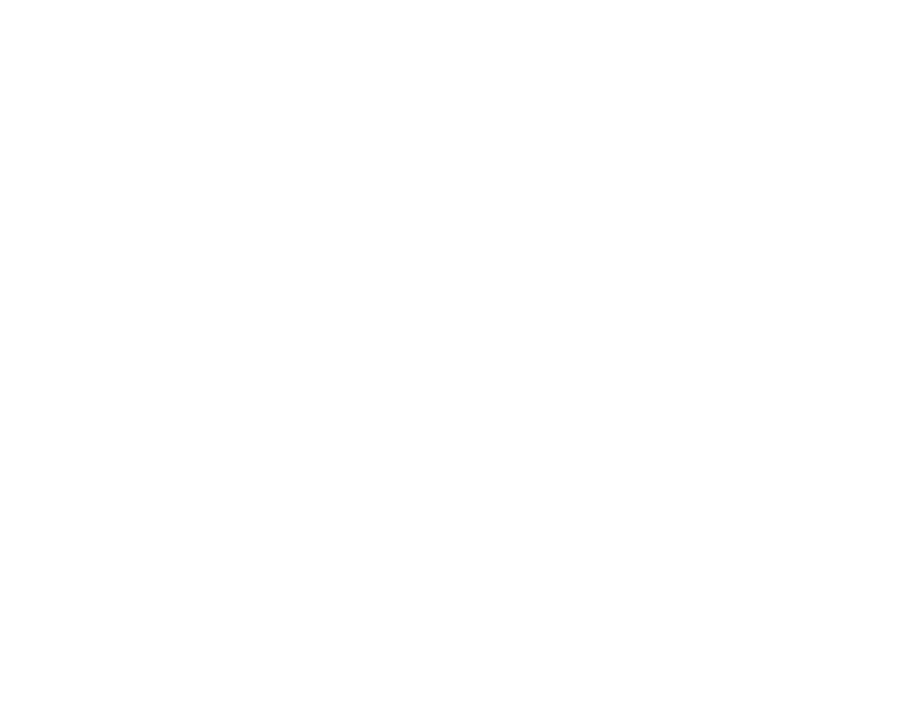

<IPython.core.display.Javascript object>


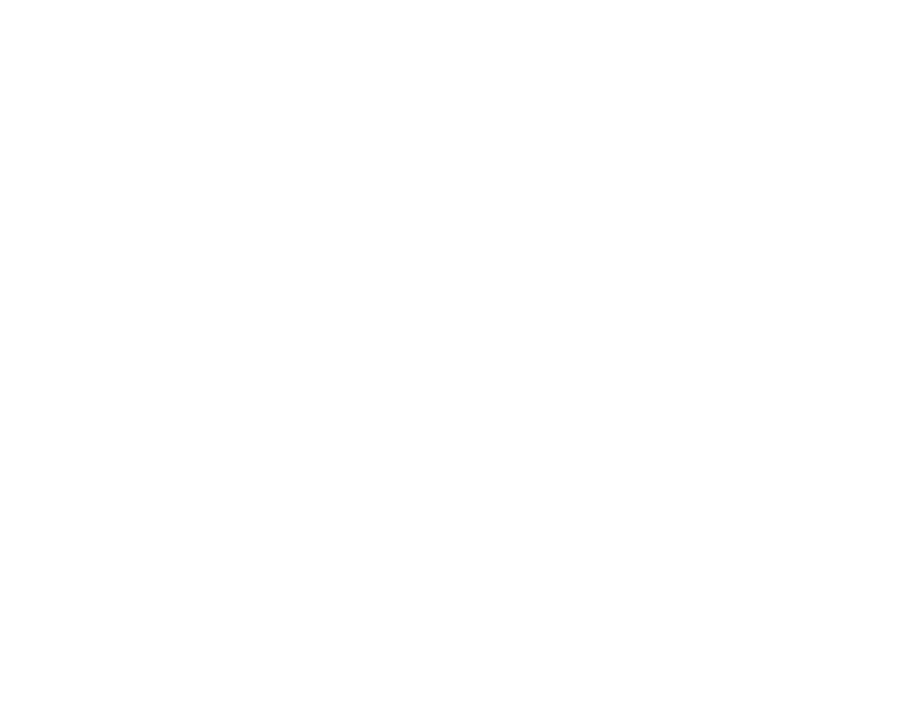

<IPython.core.display.Javascript object>


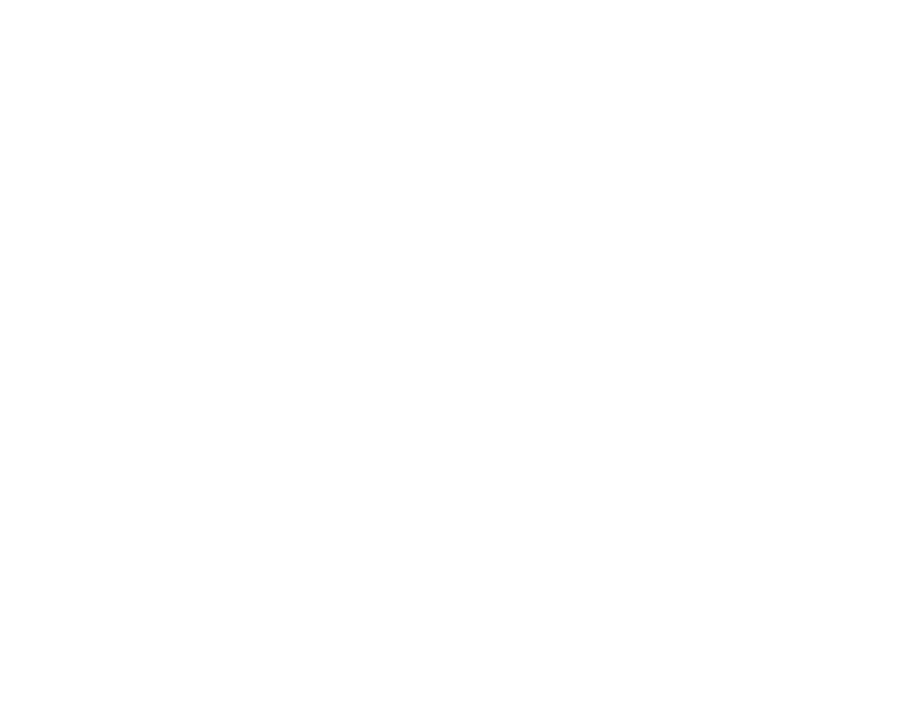

<IPython.core.display.Javascript object>


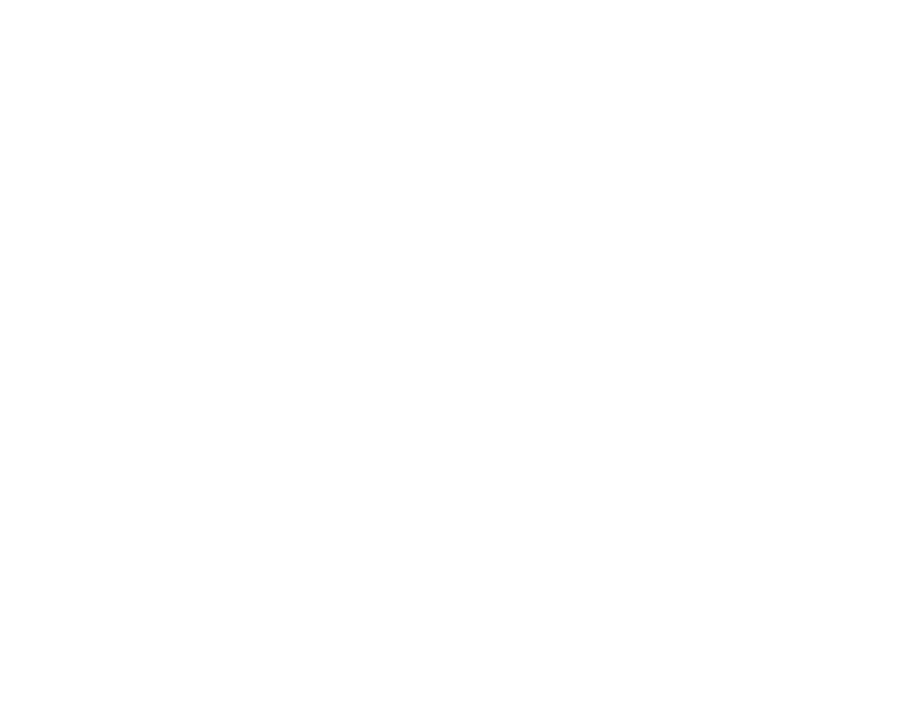

<IPython.core.display.Javascript object>


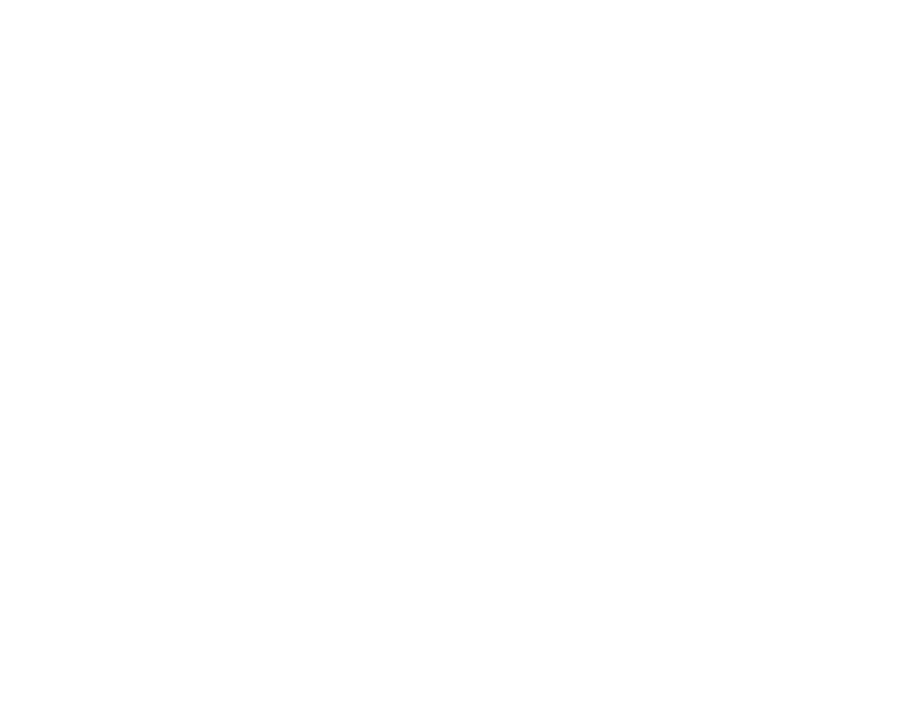

<IPython.core.display.Javascript object>


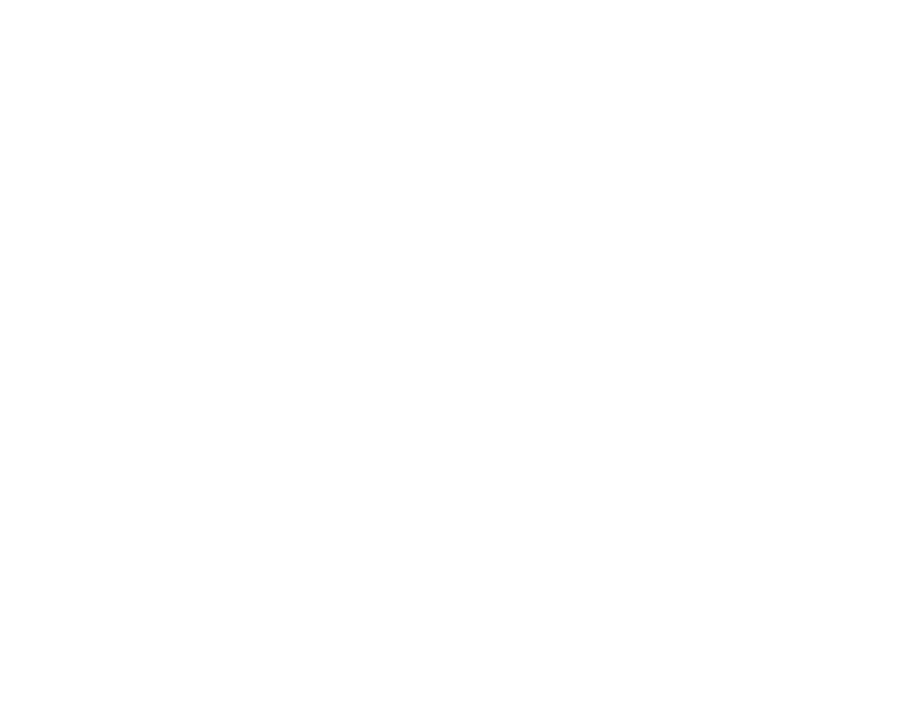

<IPython.core.display.Javascript object>


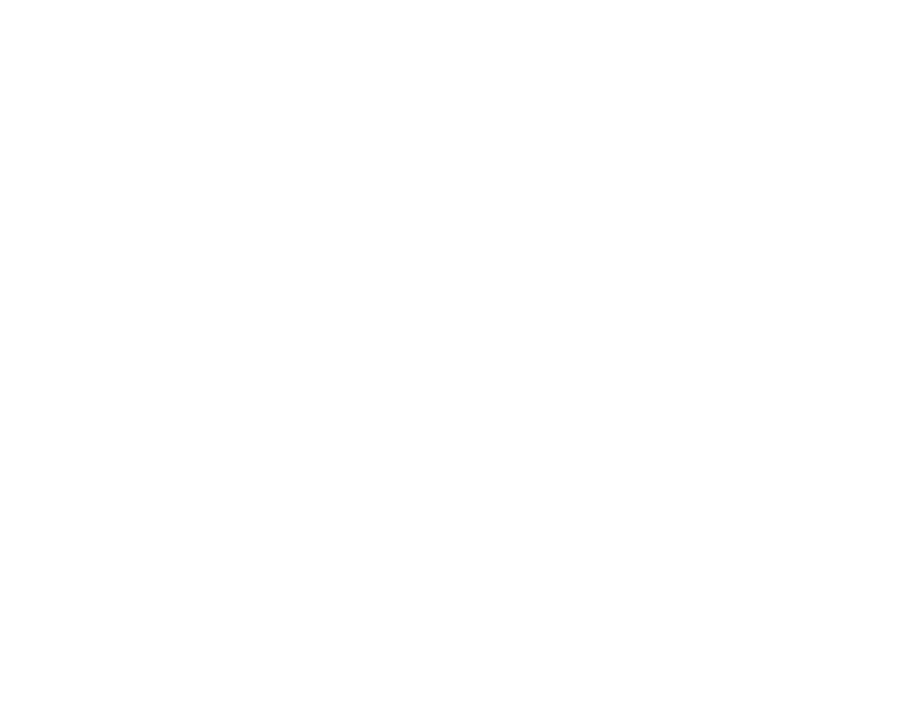

<IPython.core.display.Javascript object>


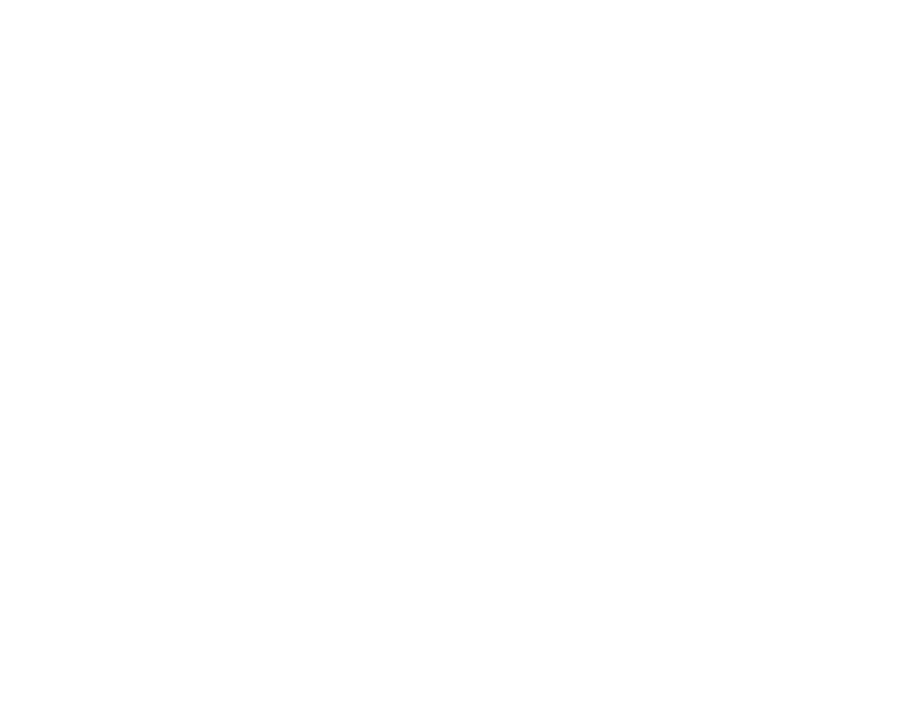

<IPython.core.display.Javascript object>


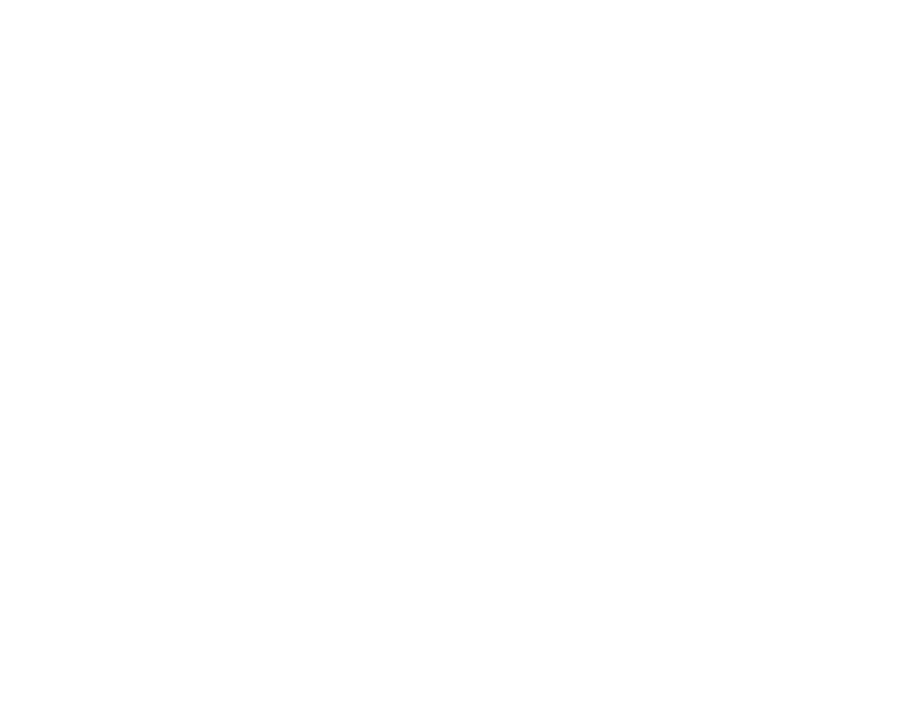

<IPython.core.display.Javascript object>


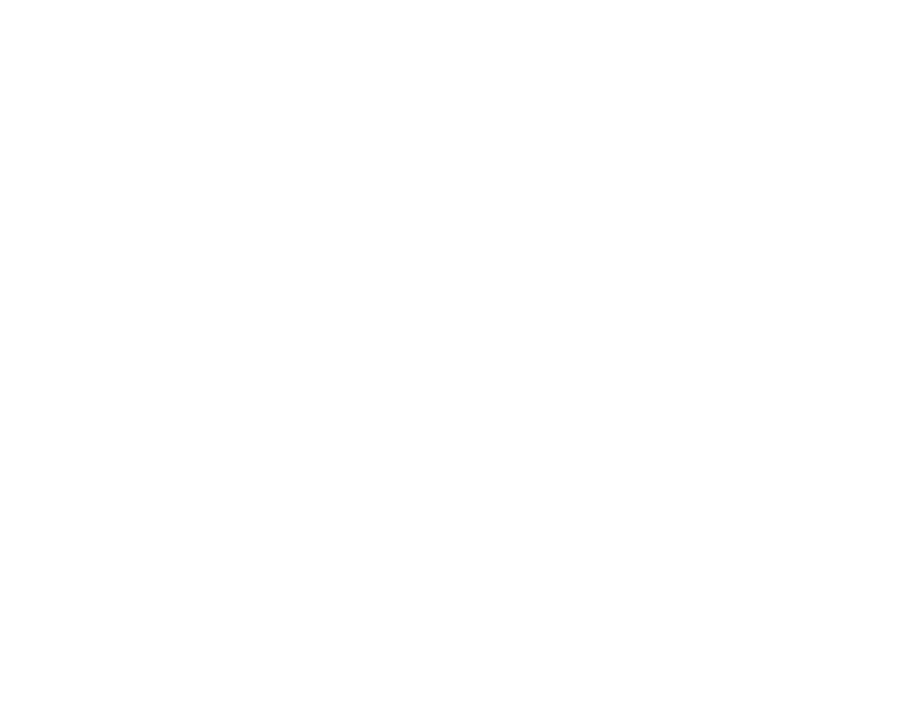

<IPython.core.display.Javascript object>


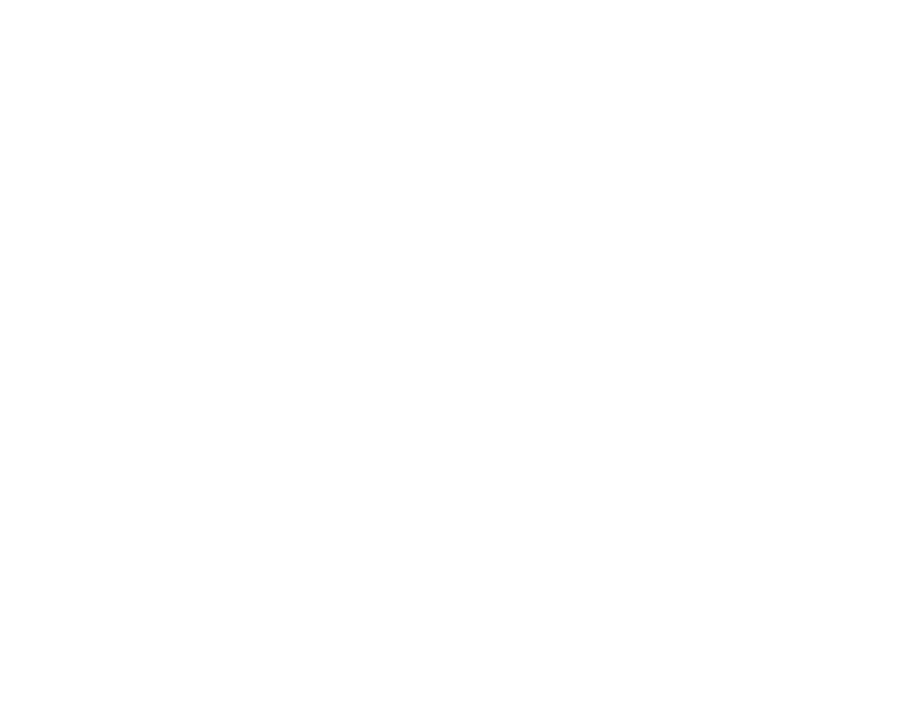

<IPython.core.display.Javascript object>


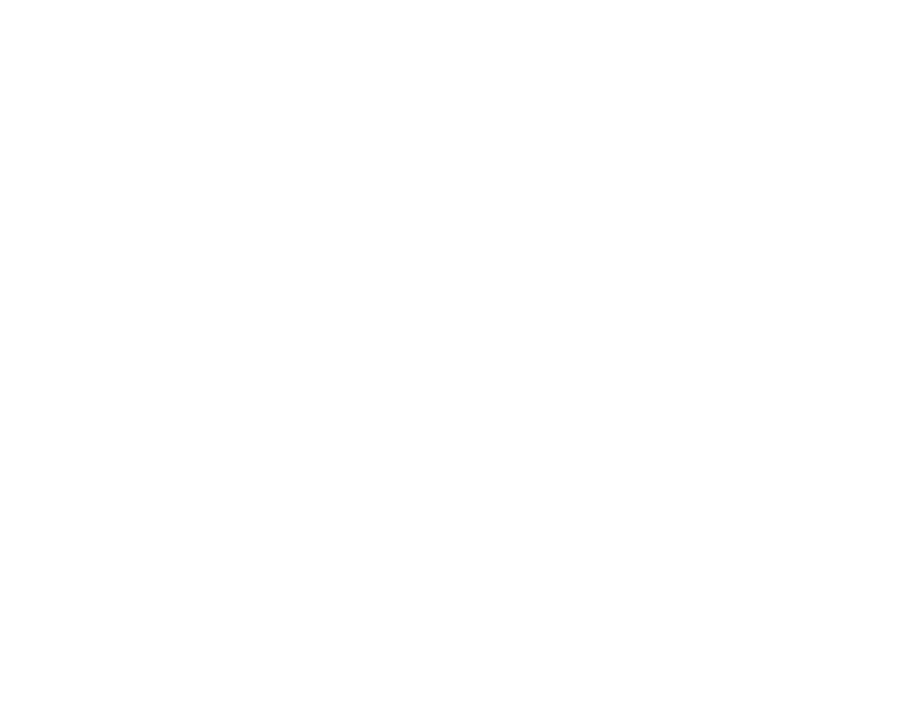

<IPython.core.display.Javascript object>


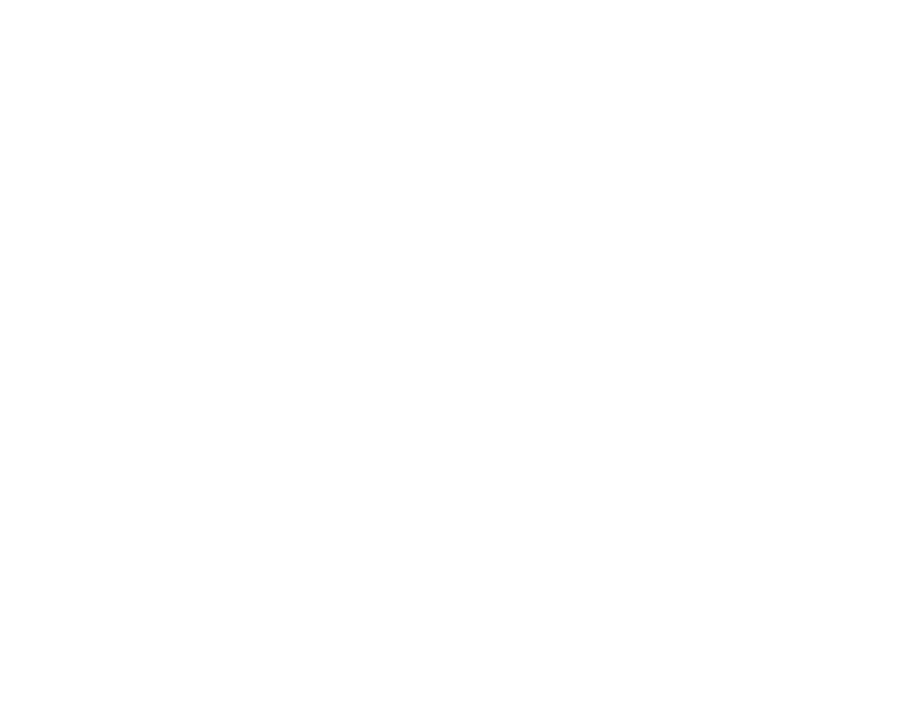

<IPython.core.display.Javascript object>


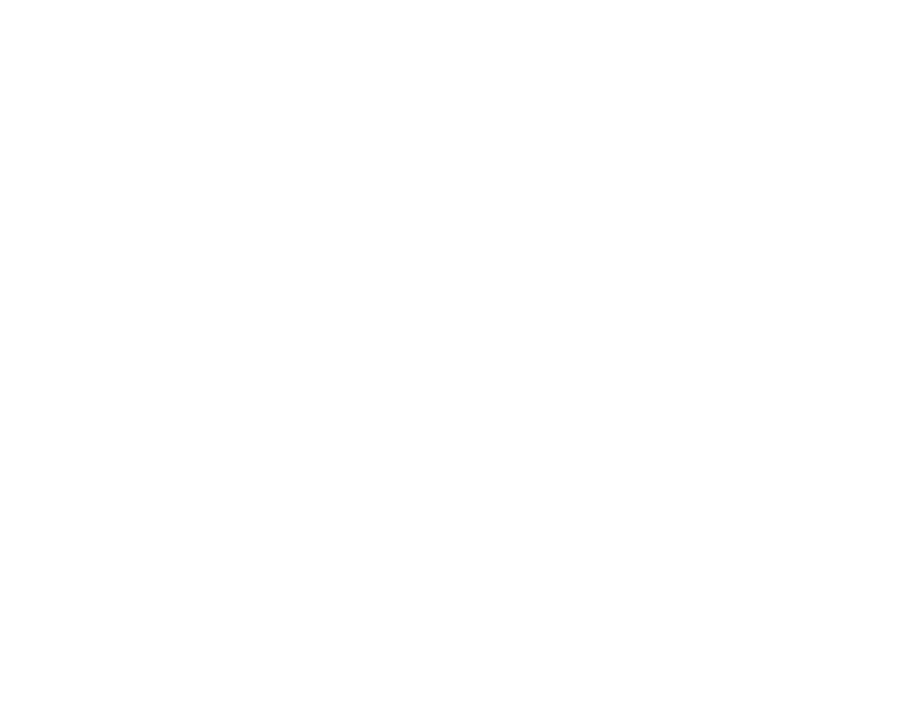

<IPython.core.display.Javascript object>


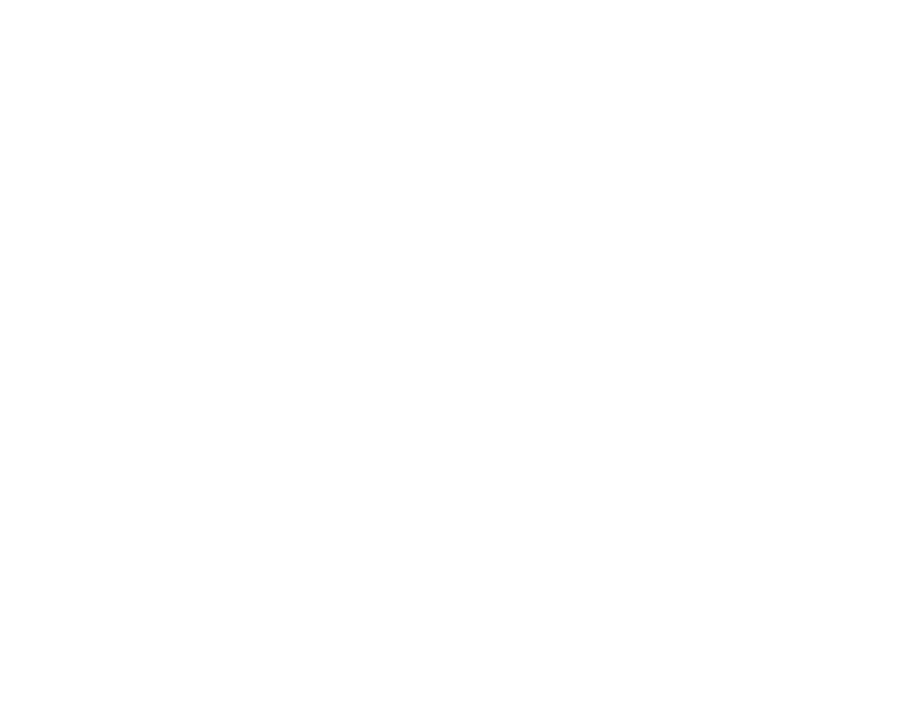

<IPython.core.display.Javascript object>


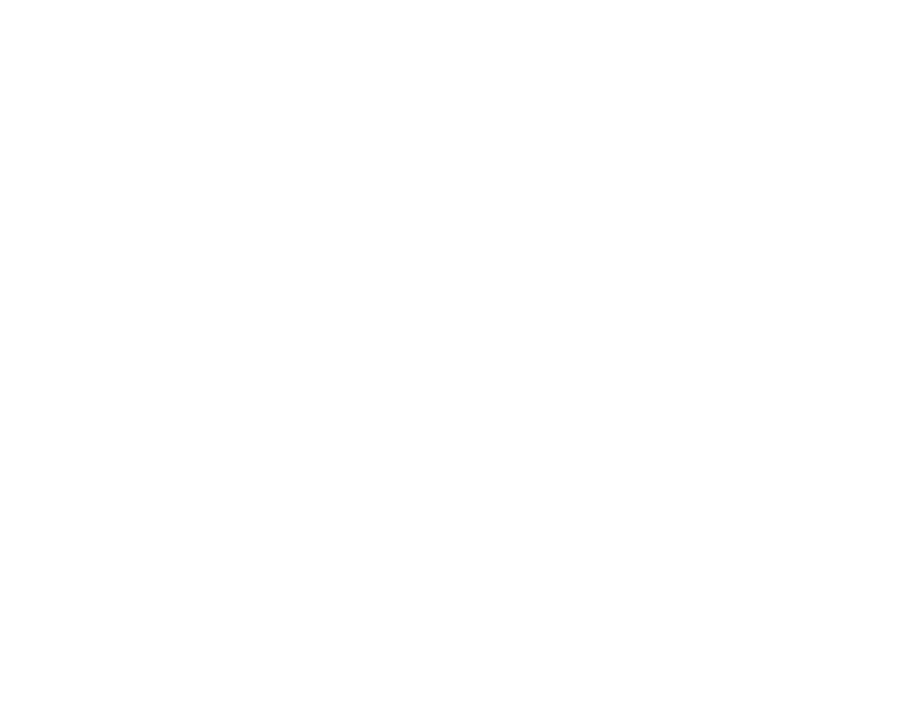

<IPython.core.display.Javascript object>


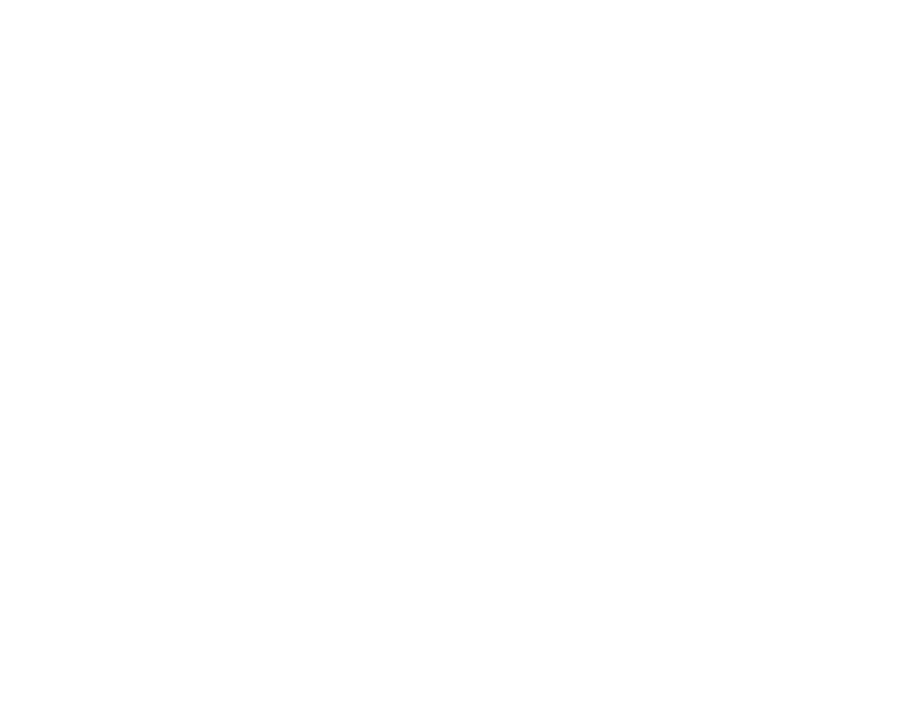

<IPython.core.display.Javascript object>


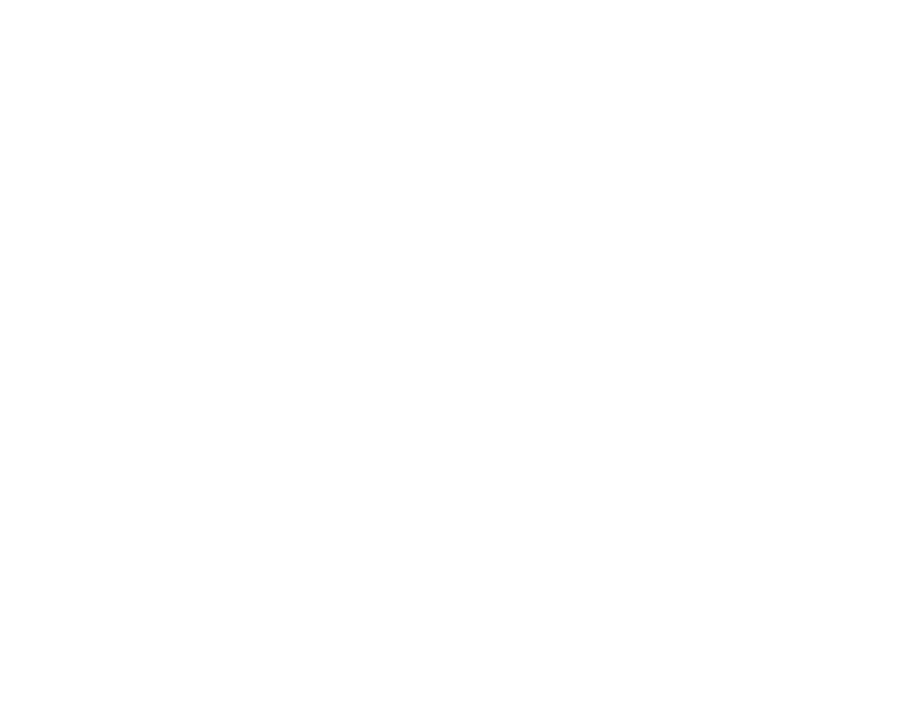

<IPython.core.display.Javascript object>


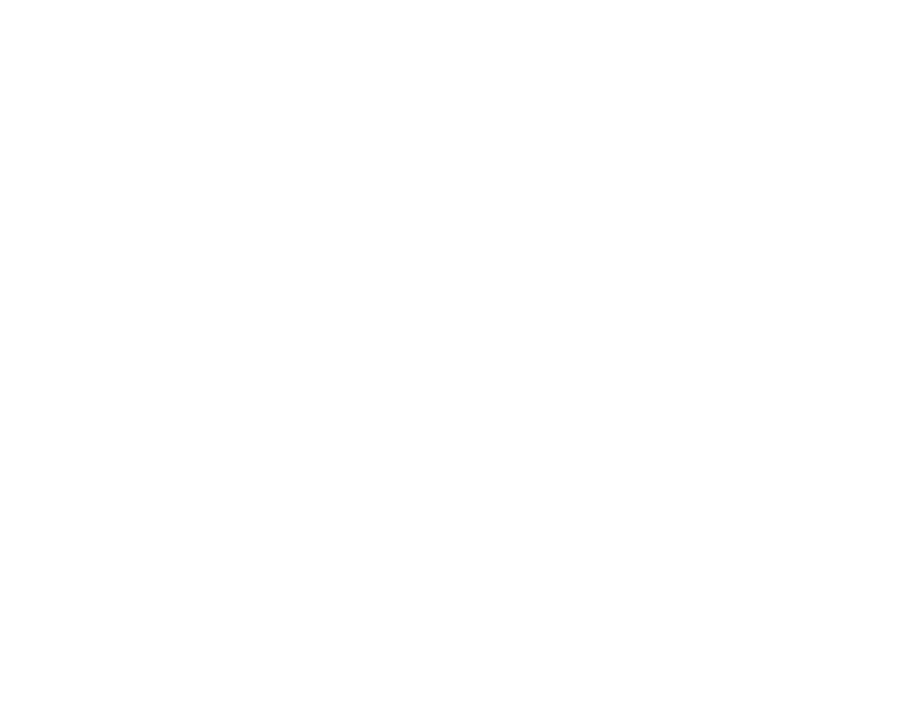

<IPython.core.display.Javascript object>


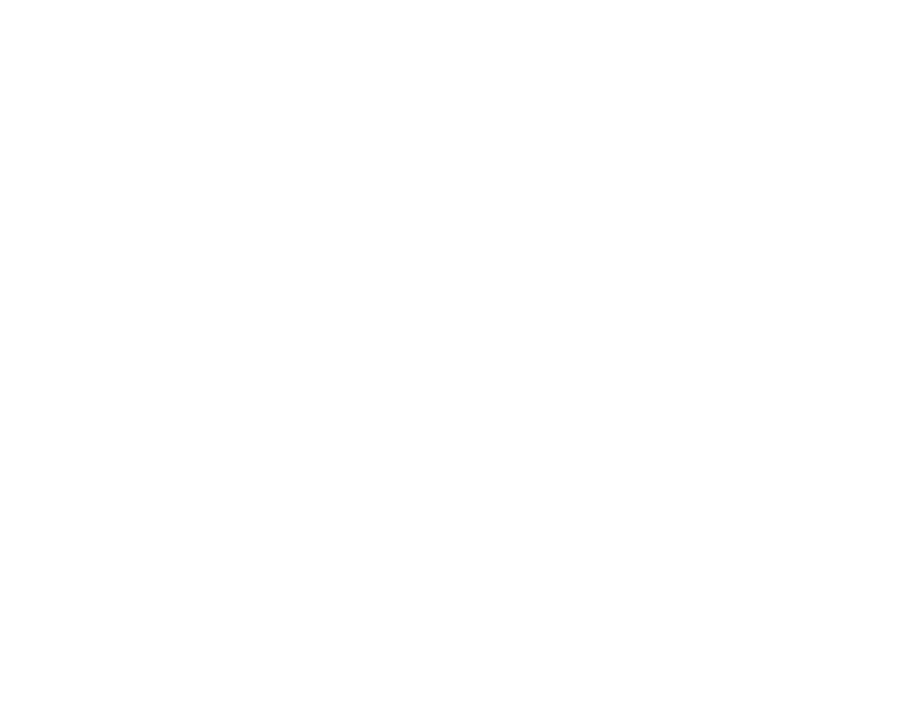

<IPython.core.display.Javascript object>


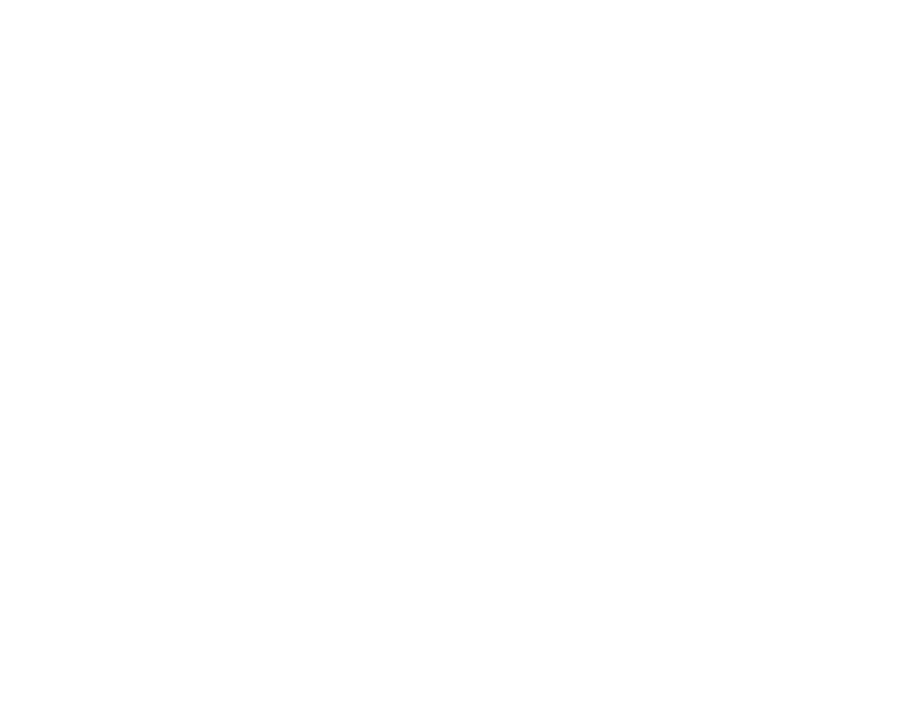

<IPython.core.display.Javascript object>


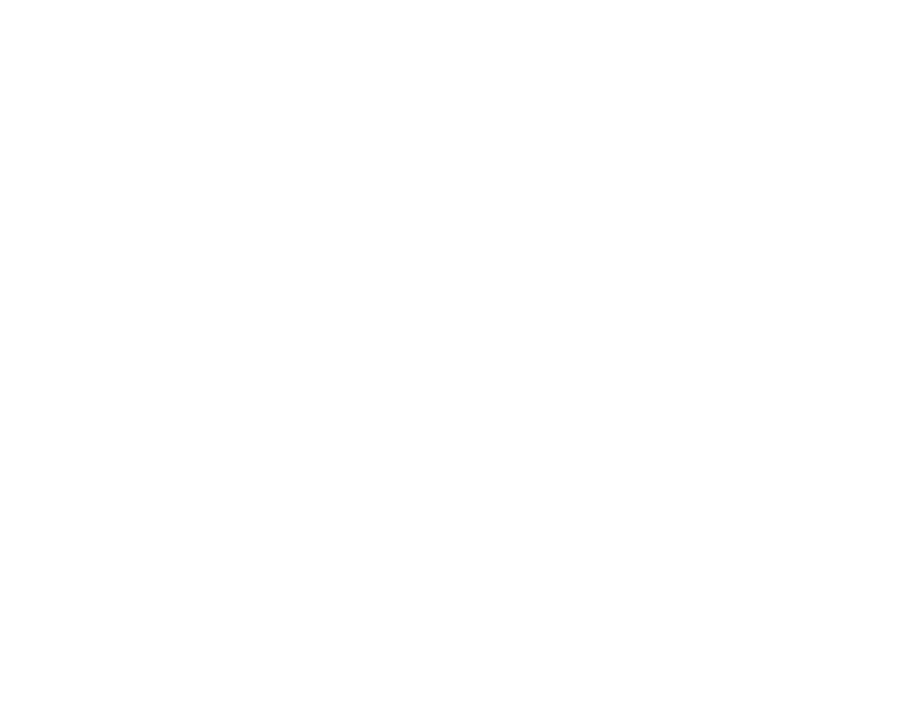

<IPython.core.display.Javascript object>


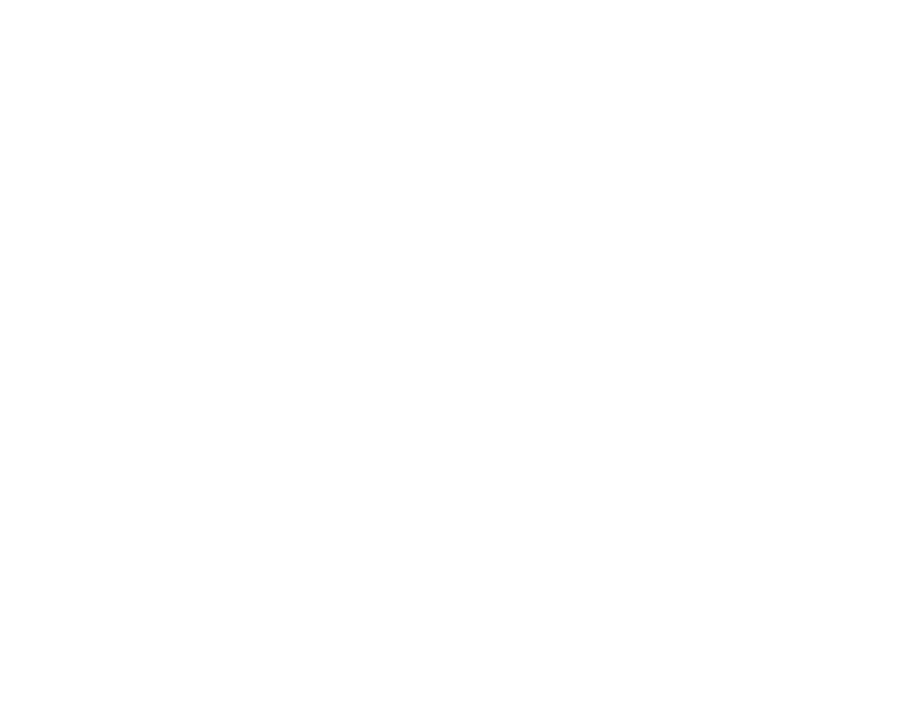

<IPython.core.display.Javascript object>


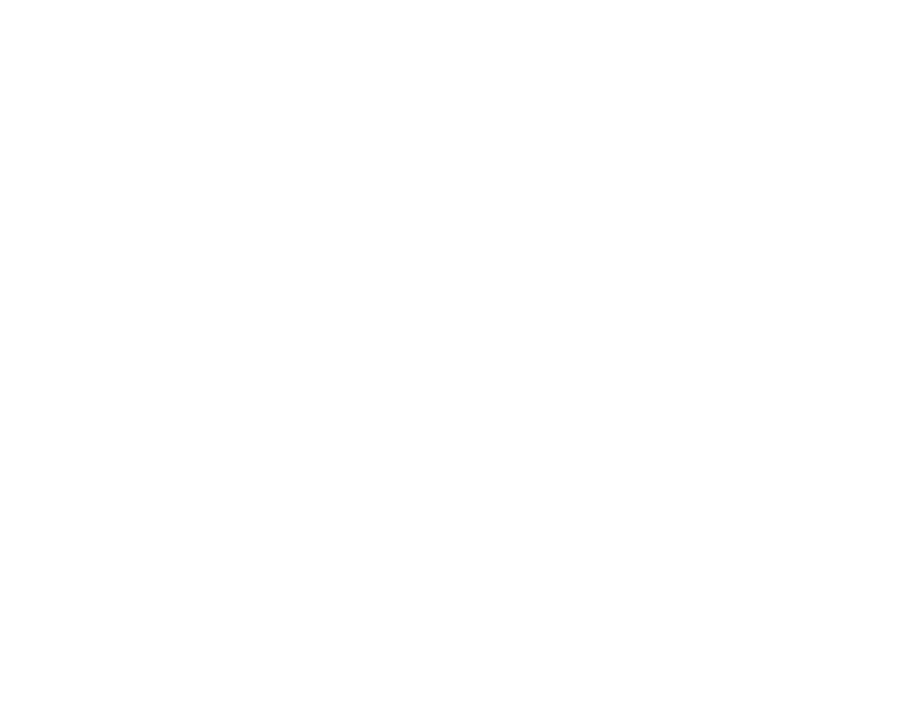

<IPython.core.display.Javascript object>


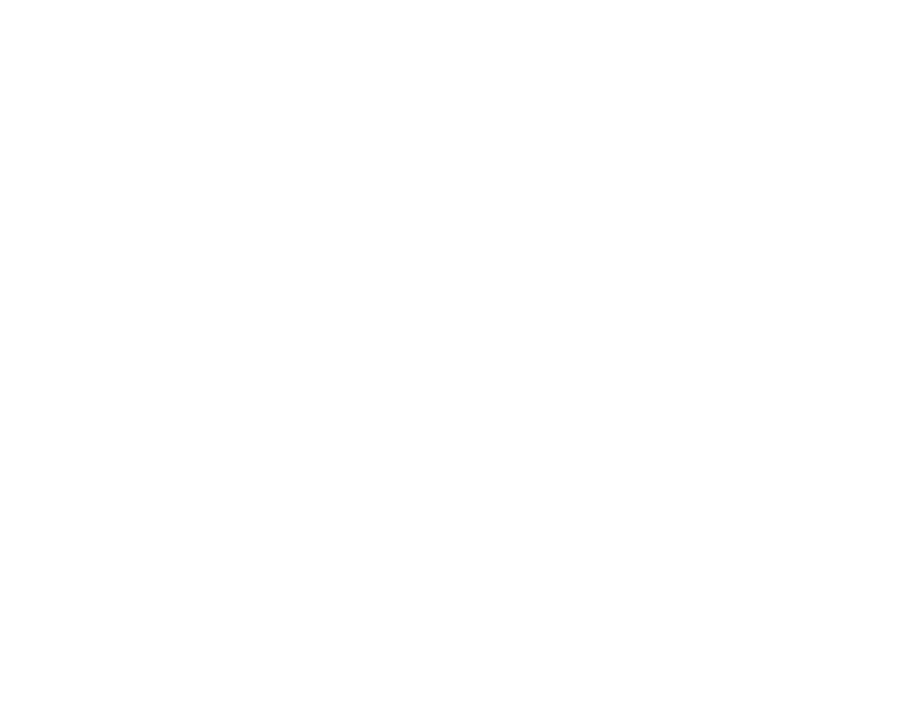

<IPython.core.display.Javascript object>


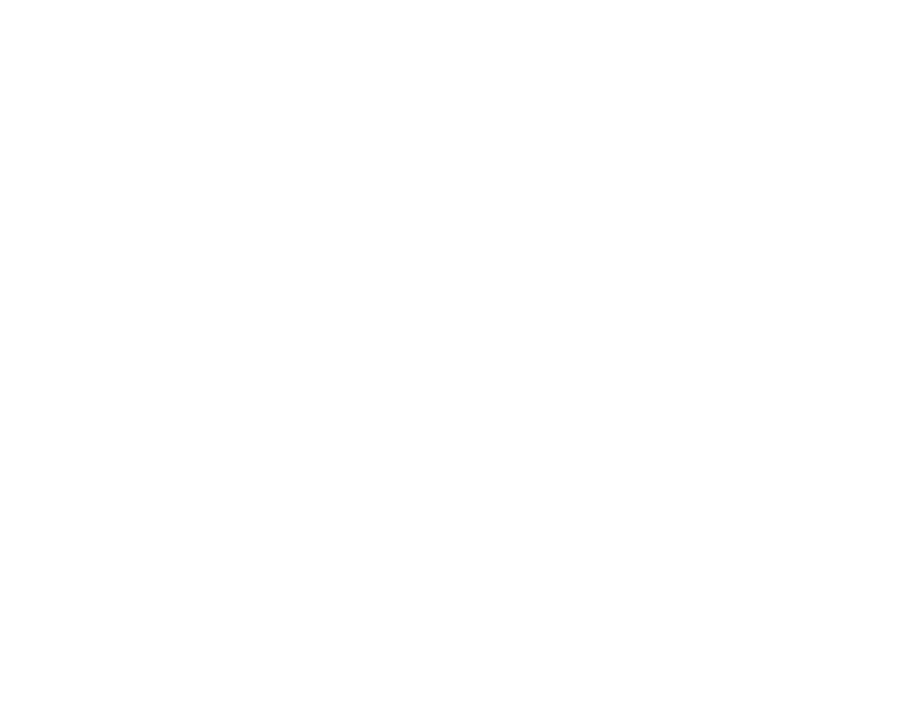

<IPython.core.display.Javascript object>


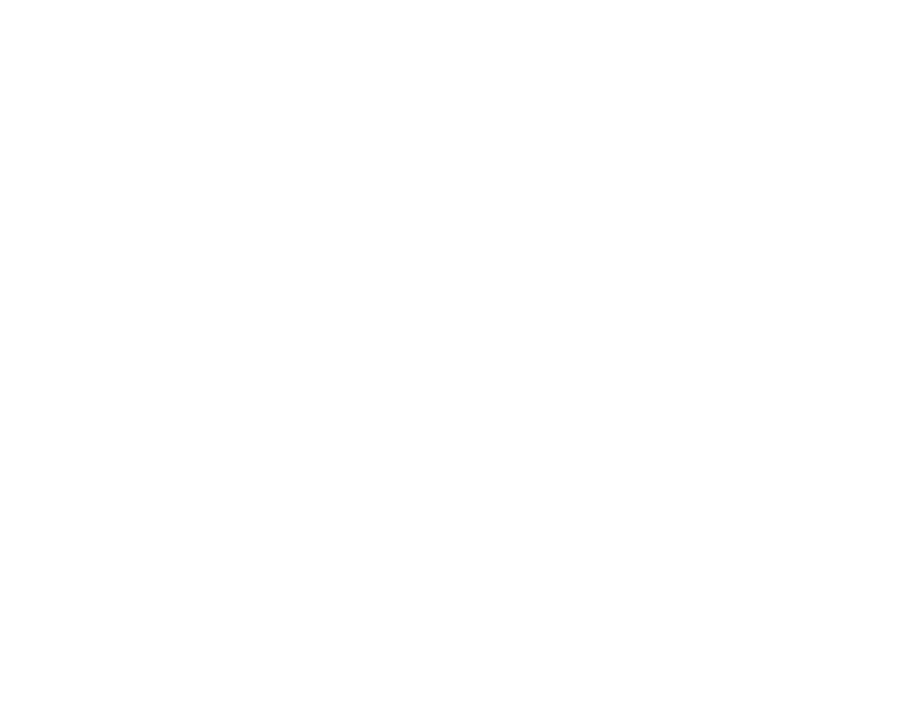

<IPython.core.display.Javascript object>


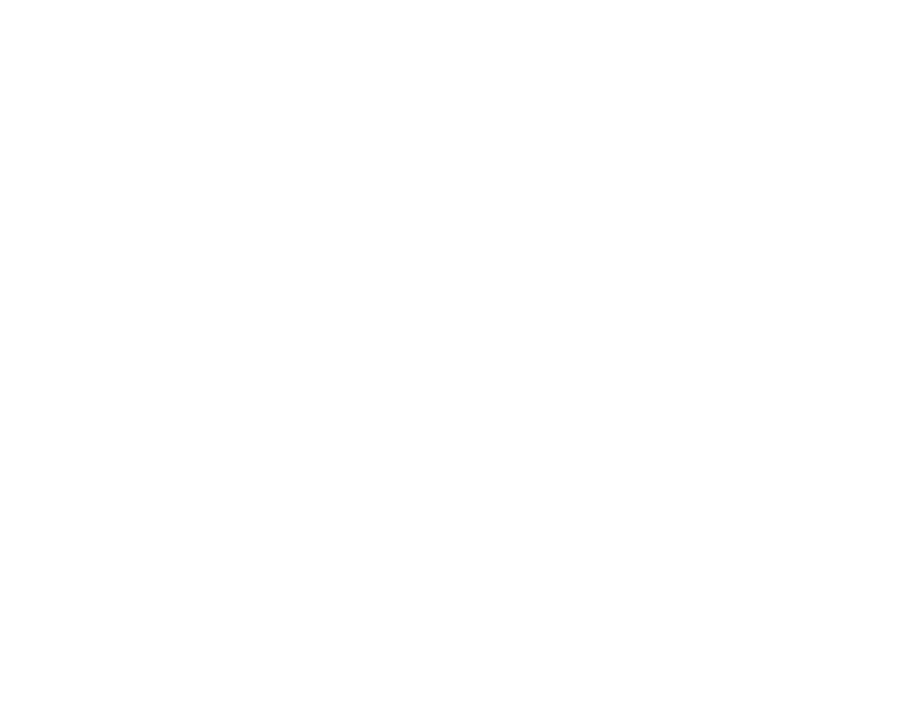

<IPython.core.display.Javascript object>


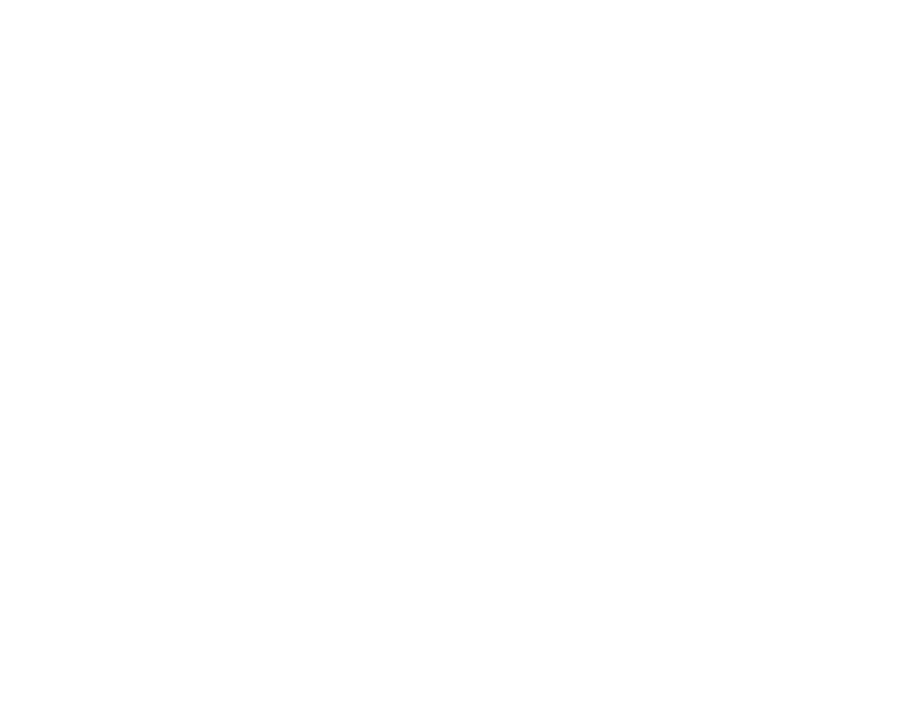

<IPython.core.display.Javascript object>


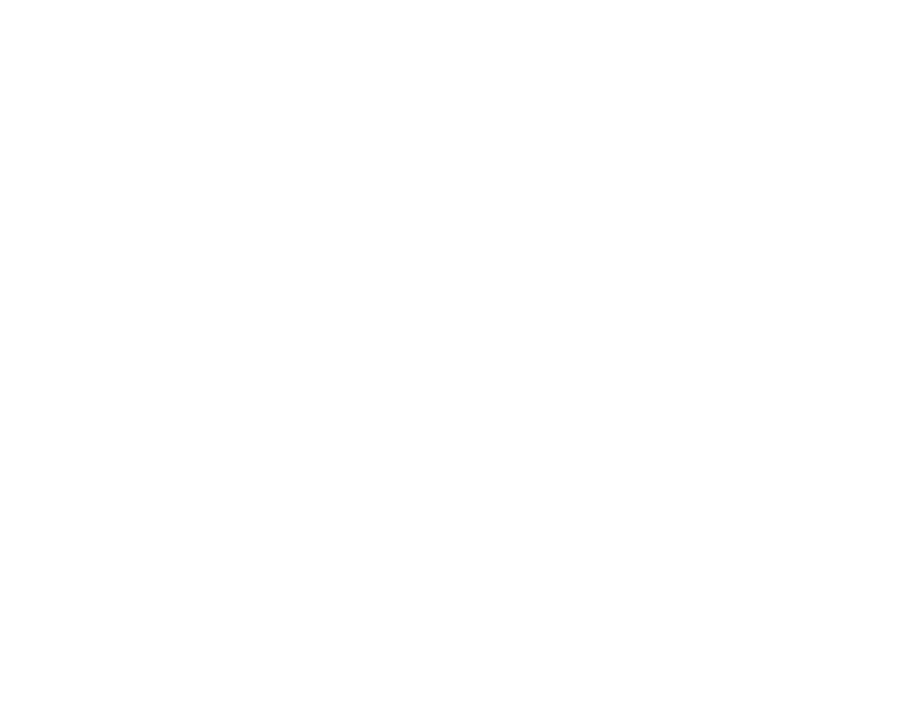

<IPython.core.display.Javascript object>


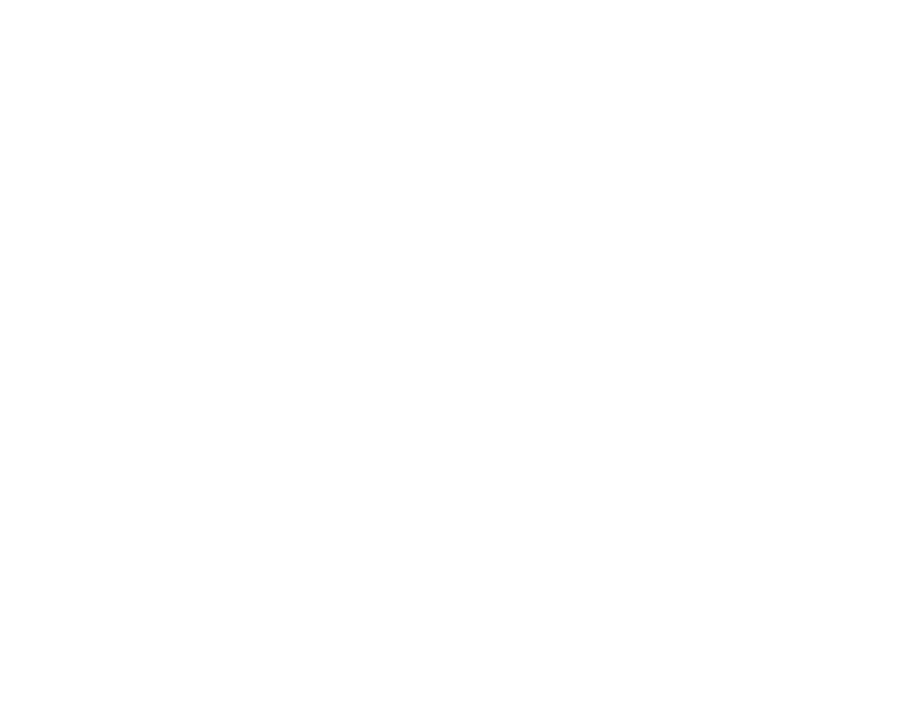

<IPython.core.display.Javascript object>


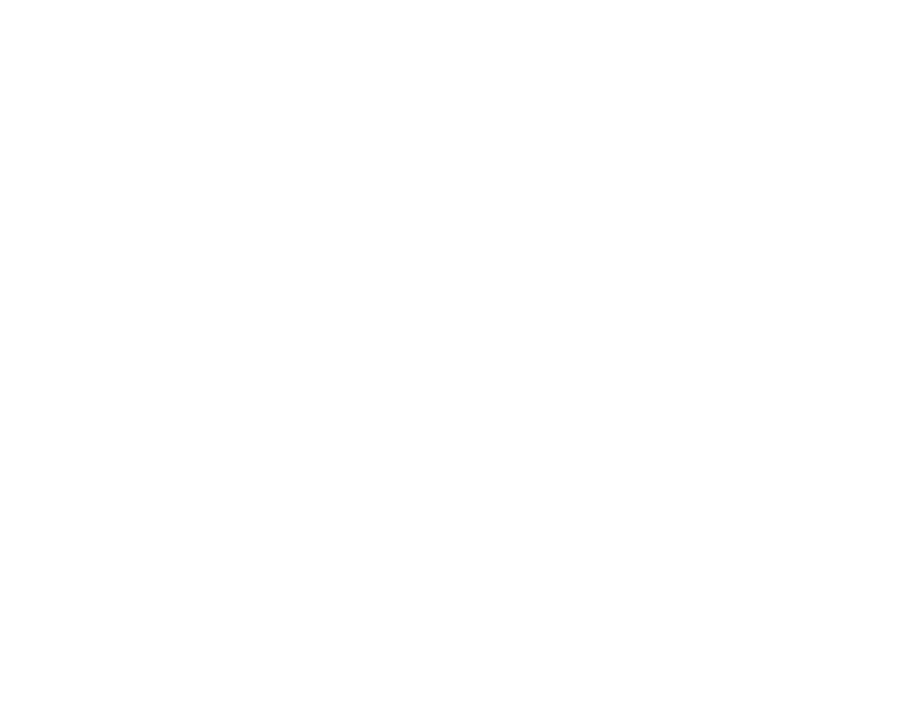

<IPython.core.display.Javascript object>


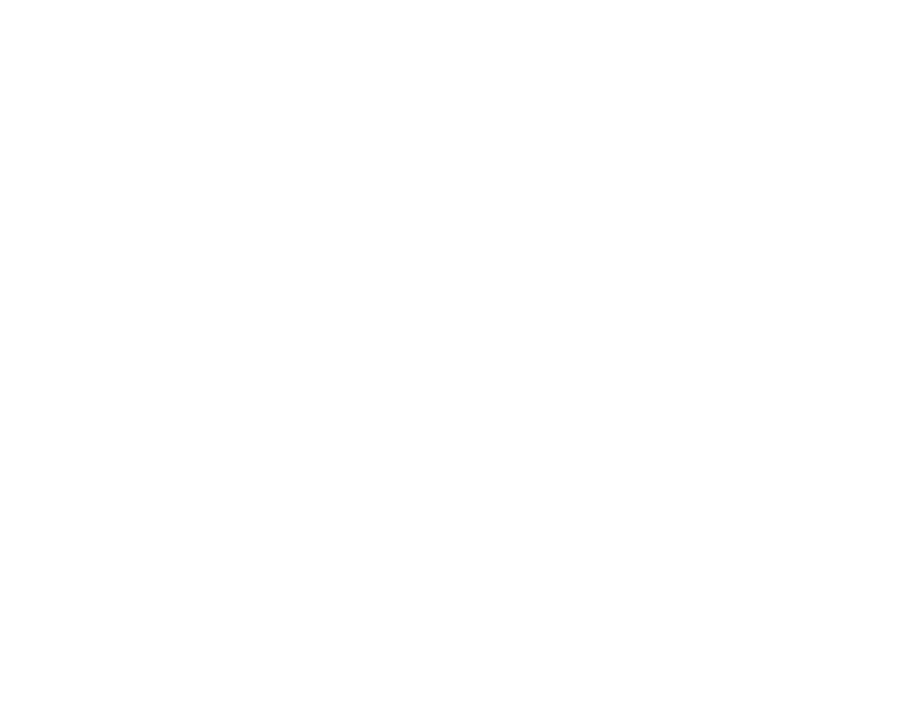

<IPython.core.display.Javascript object>


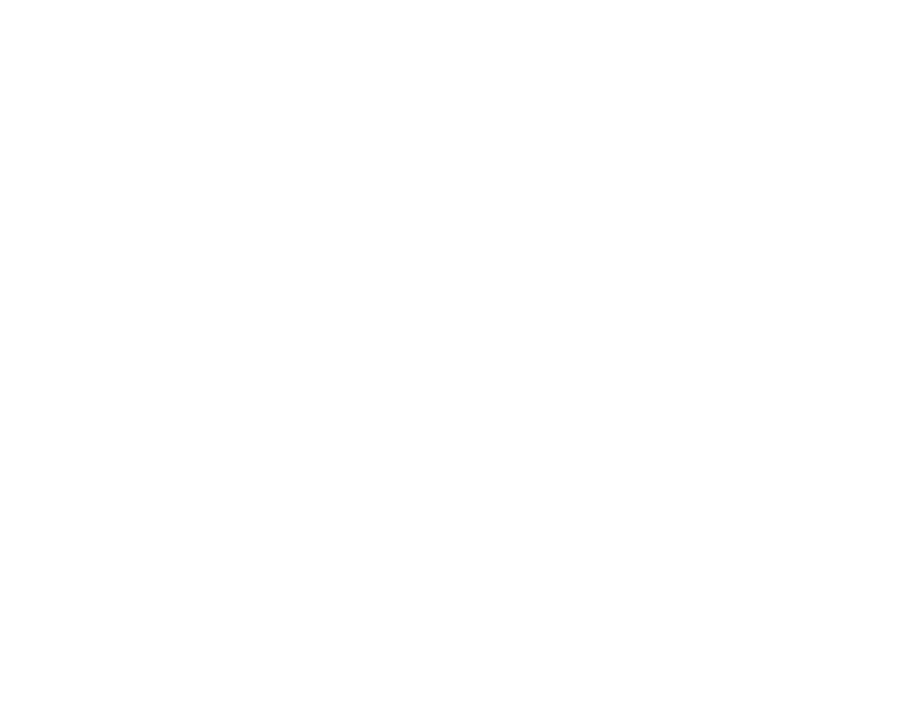

<IPython.core.display.Javascript object>


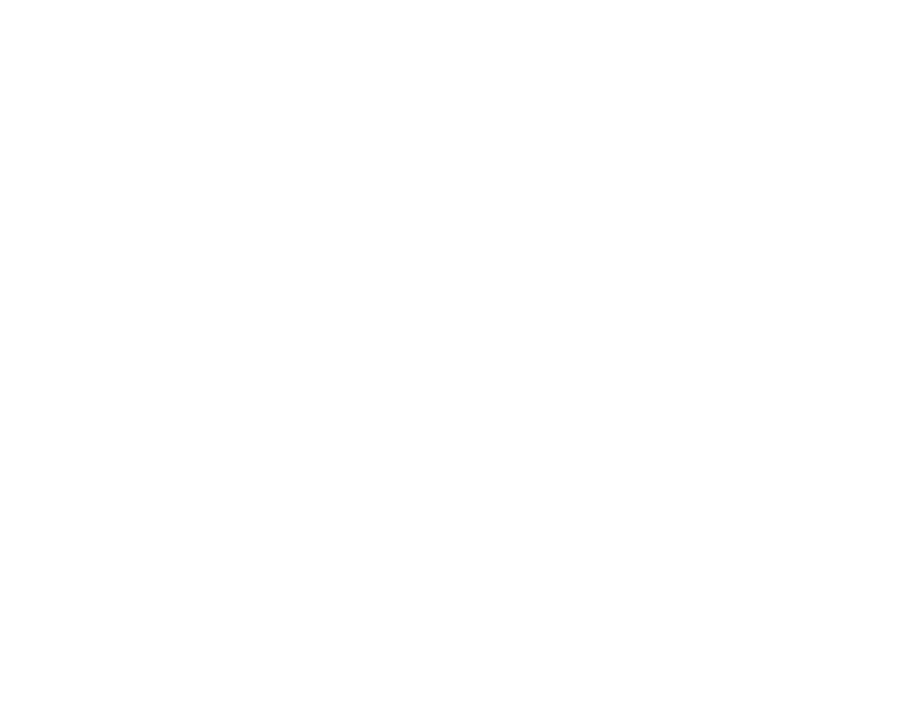

<IPython.core.display.Javascript object>


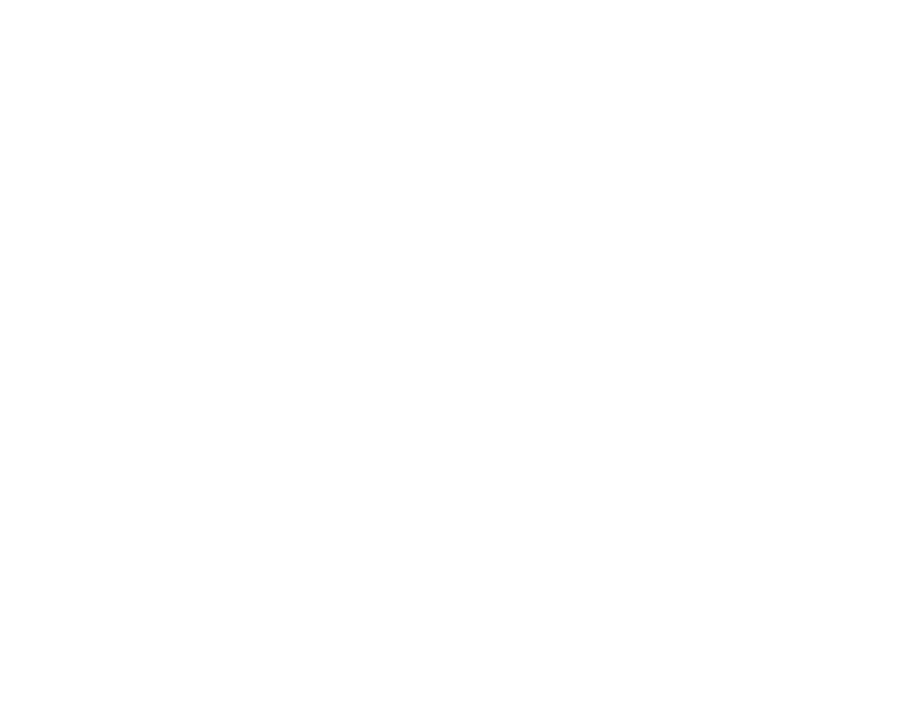

<IPython.core.display.Javascript object>


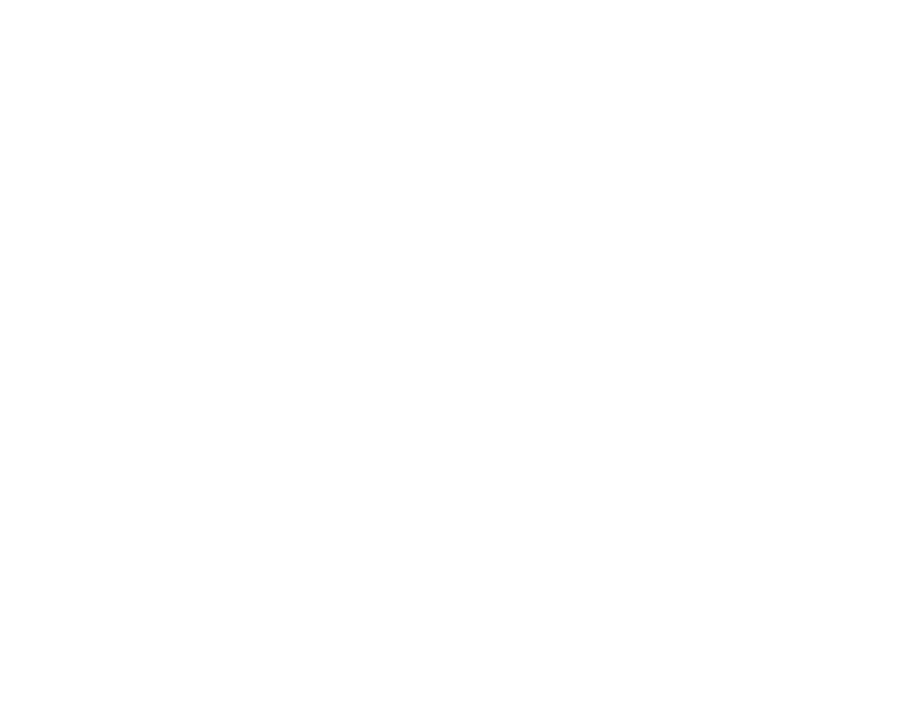

<IPython.core.display.Javascript object>


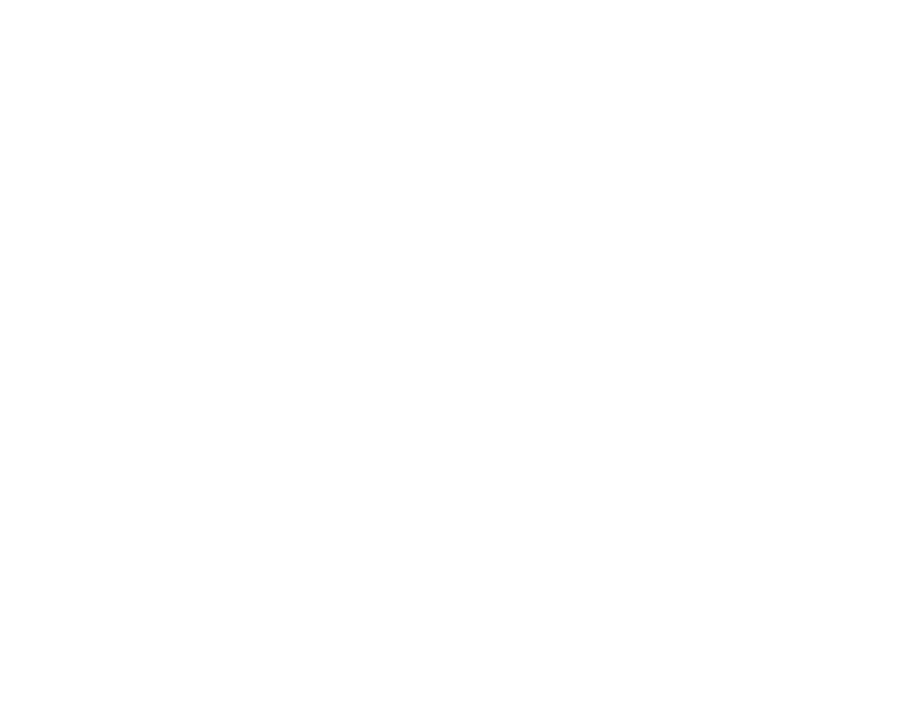

<IPython.core.display.Javascript object>


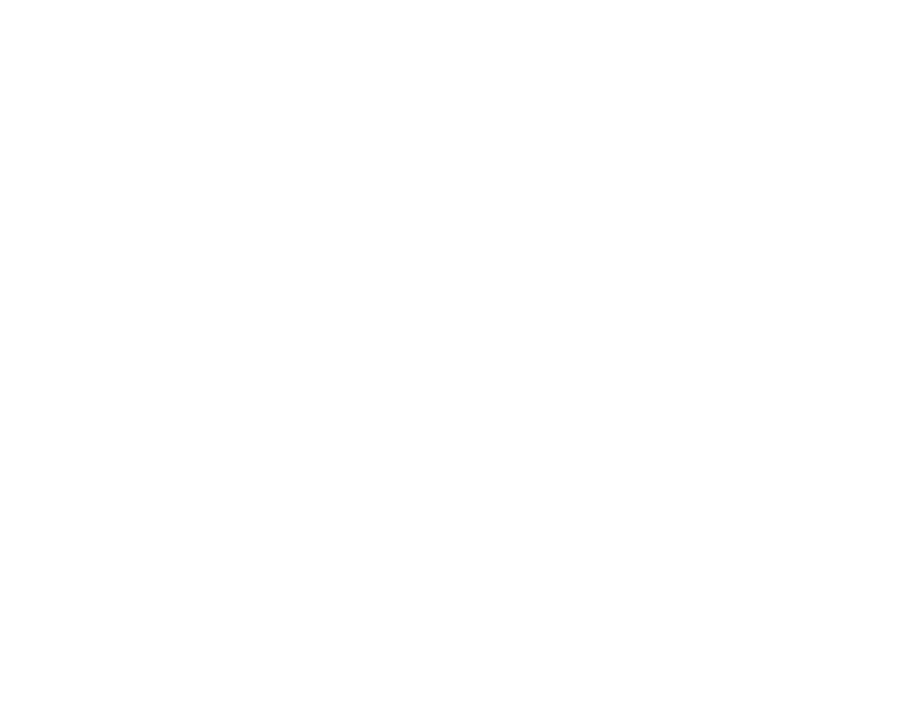

<IPython.core.display.Javascript object>


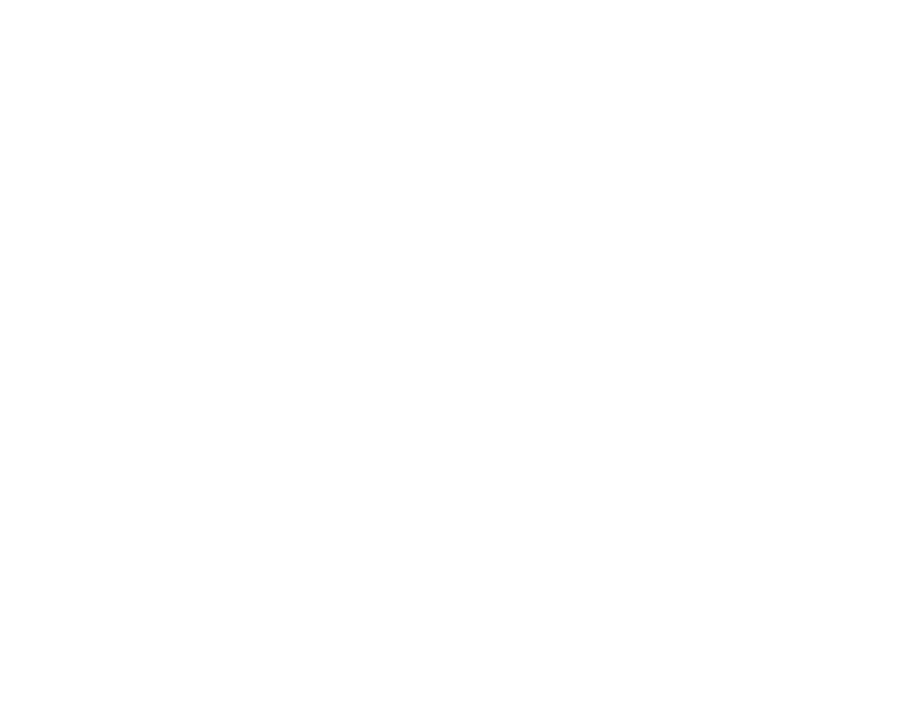

<IPython.core.display.Javascript object>


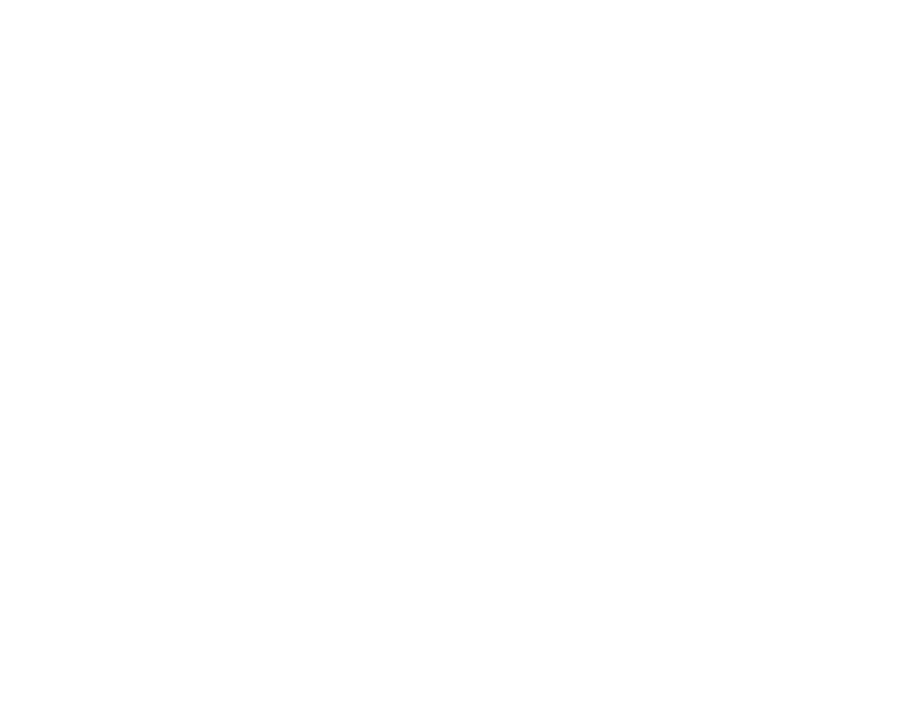

<IPython.core.display.Javascript object>


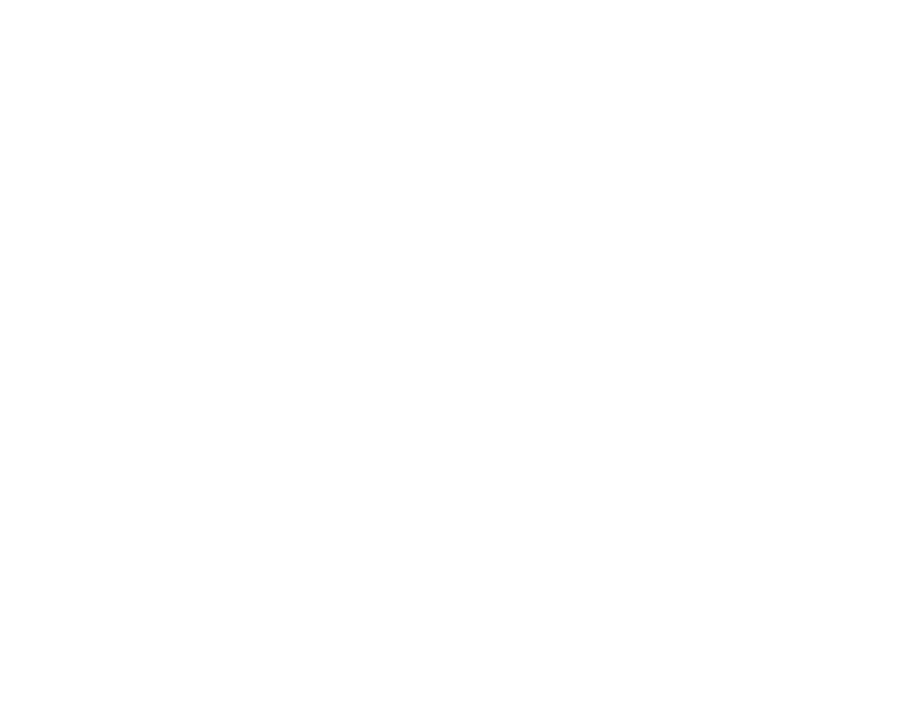

<IPython.core.display.Javascript object>


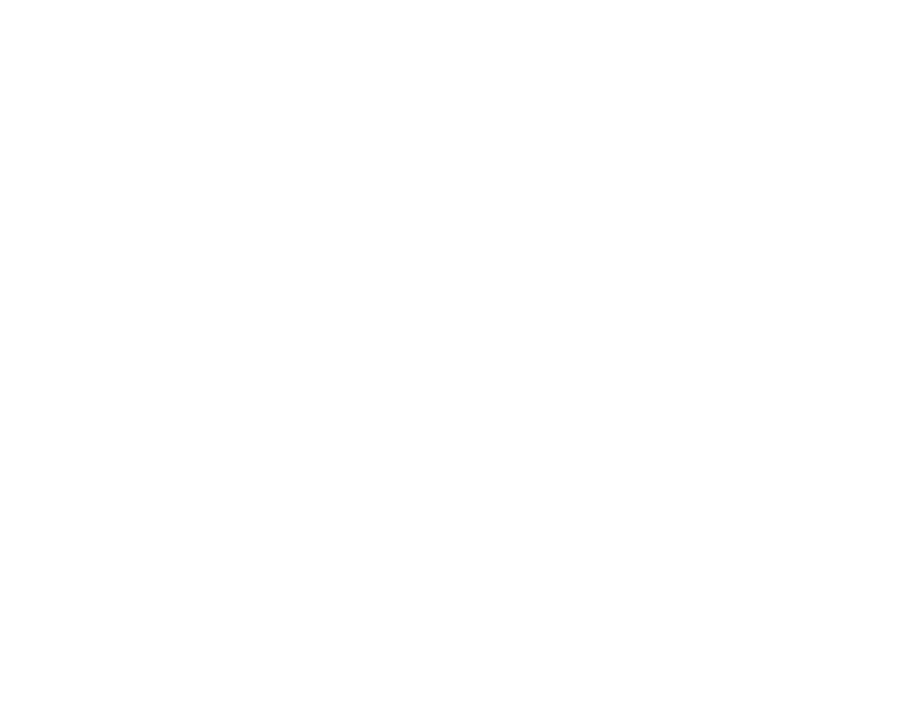

<IPython.core.display.Javascript object>


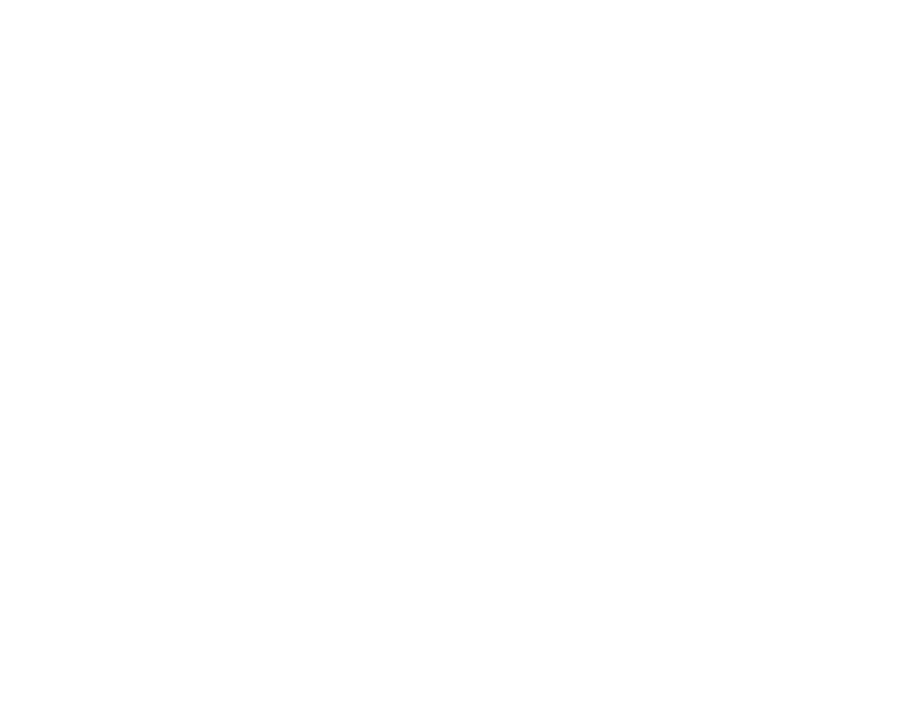

<IPython.core.display.Javascript object>


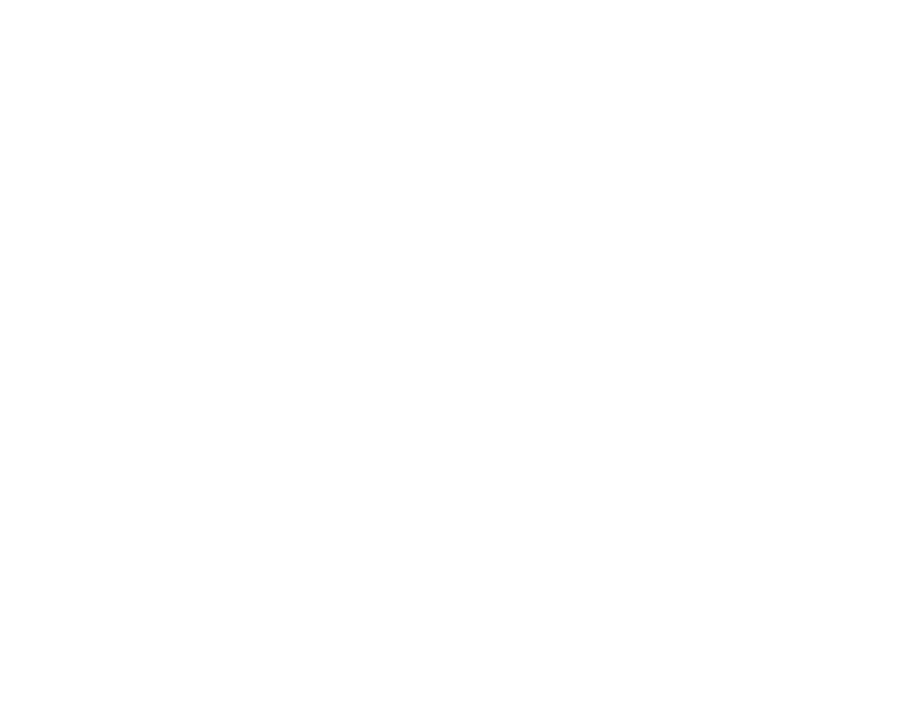

<IPython.core.display.Javascript object>


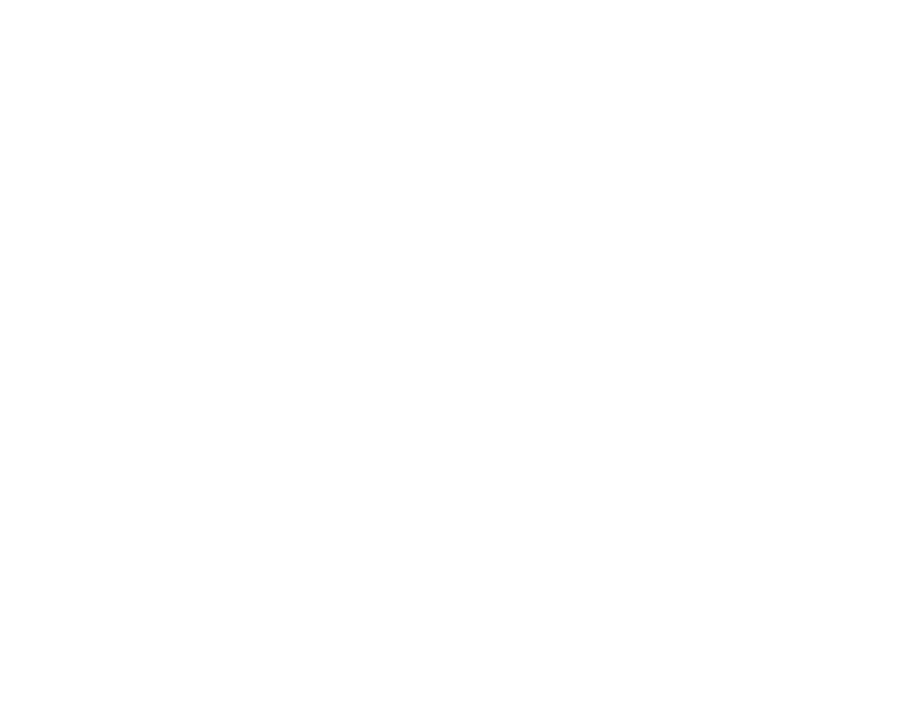

<IPython.core.display.Javascript object>


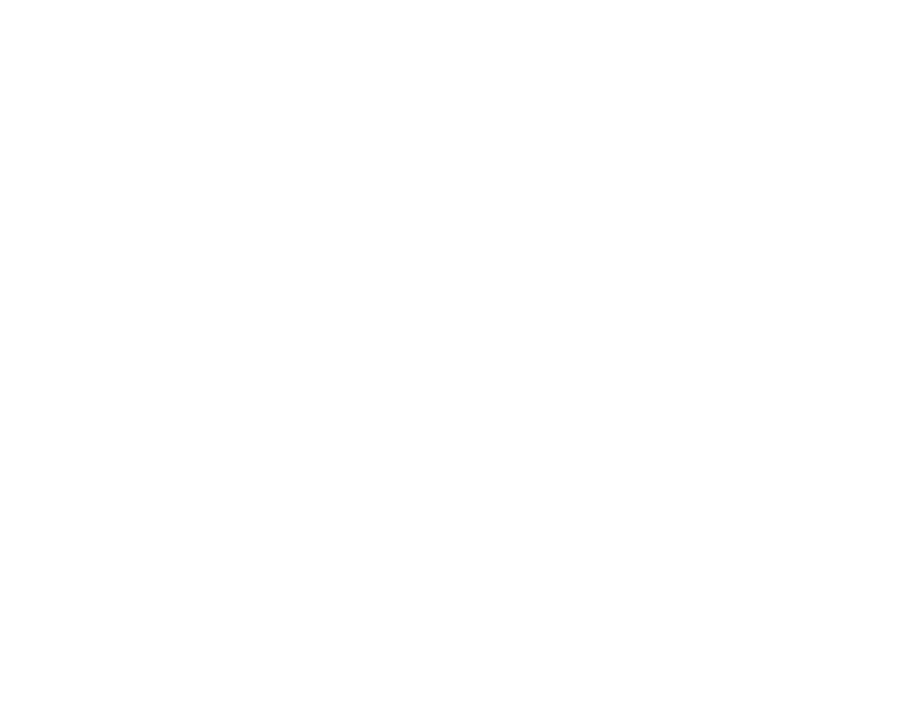

<IPython.core.display.Javascript object>


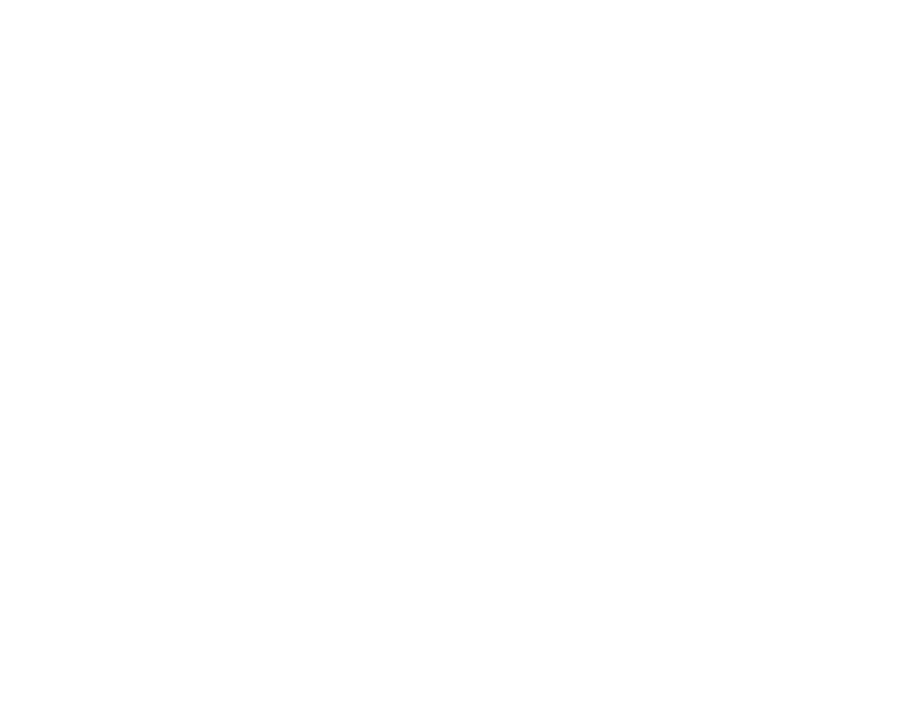

<IPython.core.display.Javascript object>


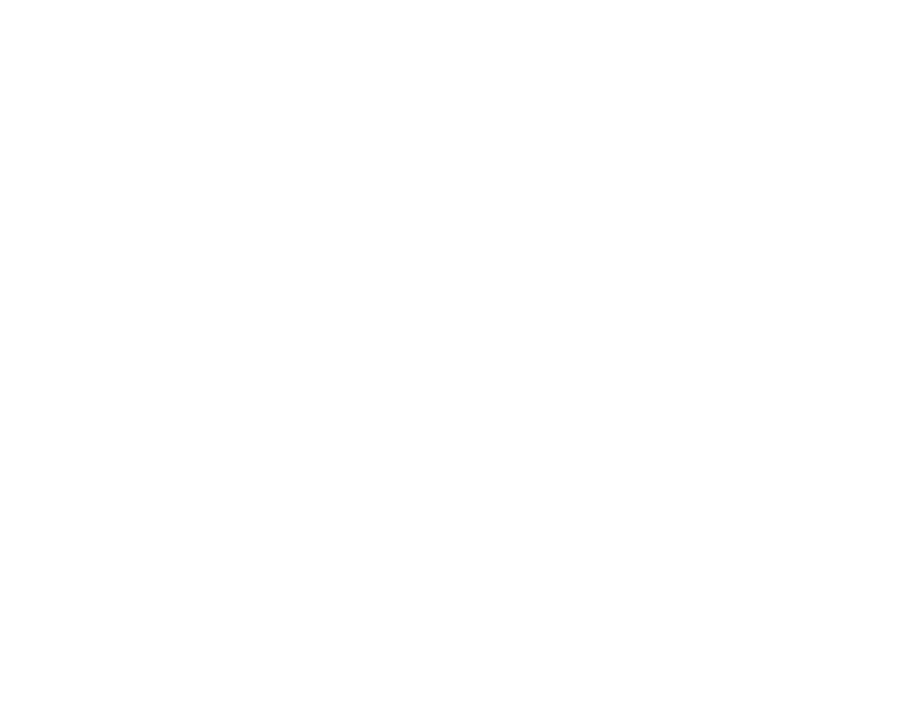

<IPython.core.display.Javascript object>


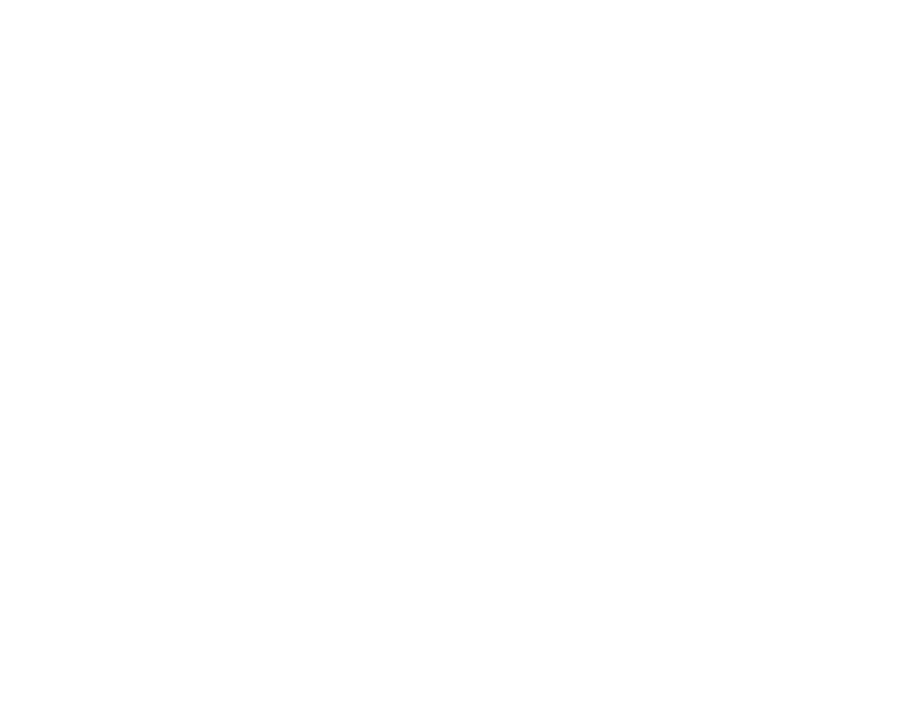

<IPython.core.display.Javascript object>


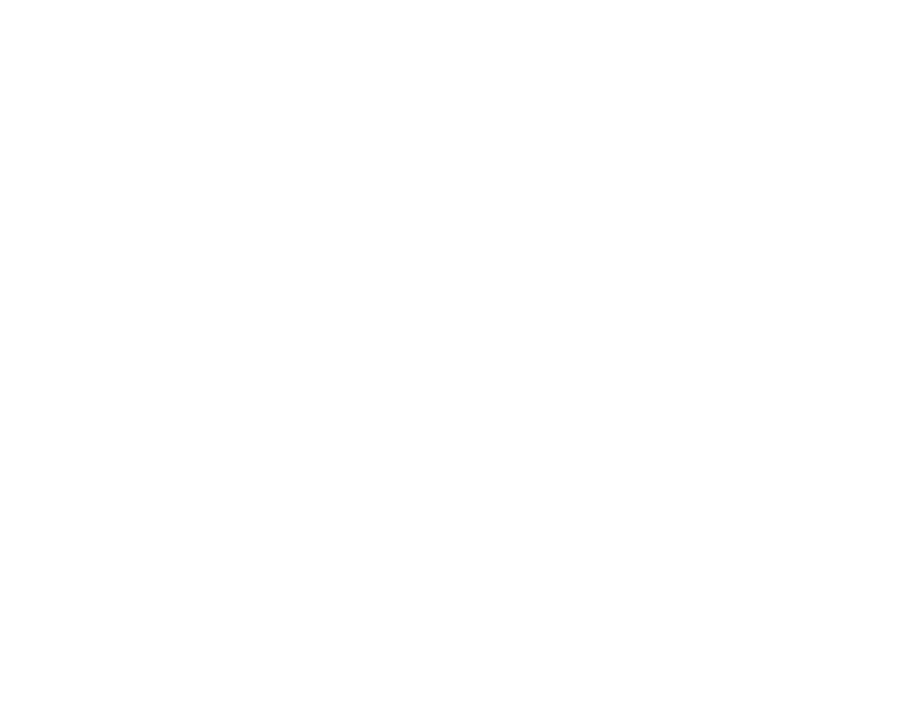

<IPython.core.display.Javascript object>


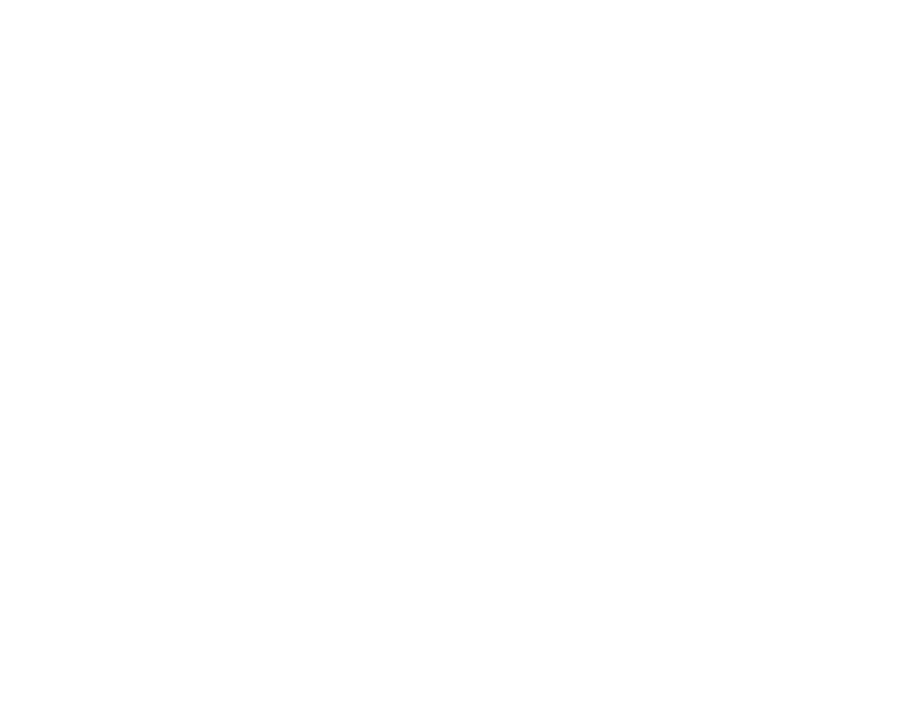

<IPython.core.display.Javascript object>


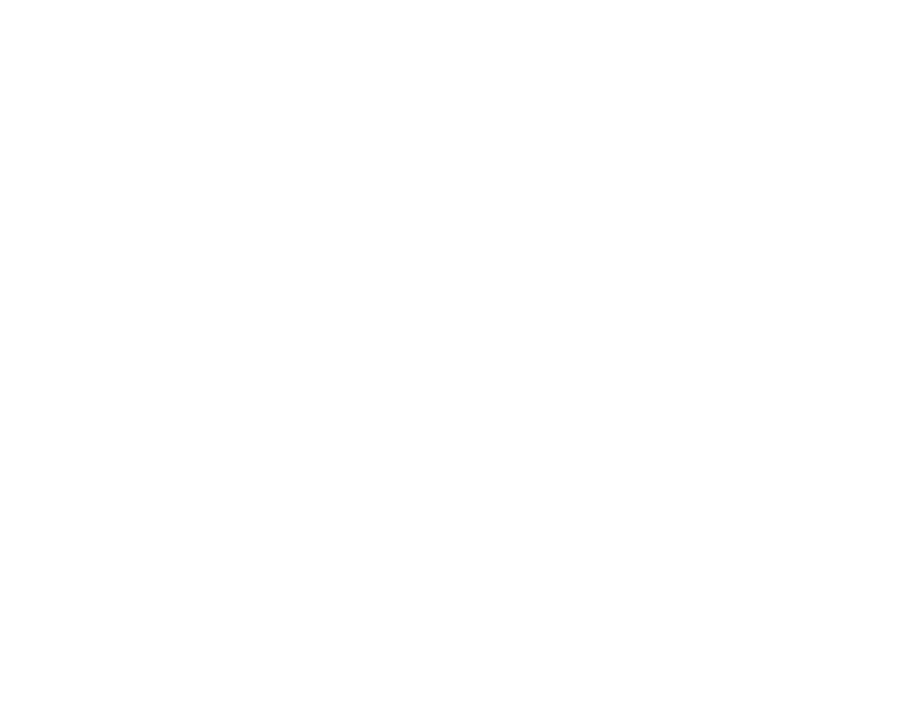

<IPython.core.display.Javascript object>


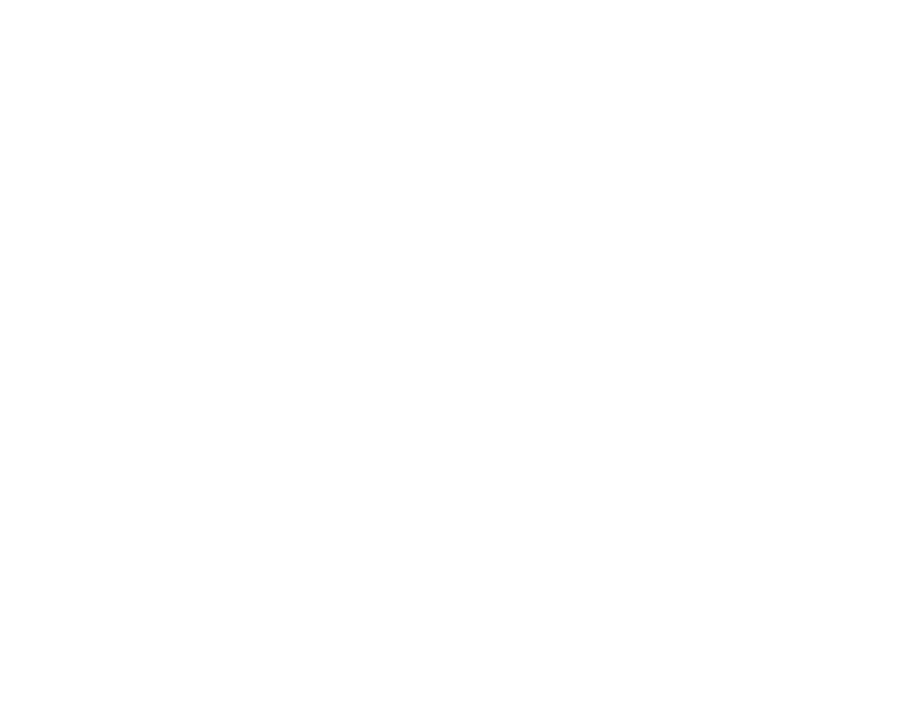

<IPython.core.display.Javascript object>


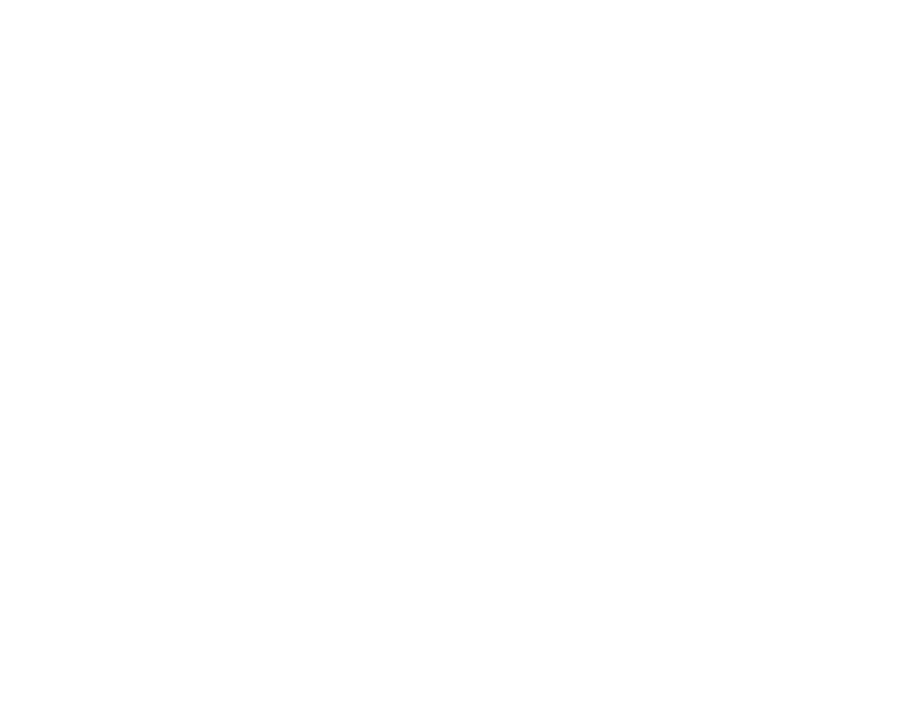

<IPython.core.display.Javascript object>


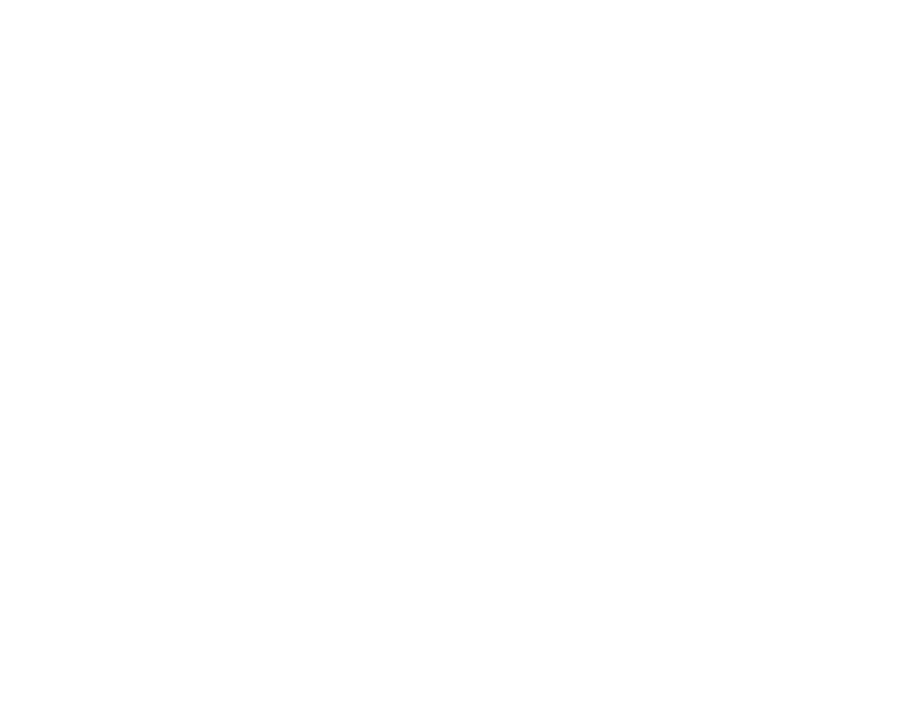

<IPython.core.display.Javascript object>


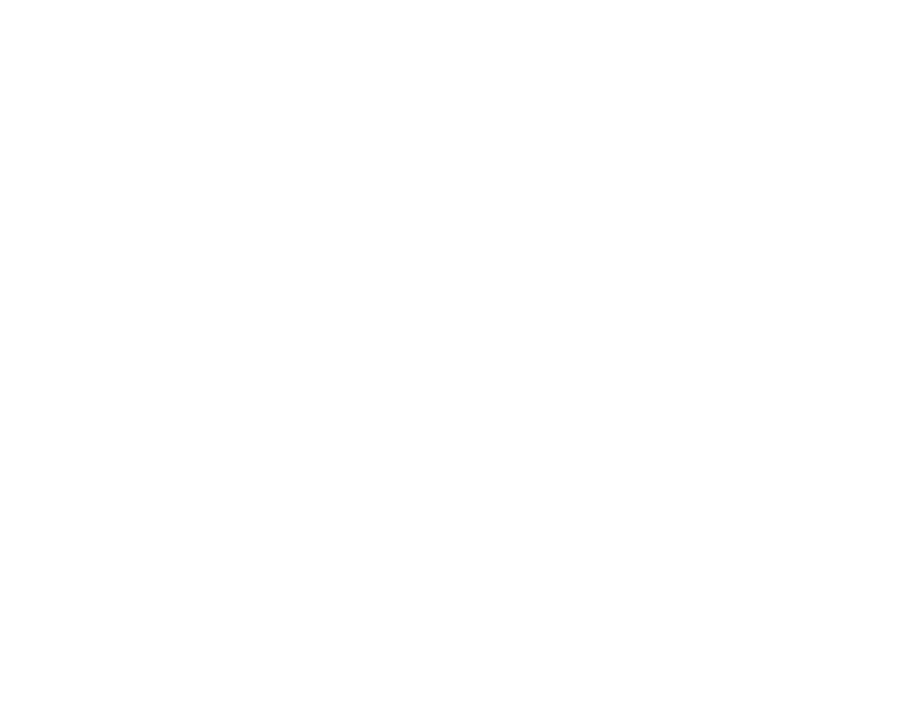

<IPython.core.display.Javascript object>


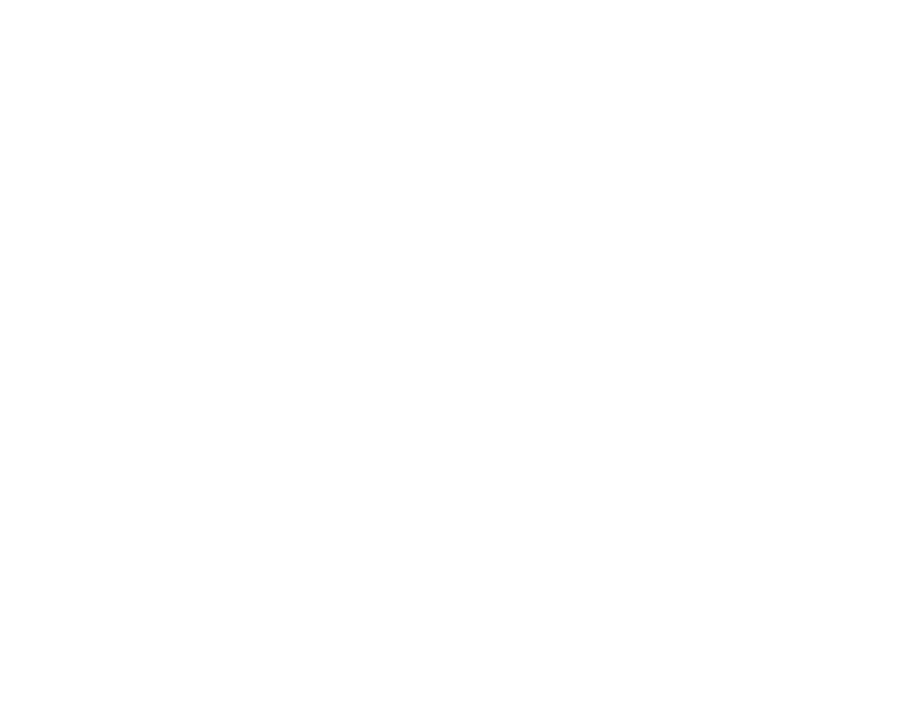

<IPython.core.display.Javascript object>


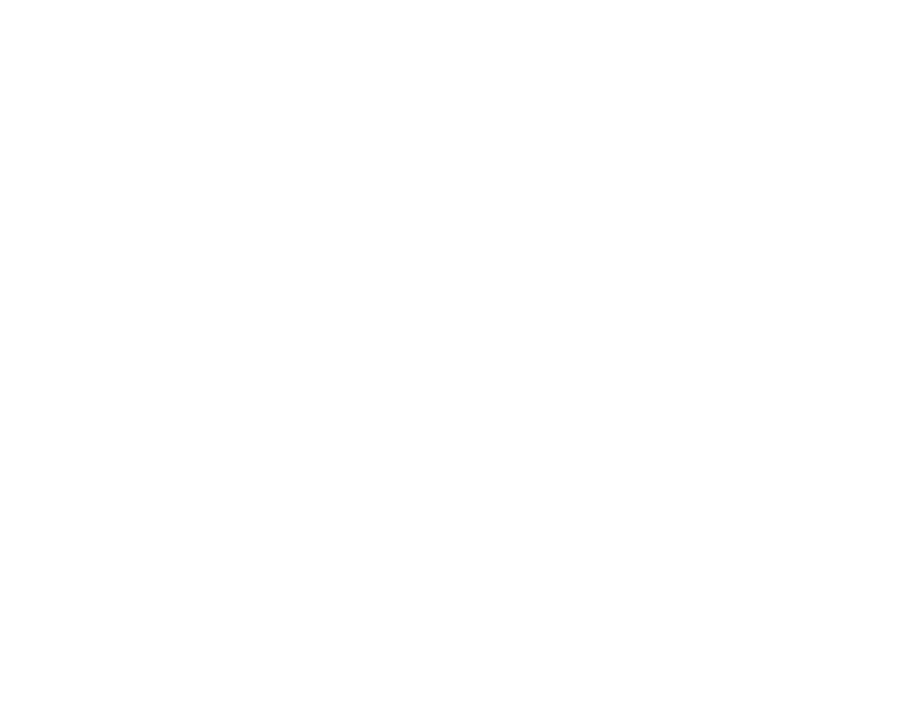

<IPython.core.display.Javascript object>


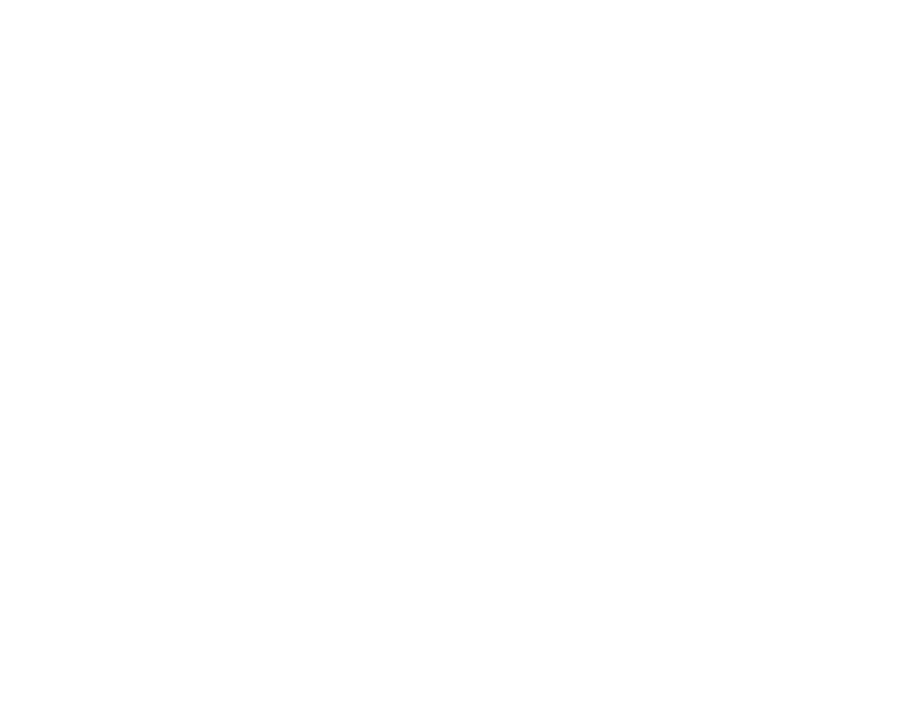

<IPython.core.display.Javascript object>


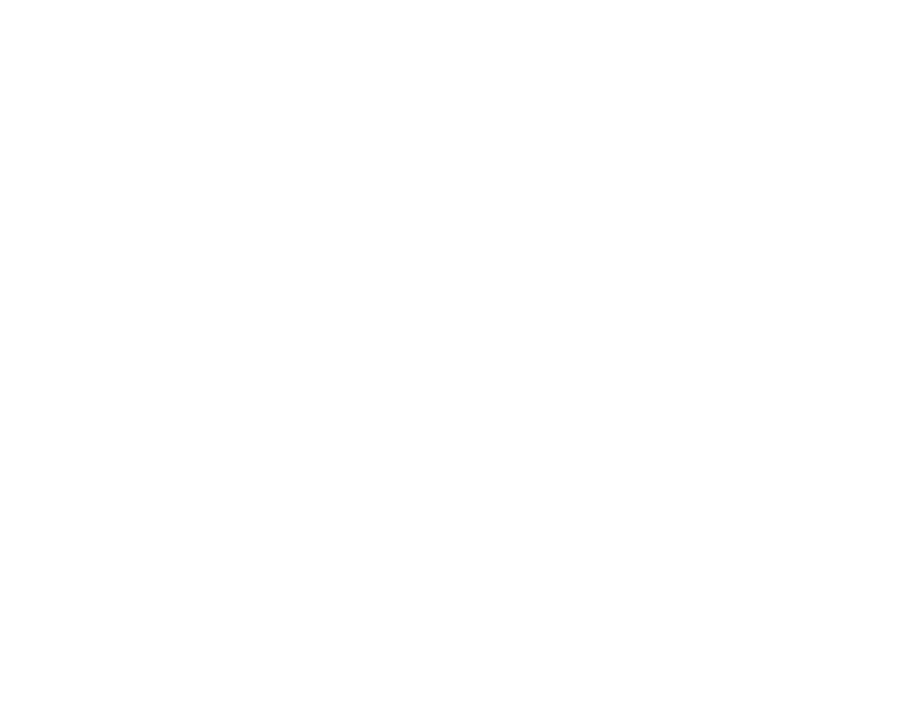

<IPython.core.display.Javascript object>


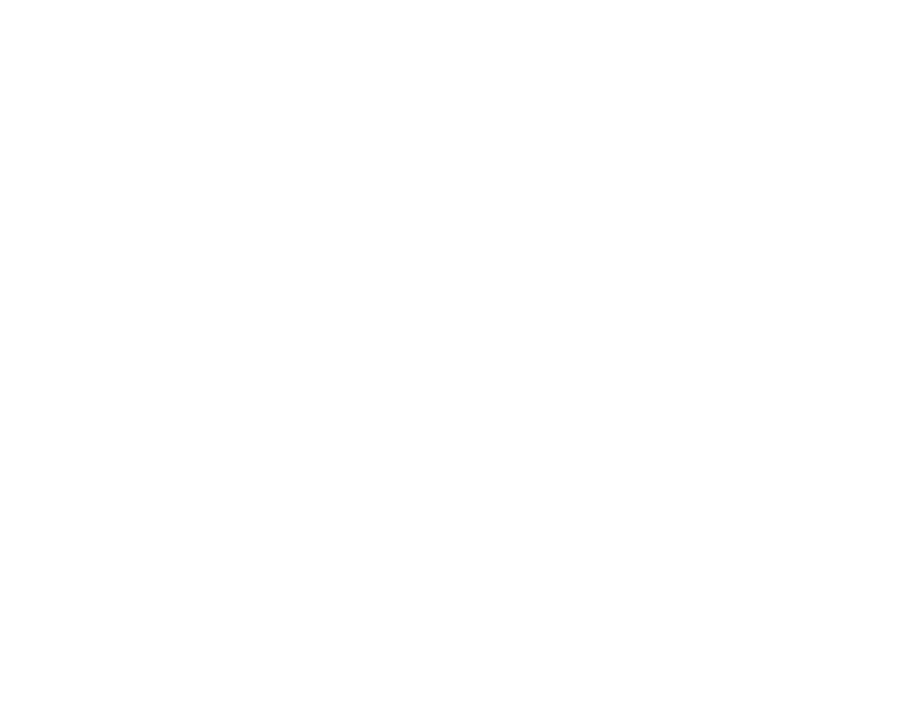

<IPython.core.display.Javascript object>


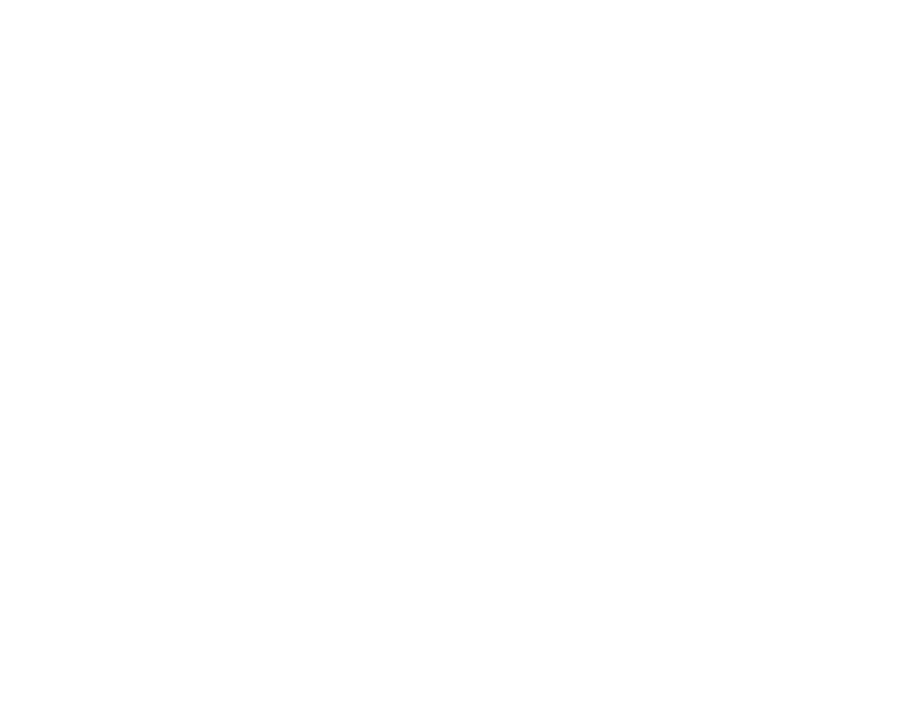

<IPython.core.display.Javascript object>


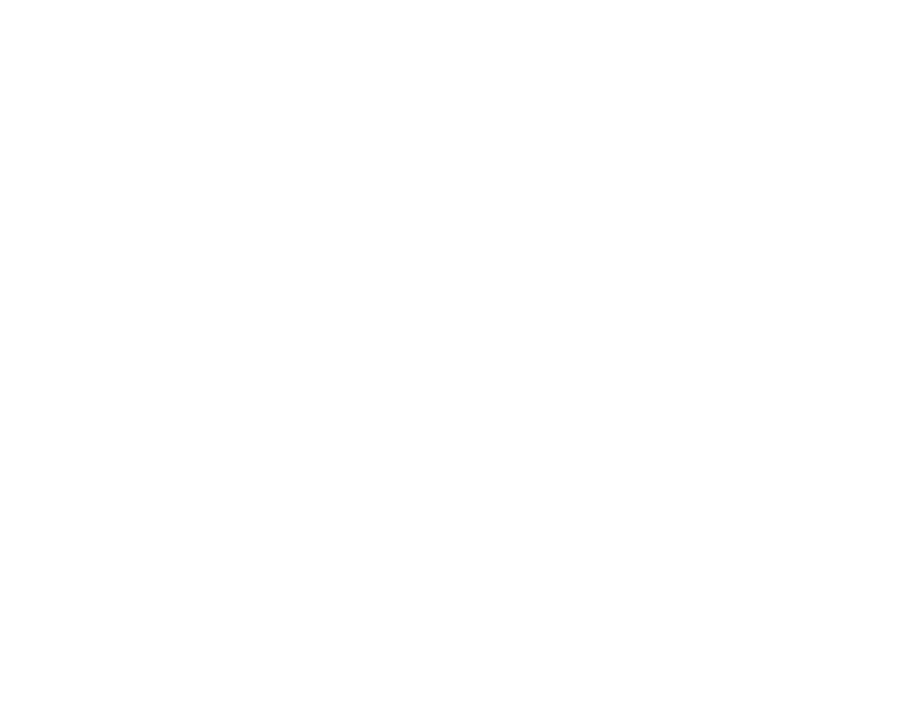

<IPython.core.display.Javascript object>


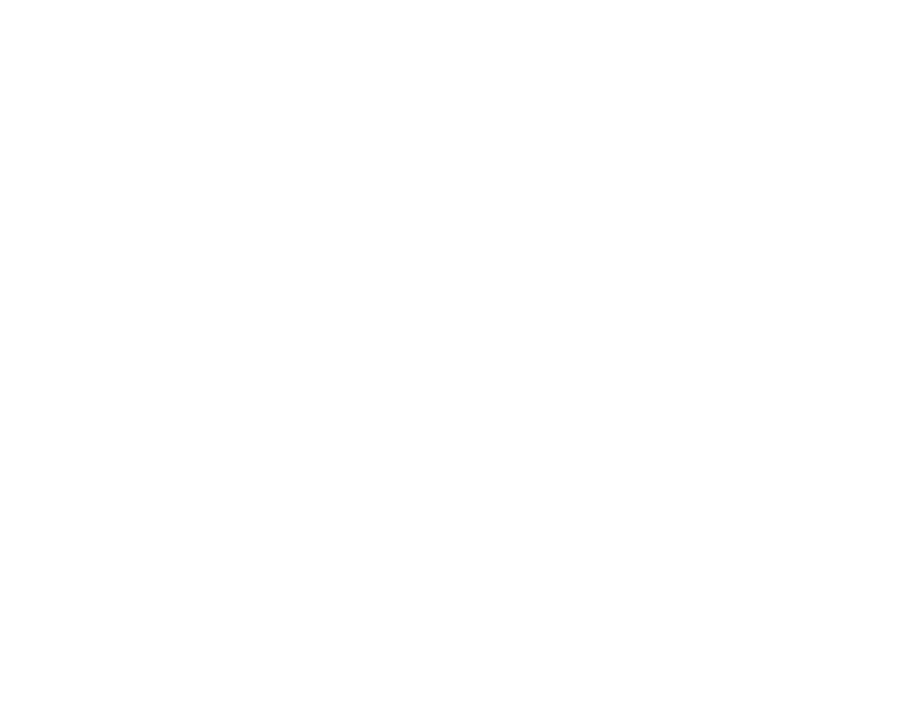

In [7]:
# =============================================================================
#                            GET ALL PEAK AREAS AND FWHM
# =============================================================================

mg_hf.set_thick_labels(11)

# Calculate energy distribution
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)
energies_he3_only_pileup = he3_energy.get_energies(he3[he3.pile_up == 1], DIST_OFFSET_HE3)

# Define peak locations (here we use the He-3 peak locations)
peaks = np.array([0.886, 1.030, 1.177, 1.321, 1.466, 1.610, 1.755, 1.900, 2.044, 2.188, 
                  2.333, 2.477, 2.622, 2.766, 2.911, 3.056, 3.200, 3.344, 3.489, 3.633,
                  3.778, 3.923, 4.068, 4.211, 4.356, 4.500, 4.645, 4.790, 4.934, 5.079,
                  5.223, 5.368, 5.513, 5.657, 5.801, 5.946, 6.090, 6.235, 6.379, 6.524,
                  6.669, 6.813, 6.958, 7.102, 7.246, 7.391, 7.536, 7.680, 7.825, 7.969])
peak_window = 0.25#0.06
small_peak_window = 0.15

# Declare plotting specifications
number_bins = 800
lower_y = 0
upper_y = 40e3

# Declare area integration limits, in units of sigma
peak_lower_limit = -30  # -16
peak_upper_limit = 60   #   4 
background_lower_limit = -30
background_upper_limit = -25
number_sigma = 3

small_peak_lower_limit = -1
small_peak_upper_limit = 1

# Prepare data for iteration
energies_vec = [energies_nr, energies_he3]
label_vec = ['Multi-Grid detector', 'Helium-3 tube']
colors = ['blue', 'red']

# Declare data vectors where the peak areas will be saved
peak_areas = [[], []]
peak_widths = [[], []]
peak_centers = [[], []]

width_uncs = [[], []]
area_uncs = [[], []]

small_peak_areas = [[], []]

peak_pileup_fractions = []

# Iterate through all peaks
for peak in peaks[2:40]:
    #fig.suptitle('Peak @ %.3f meV (%.3f Å)' % (mg_hf.A_to_meV(peak), peak))
    for i, (energies, color, label) in enumerate(zip(energies_vec, colors, label_vec)):
        # Plot data
        fig = plt.figure()
        fig.set_figheight(4)
        fig.set_figwidth(5)
        #plt.subplot(1, 2, i+1)
        hist, bins = mg_advanced_plot.energy_plot(energies, number_bins, label,
                                                  start=peak-peak_window/2, stop=peak+peak_window/2,
                                                  color='black')
        
        # Get fit parameter guesses
        a_guess, x0_guess, sigma_guess = mg_hf.get_fit_parameters_guesses(hist, bins)
        # Define fit region based on these guesses, ± number_sigma sigma
        left_fit, right_fit = (x0_guess - (number_sigma * sigma_guess)), (x0_guess + (number_sigma * sigma_guess))
        hist_fit, bins_fit = mg_hf.get_hist(energies, number_bins, left_fit, right_fit)
        
        # Fit data and plot fit
        a, x0, sigma, x_fit, y_fit, perr = mg_hf.fit_data(hist_fit, bins_fit, a_guess, x0_guess, sigma_guess)
        plt.plot(x_fit, y_fit*(max(hist)/max(y_fit)), label='Gaussian fit', color='black', linestyle='dotted')
        
        # Get peak area
        bin_width = bins[1] - bins[0]
        peak_area, area_unc, b_level = mg_hf.get_peak_area(energies, x0, sigma, bin_width,
                                                           peak_lower_limit, peak_upper_limit,
                                                           background_lower_limit, background_upper_limit)
        
        small_peak_area, __, __ = mg_hf.get_peak_area(energies, x0, sigma, bin_width,
                                                      small_peak_lower_limit, small_peak_upper_limit,
                                                      background_lower_limit, background_upper_limit)
        # Plot background level
        plt.axhline(y=b_level, color='black', linestyle='--', linewidth=2, label='Background\nestimation')
        
        # Get resolution
        peak_width = 2 * np.sqrt(2*np.log(2)) * sigma
        width_unc = perr[2]
        
        # Plot borders
        plt.axvline(x=x0 + peak_lower_limit*sigma, color='blue', linewidth=1,
                    label='Wide interval,\n[%dσ, %dσ]' % (peak_lower_limit, peak_upper_limit))
        plt.axvline(x=x0 + peak_upper_limit*sigma, color='blue', linewidth=1,
                    label=None#'Peak border: %d σ' % peak_upper_limit
                    )
        plt.axvline(x=x0 + small_peak_lower_limit*sigma, color='red', linewidth=1,
                    label='Narrow interval,\n[%dσ, %dσ]' % (small_peak_lower_limit, small_peak_upper_limit))
        plt.axvline(x=x0 + small_peak_upper_limit*sigma, color='red', linewidth=1,
                    label=None#'Peak border: %d σ' % peak_upper_limit
                    )
        #plt.axvline(x=x0 + background_lower_limit*sigma, color='orange', linewidth=2,
        #            label='Background border: %d σ' % background_lower_limit)
        #plt.axvline(x=x0 + background_upper_limit*sigma, color='orange', linewidth=2,
        #            label='Background border: %d σ' % background_upper_limit)
        
        # Stylize plot
        plt.title('%s, %.1f Å' % (label, peak))
        plt.ylabel('Counts')
        plt.xscale('linear')
        plt.yscale('log')
        plt.legend(loc=1)
        plt.xlim(mg_hf.A_to_meV(peak+(small_peak_window-0.05)/2), mg_hf.A_to_meV(peak-small_peak_window/2))
        plt.ylim(min(hist)/1.5, max(hist)*1.5)
        plt.ylim(3e1, 2e5)
        
        
        # Store peak area and resolution
        peak_areas[i].append(peak_area)
        peak_widths[i].append(peak_width)
        peak_centers[i].append(mg_hf.meV_to_A(x0))
        area_uncs[i].append(area_unc)
        width_uncs[i].append(width_unc)
        
        small_peak_areas[i].append(small_peak_area)
        
        # Save data
        output_path = '../output/%s_peak_at_%.2f_Å_%.2f_meV.pdf' % (label, peak, mg_hf.A_to_meV(peak))
        fig.savefig(output_path, bbox_inches='tight')
        plt.close()
        
    # ONLY FOR HELIUM-3 TUBE: Calculated pile-up fraction
    peak_area_pileup, __, __ = mg_hf.get_peak_area(energies_he3_only_pileup, x0, sigma, bin_width,
                                                   peak_lower_limit, peak_upper_limit,
                                                   background_lower_limit, background_upper_limit)
    peak_pileup_fractions.append(peak_area_pileup/peak_area) 
    


# Save peak areas
mg_peak_areas = np.array(peak_areas[0])
he3_peak_areas = np.array(peak_areas[1])

mg_small_peak_areas = np.array(small_peak_areas[0])
he3_small_peak_areas = np.array(small_peak_areas[1])

# Save peak widths
mg_peak_widths = np.array(peak_widths[0])
he3_peak_widths = np.array(peak_widths[1])

# Save peak centers
mg_peak_centers = np.array(peak_centers[0])
he3_peak_centers = np.array(peak_centers[1])

# Save uncertainties
mg_area_unc = np.array(area_uncs[0])
he3_area_unc = np.array(area_uncs[1])
mg_width_unc = np.array(width_uncs[0])
he3_width_unc = np.array(width_uncs[1])

# Save peak pile up fractions
peak_pileup_fractions = np.array(peak_pileup_fractions)

###### 4.2.3 Efficiency calculation

<IPython.core.display.Javascript object>


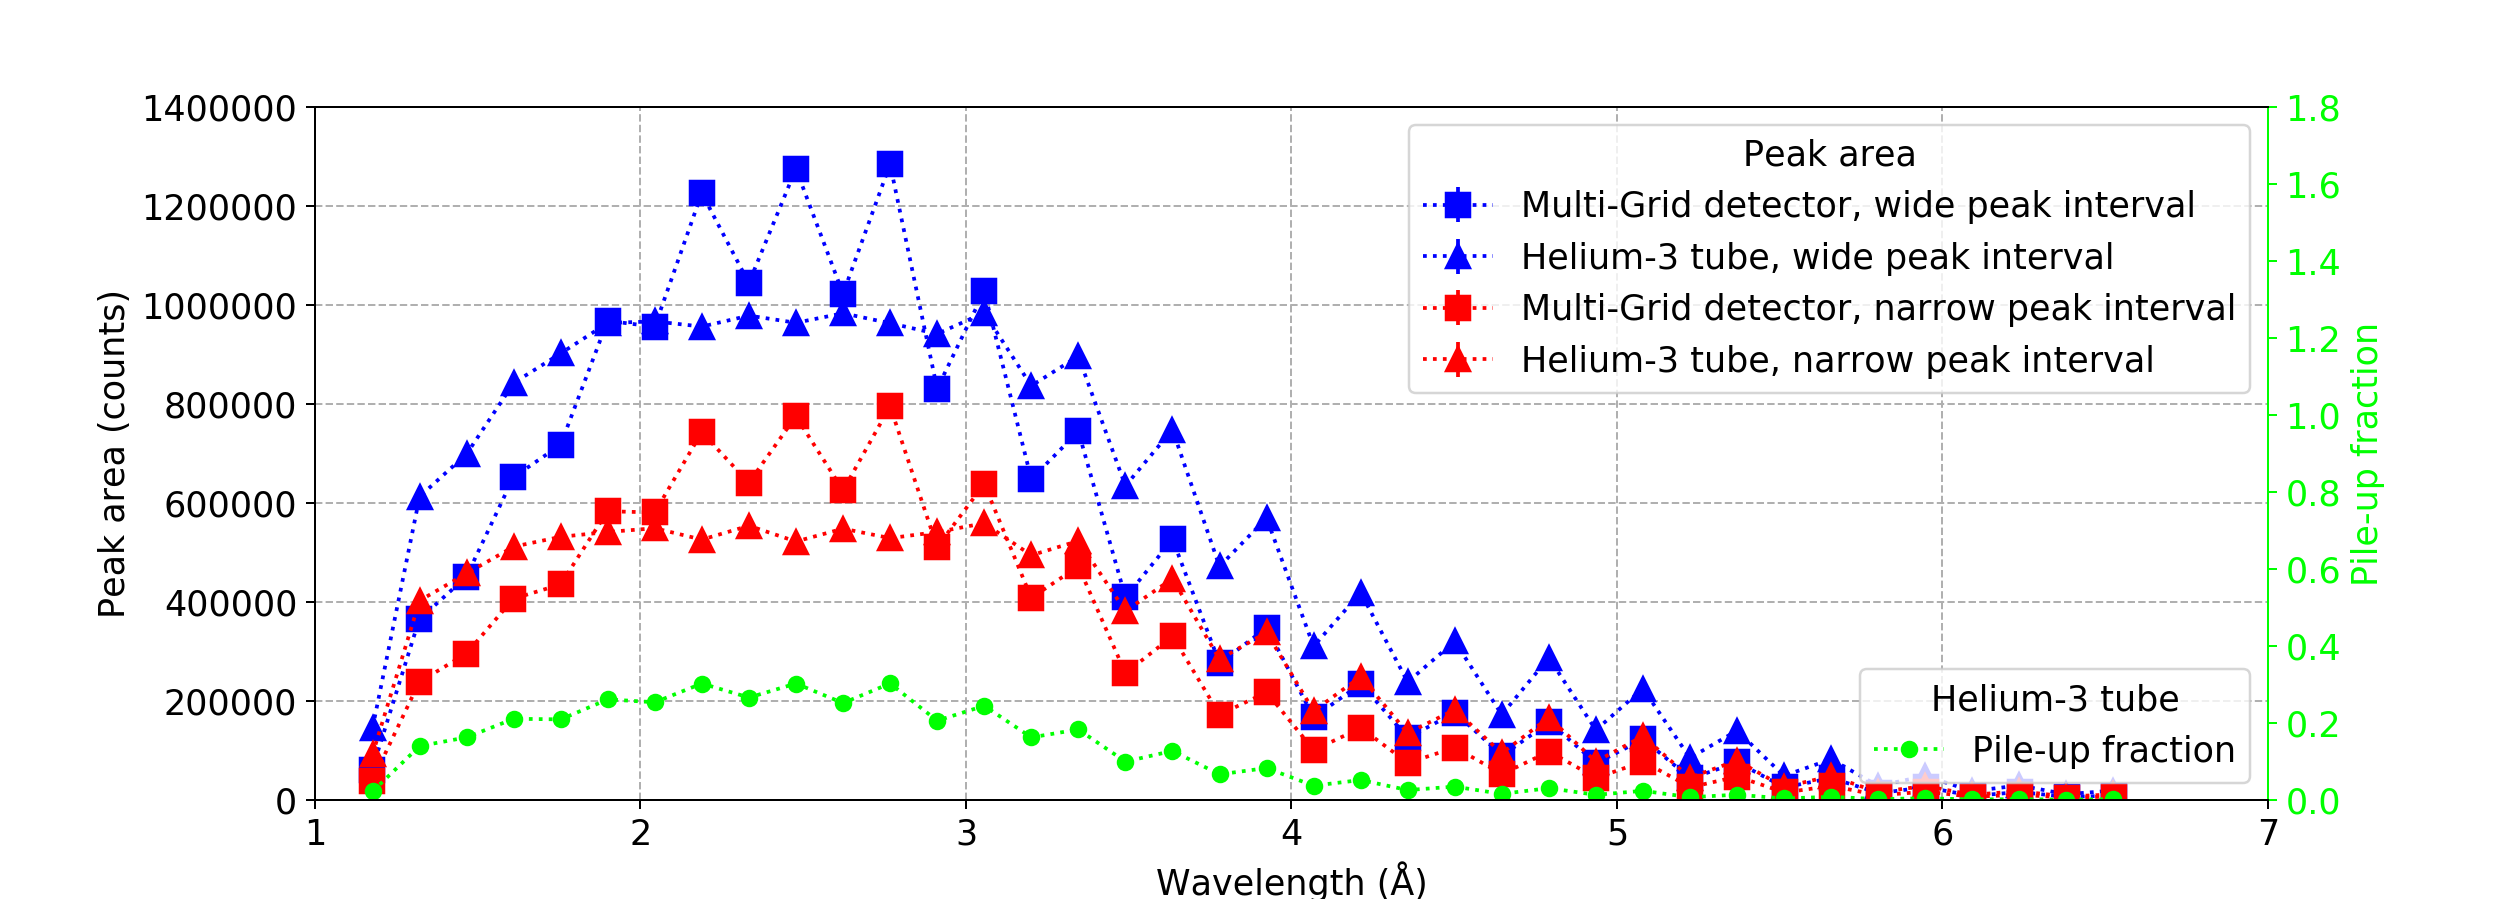

<IPython.core.display.Javascript object>


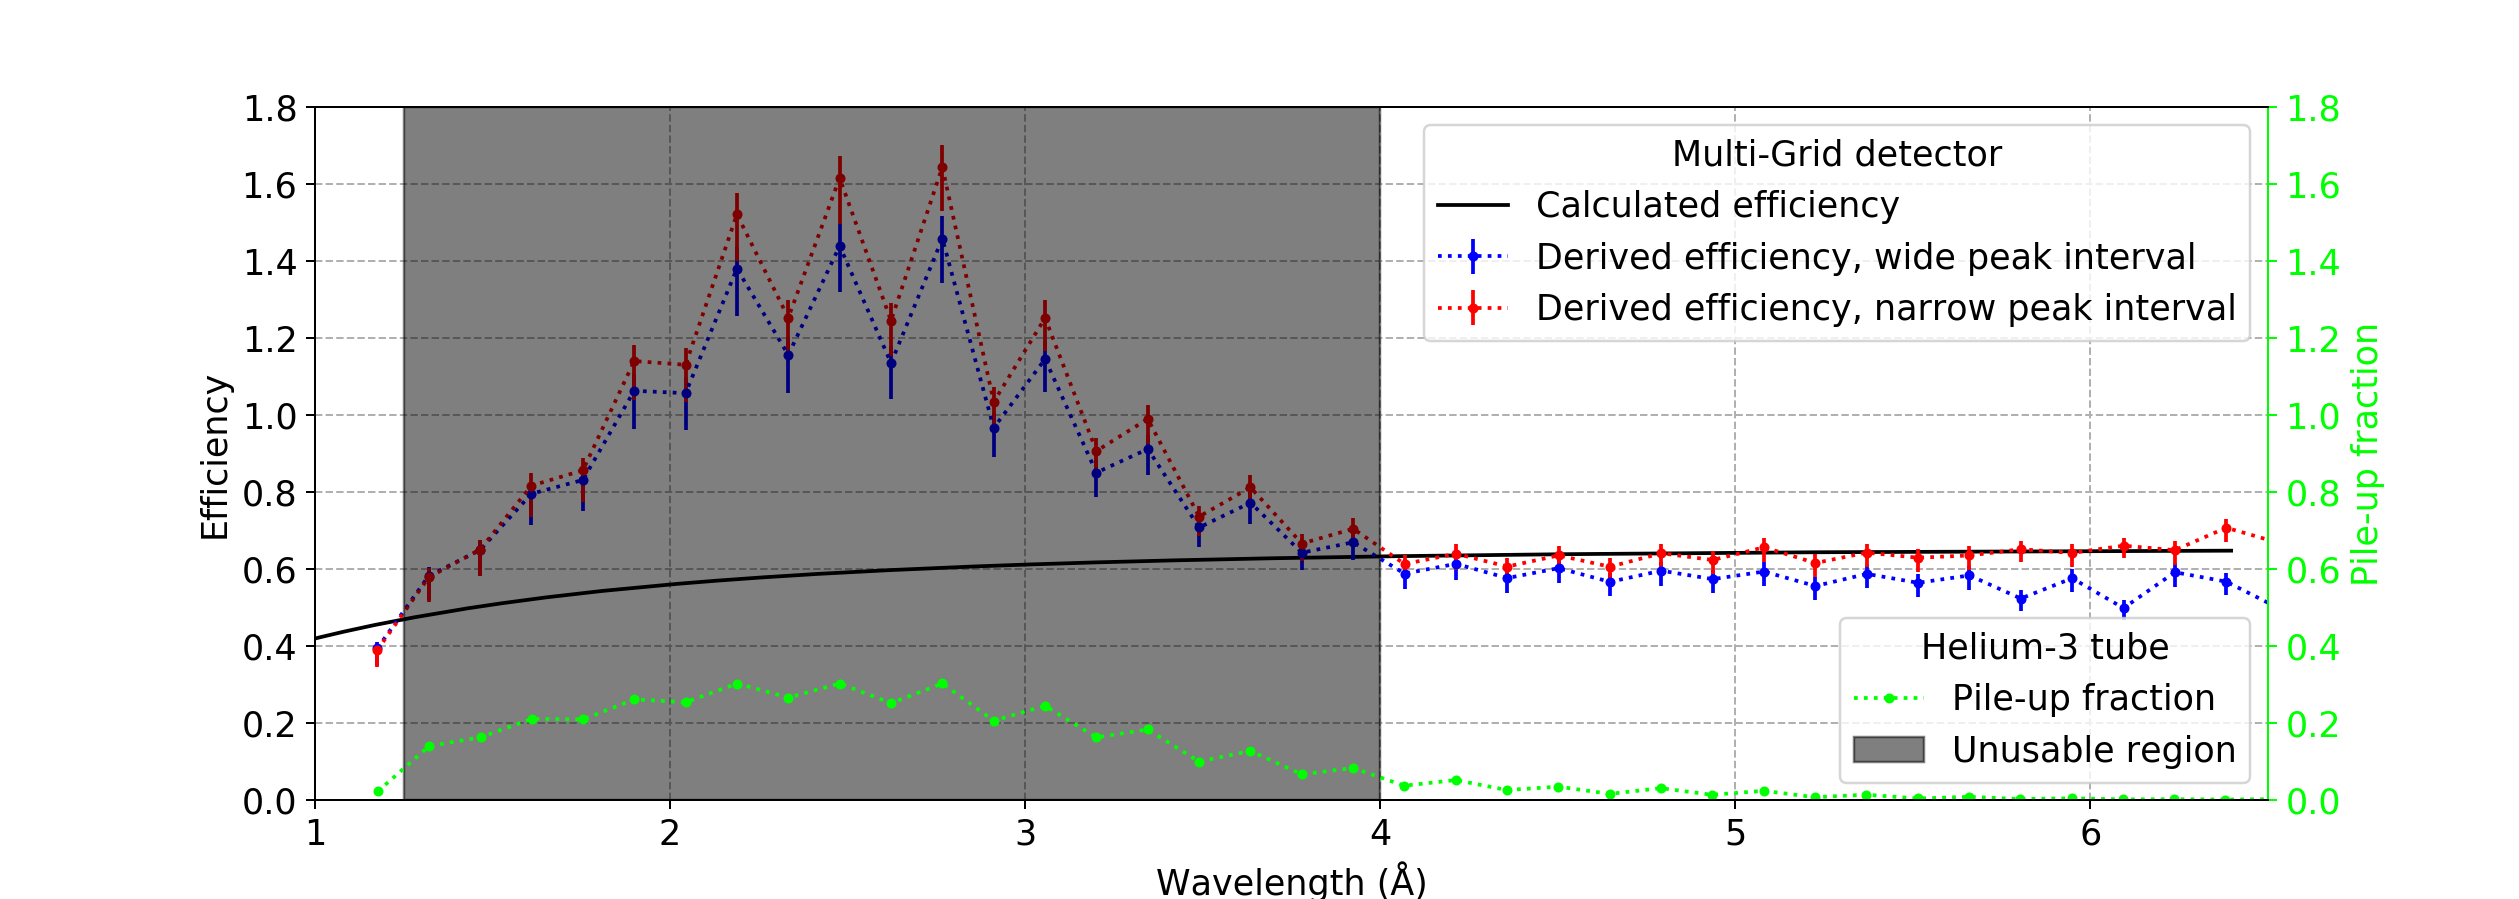

[1.17530875 1.3202036  1.46501045 1.60962645 1.75432292 1.89894745
 2.043627   2.18822752 2.33288518 2.47747293 2.62219241 2.76672883
 2.9113514  3.05606448 3.20061988 3.34523752 3.48990228 3.63453146
 3.779153   3.92378212 4.06839211 4.21316198 4.35763943 4.5023468
 4.64699396 4.7916925  4.93618485 5.08083698 5.22537934 5.37009192
 5.51463064 5.65934042 5.8038638  5.94858257 6.09312066 6.23782893
 6.3823828  6.52712511]
[0.39354287 0.58214884 0.64936356 0.79540989 0.83123634 1.06289016
 1.05674502 1.38031948 1.15597787 1.43916158 1.13500735 1.45826419
 0.96653091 1.1452046  0.85039906 0.91162083 0.70787242 0.77216024
 0.64240536 0.66938306 0.58799621 0.61342867 0.57648758 0.60222288
 0.56660416 0.59560208 0.57366043 0.59340343 0.55575548 0.58726544
 0.56419808 0.58336695 0.52335427 0.57598194 0.49845272 0.59160737
 0.56720271 0.49964164]
[0.02242328 0.14008075 0.16275581 0.21097931 0.20942779 0.26136147
 0.25388371 0.30259366 0.26607457 0.30253802 0.25173173 0.30268803
 0.20594916 0.2

In [11]:
mg_hf.set_thick_labels(14)

# Calculate new Helium-3 area based on pile-up
he3_peak_areas_scaled = he3_peak_areas + he3_peak_areas * peak_pileup_fractions * 2

# Plot peak area
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.grid(True, which='major', linestyle='--', zorder=0)
ax1.grid(True, which='minor', linestyle='--', zorder=0)
ax1.errorbar(mg_peak_centers, mg_peak_areas, mg_area_unc, color='blue', marker='s',
             label='Multi-Grid detector, wide peak interval', zorder=5, linestyle='dotted', markersize=10)
ax1.errorbar(he3_peak_centers, he3_peak_areas, he3_area_unc, color='blue', marker='^',
             label='Helium-3 tube, wide peak interval', zorder=5, linestyle='dotted', markersize=10)

ax1.errorbar(mg_peak_centers, mg_small_peak_areas, mg_area_unc, color='red', marker='s',
             label='Multi-Grid detector, narrow peak interval', zorder=5, linestyle='dotted', markersize=10)
ax1.errorbar(he3_peak_centers, he3_small_peak_areas, he3_area_unc, color='red', marker='^',
             label='Helium-3 tube, narrow peak interval', zorder=5, linestyle='dotted', markersize=10)
#plt.errorbar(he3_peak_centers, he3_peak_areas_scaled, he3_area_unc, color='green', marker='.',
#             label='Helium-3 tube (scaled)', zorder=5)
ax1.legend(title='Peak area')
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel('Peak area (counts)')

ax2.plot(he3_peak_centers, peak_pileup_fractions, color='lime', marker='o',
         linestyle='dotted',
         label='Pile-up fraction')
ax2.set_ylabel('Pile-up fraction')
ax2.set_ylim(0, 1.8)
ax2.spines['right'].set_color('lime')
ax2.yaxis.label.set_color('lime')
ax2.tick_params(axis='y', colors='lime')
ax2.legend(title='Helium-3 tube', loc=4)

#plt.title('Peak areas')
ax1.set_xlim(1, 7)
ax1.set_ylim(0, 1.4e6)
fig.show()

# Save data
output_path = '../output/mg_he3_peak_areas.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Iterate through energies to find matching efficiency from calculation to our measured data points
he3_efficiency_center = np.loadtxt(he3_centered_path, delimiter=",", unpack=True)
he3_efficiency_5mm_off = np.loadtxt(he3_5mm_offset_path, delimiter=",", unpack=True)
he3_efficiency_datapoints = []
he3_low_efficiency_datapoints = []
for peak_center in he3_peak_centers:
    # Save He3 efficiencies for data points
    idx = mg_hf.find_nearest(he3_efficiency_center[0], peak_center)
    he3_efficiency_datapoints.append(he3_efficiency_center[1][idx])
    he3_low_efficiency_datapoints.append(he3_efficiency_5mm_off[1][idx])
he3_efficiency_datapoints = np.array(he3_efficiency_datapoints)
he3_low_efficiency_datapoints = np.array(he3_low_efficiency_datapoints)

# Import Multi-Grid theoretical efficiency curve
mg_efficiency_calculation_path = '../tables/mg_efficiency_calculation.txt'
mg_efficiency_calculation = np.loadtxt(mg_efficiency_calculation_path, delimiter=",", unpack=True)[[0, 2]]

# Derive mg efficiency
mg_efficiency = (mg_peak_areas/he3_peak_areas) * (MONITOR_NORM_NR/MONITOR_NORM_HE3) * he3_efficiency_datapoints
mg_efficiency_he3_offset = (mg_peak_areas/he3_peak_areas) * (MONITOR_NORM_NR/MONITOR_NORM_HE3) * he3_low_efficiency_datapoints
mg_efficiency_small_peaks = (mg_small_peak_areas/he3_small_peak_areas) * (MONITOR_NORM_NR/MONITOR_NORM_HE3) * he3_efficiency_datapoints


#mg_efficiency_scaled = (mg_peak_areas/he3_peak_areas_scaled) * (MONITOR_NORM_NR/MONITOR_NORM_HE3) * he3_efficiency_datapoints
#mg_efficiency_unc =


# Plot efficiency
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.grid(True, which='major', linestyle='--', zorder=0)
ax1.grid(True, which='minor', linestyle='--', zorder=0)
ax1.plot(mg_efficiency_calculation[0], mg_efficiency_calculation[1], color='black',
         label='Calculated efficiency', zorder=5)

yerr_upper = mg_efficiency*1.04 - mg_efficiency
yerr_lower = mg_efficiency - mg_efficiency_he3_offset

ax1.errorbar(mg_peak_centers, mg_efficiency, yerr=[yerr_lower, yerr_upper], color='blue', marker='.',
             linestyle='dotted',
             label='Derived efficiency, wide peak interval', zorder=10)

ax1.errorbar(mg_peak_centers, mg_efficiency_small_peaks, yerr=[yerr_lower, yerr_upper],
             color='red', marker='.',
             linestyle='dotted',
             label='Derived efficiency, narrow peak interval', zorder=10)

#lolims, uplims
#ax1.errorbar(mg_peak_centers, mg_efficiency_scaled, color='green', marker='o', linestyle='dotted',
#             label='Derived efficiency (using scaled Helium-3)', zorder=5)
#plt.plot(he3_peak_centers, he3_peak_pileup)
#plt.plot(he3_peak_centers, he3_efficiency_datapoints, '.')
ax2.plot(he3_peak_centers, peak_pileup_fractions, color='lime', marker='.',
         linestyle='dotted',
         label='Pile-up fraction')

print(mg_peak_centers)
print(mg_efficiency)
print(peak_pileup_fractions)

ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel('Efficiency')
ax2.set_ylabel('Pile-up fraction')
ax1.set_xlim(1, 6.5)
ax1.set_ylim(0, 1.8)
ax2.set_ylim(0, 1.8)
ax2.spines['right'].set_color('lime')
ax2.yaxis.label.set_color('lime')
ax2.tick_params(axis='y', colors='lime')
ax2.fill_betweenx([0, 1.8], 1.25, 4, color='black', alpha=0.5, label='Unusable region')
ax1.legend(title='Multi-Grid detector')
ax2.legend(title='Helium-3 tube', loc=4)
#ax1.axvline(x=4, color='red')
fig.show()

# Save data
output_path = '../output/mg_derived_efficiency.pdf'
fig.savefig(output_path, bbox_inches='tight')

##### 4.3 Lineshape

In [ ]:
# Perform additional filter, to remove excess gammas
mg_r_ls = mg_r[(mg_r.wadc >= 1200) & (mg_r.gadc >= 1200)]
mg_nr_ls = mg_nr[(mg_nr.wadc >= 1200) & (mg_nr.gadc >= 1200)]

# Perform additional filter, to remove direct beam neutrons ("periphery")
mg_r_ls_p = mg_r_ls[~((((mg_r_ls.bus * 4) + mg_r_ls.wch//20) == 6) &
                      (mg_r_ls.gch >= 86) & (mg_r_ls.gch <= 89))]
mg_nr_ls_p = mg_nr_ls[~((((mg_nr_ls.bus * 4) + mg_nr_ls.wch//20) == 6) &
                        (mg_nr_ls.gch >= 86) & (mg_nr_ls.gch <= 89))]

# Calculate energy distribution
energies_r_ls =  mg_energy.get_energies(mg_r_ls, DIST_OFFSET_R)
energies_nr_ls = mg_energy.get_energies(mg_nr_ls, DIST_OFFSET_NR)
energies_r_ls_p =  mg_energy.get_energies(mg_r_ls_p, DIST_OFFSET_R)
energies_nr_ls_p = mg_energy.get_energies(mg_nr_ls_p, DIST_OFFSET_NR)

In [ ]:
# =============================================================================
#                                GET ALL FOM
# =============================================================================

def get_all_foms(shoulder_limits, energies_r_ls, energies_nr_ls, energies_r_ls_p, energies_nr_ls_p):
    # Define peak locations (here we use the He-3 peak locations)
    peaks = np.array([0.886, 1.030, 1.177, 1.321, 1.466, 1.610, 1.755, 1.900, 2.044, 2.188, 
                      2.333, 2.477, 2.622, 2.766, 2.911, 3.056, 3.200, 3.344, 3.489, 3.633,
                      3.778, 3.923, 4.068, 4.211, 4.356, 4.500, 4.645, 4.790, 4.934, 5.079,
                      5.223, 5.368, 5.513, 5.657, 5.801, 5.946, 6.090, 6.235, 6.379, 6.524,
                      6.669, 6.813, 6.958, 7.102, 7.246, 7.391, 7.536, 7.680, 7.825, 7.969])
    peak_window = 0.06

    # Declare plotting specifications
    number_bins = 250

    # Declare FoM integration limits, in units of sigma
    shoulder_lower_limit = shoulder_limits[0]
    shoulder_upper_limit = shoulder_limits[1]
    background_lower_limit = -30
    background_upper_limit = -25
    peak_upper_limit = 1
    peak_lower_limit = -1

    # Prepare data for iteration
    energies_vec = [energies_r_ls, energies_nr_ls]
    energies_vec_p = [energies_r_ls_p, energies_nr_ls_p]
    label_vec = ['Detector 2 (coated radial blades)', 'Detector 1 (non-coated radial blades)']
    colors = ['green', 'blue']
    norms = [MONITOR_NORM_R, MONITOR_NORM_NR]

    # Declare data vectors where the peak areas will be saved
    shoulder_areas = [[], []]
    shoulder_uncs = [[], []]
    peak_centers_ls = [[], []]
    peak_areas = [[], []]

    # Iterate through all peaks
    for peak in peaks[2:40]:
        #fig.suptitle('Peak @ %.3f meV (%.3f Å)' % (mg_hf.A_to_meV(peak), peak))
        for i, (energies, energies_p, color, label, norm) in enumerate(zip(energies_vec, energies_vec_p,
                                                                     colors, label_vec, norms)):
            # Plot data
            fig = plt.figure()
            fig.set_figheight(4)
            fig.set_figwidth(5)
            hist, bins = mg_advanced_plot.energy_plot(energies, number_bins, 'Full data',
                                                      start=peak-peak_window/2, stop=peak+peak_window/2,
                                                      color=color, #scaling=norm
                                                     )
        
            mg_advanced_plot.energy_plot(energies_p, number_bins, 'No direct beam',
                                         start=peak-peak_window/2, stop=peak+peak_window/2,
                                         color='red', #scaling=norm
                                        )
        
            # Get fit parameter guesses
            a_guess, x0_guess, sigma_guess = mg_hf.get_fit_parameters_guesses(hist, bins)
        
            # Define fit region based on these guesses, ± number_sigma sigma
            number_sigma = 3
            left_fit = (x0_guess - (number_sigma * sigma_guess))
            right_fit = (x0_guess + (number_sigma * sigma_guess))
            hist_fit, bins_fit = mg_hf.get_hist(energies, number_bins, left_fit, right_fit)
        
            # Fit data and plot fit
            a, x0, sigma, x_fit, y_fit, perr = mg_hf.fit_data(hist_fit, bins_fit,
                                                              a_guess, x0_guess, sigma_guess)
            #plt.plot(x_fit, y_fit*(max(hist)/max(y_fit)), label='Gaussian fit',
            #         color='black', linestyle='dotted')
        
            # Get shoulder area
            bin_width = bins[1] - bins[0]
            shoulder_area, shoulder_unc, __ = mg_hf.get_peak_area(energies_p, x0, sigma, bin_width,
                                                              shoulder_lower_limit, shoulder_upper_limit,
                                                              background_lower_limit, background_upper_limit)
            
            # Get peak area
            bin_width = bins[1] - bins[0]
            peak_area, peak_unc, __ = mg_hf.get_peak_area(energies_p, x0, sigma, bin_width,
                                                          peak_lower_limit, peak_upper_limit,
                                                          background_lower_limit, background_upper_limit)

            # Plot borders
            #plt.axvline(x=x0 + shoulder_lower_limit*sigma, color='black', #linewidth=1,
            #            label='[%dσ, %dσ]' % (shoulder_lower_limit,shoulder_upper_limit), zorder=5)
            #plt.axvline(x=x0 + shoulder_upper_limit*sigma, color='black', #linewidth=1,
            #            label=None, zorder=5)
            plt.axvline(x=x0 + 0*sigma, color='black', linestyle='--', label='Center', #linewidth=1,
                        zorder=5)
            plt.axvline(x=x0 + (-5)*sigma, color='blue', linestyle='--', label='-5σ', #linewidth=1,
                        zorder=5)
            plt.axvline(x=x0 + (-10)*sigma, color='red', linestyle='--',label='-10σ',#linewidth=1,
                        zorder=5)
            plt.axvline(x=x0 + (-15)*sigma, color='green', linestyle='--', label='-15σ',#linewidth=1,
                        zorder=5)
            # Stylize plot
            plt.title('%s, %.2f Å' % (label, peak))
            plt.ylabel('Counts')
            plt.xscale('linear')
            plt.yscale('log')
            plt.legend(loc=1)
            plt.xlim(mg_hf.A_to_meV(peak+peak_window/2), mg_hf.A_to_meV(peak-peak_window/2))
            plt.ylim(min(hist)/1.5, max(hist)*1.5)
            #plt.ylim(1e1, 6e4)
        
            # Store peak area and resolution
            shoulder_areas[i].append(shoulder_area)
            shoulder_uncs[i].append(shoulder_unc)
            peak_centers_ls[i].append(mg_hf.meV_to_A(x0))
            peak_areas[i].append(peak_area)
        
            # Save data
            output_path = '../output/FoM_peak_%s_%.2f_Å_%.2f_meV.pdf' % (label, peak, mg_hf.A_to_meV(peak))
            fig.savefig(output_path, bbox_inches='tight')
            plt.close()


    # Save shoulder areas
    mg_r_shoulder_areas = np.array(shoulder_areas[0])
    mg_nr_shoulder_areas = np.array(shoulder_areas[1])

    # Save peak centers
    mg_r_peak_centers_ls = np.array(peak_centers_ls[0])
    mg_nr_peak_centers_ls = np.array(peak_centers_ls[1])

    # Save shoulder uncertainties
    mg_r_shoulder_unc = np.array(shoulder_uncs[0])
    mg_nr_shoulder_unc = np.array(shoulder_uncs[1])
    
    # Save peak areas
    mg_r_peak_areas = np.array(peak_areas[0])
    mg_nr_peak_areas = np.array(peak_areas[1])
    
    return (mg_r_shoulder_areas, mg_nr_shoulder_areas,
            mg_r_peak_centers_ls, mg_nr_peak_centers_ls, 
            mg_r_shoulder_unc, mg_nr_shoulder_unc,
            mg_r_peak_areas, mg_nr_peak_areas)

In [ ]:
# Define parameters
shoulder_limits = np.array([[-5, 0]])#, [-10, -5], [-15, -10]])
#shoulder_limits = np.array([[-5, 0]])
mg_hf.set_thick_labels(10)
# Define vectors to store data
mg_r_shoulder_areas_vec = []
mg_nr_shoulder_areas_vec = []
mg_r_peak_centers_vec = []
mg_nr_peak_centers_vec = []
mg_r_shoulder_uncs_vec = []
mg_nr_shoulder_uncs_vec = []
mg_r_peak_areas_vec = []
mg_nr_peak_areas_vec = []

# Iterate through limits
for shoulder_limit in shoulder_limits:
    # Get values
    print(shoulder_limit)
    values = get_all_foms(shoulder_limit, energies_r_ls, energies_nr_ls, energies_r_ls_p, energies_nr_ls_p)
    # Store values
    mg_r_shoulder_areas_vec.append(values[0])
    mg_nr_shoulder_areas_vec.append(values[1])
    mg_r_peak_centers_vec.append(values[2])
    mg_nr_peak_centers_vec.append(values[3])
    mg_r_shoulder_uncs_vec.append(values[4])
    mg_nr_shoulder_uncs_vec.append(values[5])
    mg_r_peak_areas_vec.append(values[6])
    mg_nr_peak_areas_vec.append(values[7])

In [ ]:
mg_hf.set_thick_labels(15)

# Plot areas of shoulders
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
markers = ['o', '^', 's']
colors = ['blue', 'red', 'green']
for i, (shoulder_limit, marker, color) in enumerate(zip(shoulder_limits, markers, colors)):
    #plt.subplot(1, len(shoulder_limits), i+1)
    plt.grid(True, which='major', linestyle='--', zorder=0)
    plt.grid(True, which='minor', linestyle='--', zorder=0)
    plt.errorbar(mg_nr_peak_centers_vec[i],
                 mg_nr_shoulder_areas_vec[i]*MONITOR_NORM_NR,#*(1/mg_nr_peak_areas_vec[i]),
                 mg_r_shoulder_uncs_vec[i]*MONITOR_NORM_NR,#*(1/mg_nr_peak_areas_vec[i]),
                 color=color, marker='x',
                 label='Non-coated radial blades, integration range: [%dσ, %dσ]' % (shoulder_limit[0], shoulder_limit[1]),
                 zorder=5, linestyle='dotted', markersize=10
                )
    plt.errorbar(mg_r_peak_centers_vec[i],
                 mg_r_shoulder_areas_vec[i]*MONITOR_NORM_R,#*(1/mg_r_peak_areas_vec[i]),
                 mg_r_shoulder_uncs_vec[i]*MONITOR_NORM_R,#*(1/mg_nr_peak_areas_vec[i]),
                 color=color, marker='s',
                 label='Coated radial blades, integration range: [%dσ, %dσ]' % (shoulder_limit[0], shoulder_limit[1]),
                 zorder=5, linestyle='dotted', markersize=10
                )
    plt.legend()
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('fom')
    #plt.title('Integration range: [%dσ, %dσ]' % (shoulder_limit[0], shoulder_limit[1]))
    plt.xlim(1, 7)
    plt.ylim(-0.0001, 0.00175)
    #plt.tight_layout()
    plt.locator_params(axis='x', nbins=5)
    plt.locator_params(axis='y', nbins=5)
    fig.show()
    
    # Save data
    output_path = '../output/foms_vs_lambda_%s.pdf' % str(shoulder_limit)
    fig.savefig(output_path, bbox_inches='tight')

# Plot FoM of shoulders
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
for i, (shoulder_limit, color) in enumerate(zip(shoulder_limits, colors)):
    # Get uncertainity
    a = mg_r_shoulder_areas_vec[i]*MONITOR_NORM_R
    da = mg_r_shoulder_uncs_vec[i]*MONITOR_NORM_R
    b = mg_nr_shoulder_areas_vec[i]*MONITOR_NORM_NR
    db = mg_nr_shoulder_uncs_vec[i]*MONITOR_NORM_NR
    uncertainity = np.sqrt((da/a) ** 2 + (db/b) ** 2)
    plt.errorbar(mg_r_peak_centers_vec[i],
                 (mg_r_shoulder_areas_vec[i]*MONITOR_NORM_R)/(mg_nr_shoulder_areas_vec[i]*MONITOR_NORM_NR),
                 uncertainity, marker='o',
                 label='Integration range: [%dσ, %dσ]' % (shoulder_limit[0], shoulder_limit[1]),
                 zorder=5, linestyle='dotted', color=color, markersize=10)  
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Fractional fom (Detector 2 / Detector 1)')
#plt.title('FoM')
plt.xlim(1, 5)
plt.ylim(0.4, 1.3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
fig.show()

summation = sum((mg_r_shoulder_areas_vec[2][0:24]*MONITOR_NORM_R)/(mg_nr_shoulder_areas_vec[2][0:24]*MONITOR_NORM_NR))
print(summation/23)

# Save data
output_path = '../output/fractional_foms_vs_lambda.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
mg_hf.A_to_meV(5)

In [ ]:
# Normalize shoulder areas with beam monitor data
mg_r_shoulder_foms = mg_r_shoulder_areas*MONITOR_NORM_R
mg_nr_shoulder_foms = mg_nr_shoulder_areas*MONITOR_NORM_NR

# Plot FoM
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.errorbar(mg_r_peak_centers_ls, mg_r_shoulder_foms, mg_r_shoulder_unc*MONITOR_NORM_R,
             color='green', marker='.', label='Multi-Grid detector:R', zorder=5)
plt.errorbar(mg_nr_peak_centers_ls, mg_nr_shoulder_foms, mg_nr_shoulder_unc*MONITOR_NORM_NR,
             color='blue', marker='.', label='Multi-Grid detector:NR', zorder=5)
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Shoulder area (Normalized counts)')
plt.title('FoM')
plt.xlim(0, 7)
fig.show()

# Plot FoM, fraction MG_R/MG_NR
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.errorbar(mg_r_peak_centers_ls, mg_r_shoulder_foms/mg_nr_shoulder_foms,
             color='black', marker='.', label='Fraction: R/NR', zorder=5)
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Fraction R/NR (counts)')
plt.title('FoM')
plt.xlim(0, 7)
plt.ylim(0, 1)
fig.show()

##### 4.4 Time- and energy resolution

In [ ]:
print(mg_hf.meV_to_A(4.3))
mg_hf.set_thick_labels(11)
# Plot data
#fig = mg_advanced_plot.layers_tof(mg_r, 'Radial coating')
#fig.show()

number_bins = 300
fig = mg_advanced_plot.layers_tof(mg_nr, 'No radial coated', number_bins=number_bins)
he3_plot.tof_histogram(he3, number_bins, 'Helium-3 tube', color='red', interval=[19700, 20050])
plt.locator_params(axis='x', nbins=5)
plt.ylabel('Normalized counts')
plt.xlabel('tof (µs)')
plt.title('')
plt.legend()
fig.show()
# Save data
output_path = '../output/tof_double_peak.pdf'
fig.savefig(output_path, bbox_inches='tight')

# Calculate energy distribution
#us_to_tdc = 1 / (62.5e-9 * 1e6)
energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

#energies_nr = mg_energy.get_energies(mg_nr, DIST_OFFSET_NR)
#energies_he3 = he3_energy.get_energies(he3, DIST_OFFSET_HE3)

# Declare parameters
number_bins = 500
start = mg_hf.meV_to_A(10.8)     # 0.8 # Å    # 2.434 to 2.42 meV, when looking at peak which we get double peak from
stop = mg_hf.meV_to_A(10.6)       #  10 # Å

# Plot
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(6)
__, __ = mg_advanced_plot.energy_plot(energies_nr, number_bins, 'Multi-Grid detector',
                                      useMaxNorm=True, start=start, stop=stop,
                                      #scaling=MONITOR_NORM_NR,
                                      color='blue')
__, __ = he3_plot.energy_plot(energies_he3, number_bins, 'Helium-3 tube', 
                              useMaxNorm=True, start=start, stop=stop,
                              #scaling=MONITOR_NORM_HE3,
                              color='red')
plt.xscale('linear')
plt.yscale('linear')
plt.title('')
plt.ylabel('Normalized counts')
plt.legend(title='Detector', loc=1)
plt.locator_params(axis='x', nbins=5)
fig.show()

# Save data
output_path = '../output/energy_double_peak.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
mg_hf.meV_to_A(10.65)

###### 4.4.2 FWHM investigation

In [ ]:
# Declare parameters
mg_hf.set_thick_labels(12)
mg_values = []
mg_values_unc_upper = []
mg_values_unc_lower = []
mg_k_values = []
he3_k_values = []
he3_values = []
he3_values_unc = []
peak_energies = []

# Iterate through peaks
for peak in PEAKS[3:30]:
    figs, mg_value, he3_value, mg_k_value, he3_k_value, unc_mg, unc_he3 = mg_advanced_plot.investigate_layers_FWHM(peak, mg_nr, he3,
                                                                                                      DIST_OFFSET_NR,
                                                                                                      DIST_OFFSET_HE3)
    # Store values
    mg_values.append(mg_value)
    mg_values_unc_lower.append(unc_mg[0])
    mg_values_unc_upper.append(unc_mg[1])
    he3_values.append(he3_value)
    he3_values_unc.append(unc_he3)
    peak_energies.append(peak)
    mg_k_values.append(mg_k_value)
    he3_k_values.append(he3_k_value)
    
    # Save plot
    output_path_1 = '../output/MG_fitted_peak_at_%.2f_Å_%.2f_meV.pdf' % (peak, mg_hf.A_to_meV(peak))
    output_path_2 = '../output/inter_fitted_peak_at_%.2f_Å_%.2f_meV.pdf' % (peak, mg_hf.A_to_meV(peak))
    #if peak == 2.044:
    #    plt.plot([0.15, 1], [0.019, 0.019*(1/0.15)], color='black')
    fig_1, fig_2 = figs
    fig_1.savefig(output_path_1, bbox_inches='tight')
    fig_2.savefig(output_path_2, bbox_inches='tight')
    plt.close()

In [ ]:
mg_hf.set_thick_labels(15)

# Plot mg and he3 FWHMs, interpolated to He-3 position
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
mg_values = np.array(mg_values)
mg_values_unc_lower = np.array(mg_values_unc_lower)
mg_values_unc_upper = np.array(mg_values_unc_upper)
plt.errorbar(peak_energies, mg_values, yerr=[mg_values - mg_values_unc_lower,
                                             mg_values_unc_upper - mg_values],
             color='blue', label='Multi-Grid detector, interpolated',
             marker='.', zorder=5, linestyle='dashed')
plt.errorbar(peak_energies, he3_values, yerr=unc_he3, color='red', label='Helium-3 tube',
         marker='.', zorder=5, linestyle='dashed')
#plt.yscale('log')
plt.legend(title='FWHM')
plt.xlabel('Wavelength (Å)')
plt.ylabel('FWHM (meV)')

#fig.show()
#fig = plt.figure()
#plt.plot(peak_energies, np.array(mg_values)/np.array(he3_values), marker='.', color='black')
#fig.show()

# Save data
output_path = '../output/fwhm_interpolated_vs_lambda.pdf'
fig.savefig(output_path, bbox_inches='tight')


# Plot k values
#fig = plt.figure()
#plt.plot(peak_energies, mg_k_values, color='blue', label='MG k-values')
#plt.plot(peak_energies, he3_k_values, color='red', label='He-3 k-values')
#plt.grid(True, which='major', linestyle='--', zorder=0)
#plt.grid(True, which='minor', linestyle='--', zorder=0)
#plt.legend()
#fig.show()

In [ ]:
# Plot mg and he3 FWHMs
fig = plt.figure()
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.errorbar(mg_peak_centers, mg_peak_widths, mg_width_unc, color='blue',
             label='Multi-Grid detector: FWHM', marker='.', zorder=5)
plt.errorbar(he3_peak_centers, he3_peak_width, he3_width_unc, color='red',
             label='Helium-3 tube: FWHM', marker='.', zorder=5)
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('FWHM')
fig.show()

# Plot fractions
fig = plt.figure()
plt.plot(peak_energies, np.array(mg_values)/np.array(he3_values),
         marker='.', color='black', zorder=5, label='Interpolated fraction')
plt.plot(mg_peak_centers, mg_peak_widths/he3_peak_width,
         marker='.', color='black', linestyle='dashed', zorder=5, label='Fraction')
plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend()
fig.show()

In [ ]:
# FWHM investigation of time-of-flight


##### 4.5 Parasitic peaks

In [ ]:
# Multi-Grid @ 5.1 Å
start = 35462  # us
end = 36493 # us
peak = 36182 # us
duration_mg = end - start
peak_loc_mg = peak - start
print('--------------------')
print('Multi-Grid')
print('Duration: %d us' % duration_mg)
print('Peak location: %d us' % peak_loc_mg)
print('Relative peak location: %.2f' % (peak_loc_mg/duration_mg))
print('--------------------')

# Helium-3 @ 5.1 Å
start = 35231 # us
end = 36260 # us
peak = 36048 # us
duration_he3 = end - start
peak_loc_he3 = peak - start
print('--------------------')
print('Helium-3')
print('Duration: %d us' % duration_he3)
print('Peak location: %d us' % peak_loc_he3)
print('Relative peak location: %.2f' % (peak_loc_he3/duration_he3))
print('--------------------')

### Acknowledgements

### References